# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
sns.set()

# Parameter

In [39]:
λ_h = 128227/(365*13.1e6) #2.68e-5
λ_t = (1755278781*2)/(365*2.063e10) #4.67e-4

μ_h = 134313/(365*13.1e6) #2.809e-5
μ_e = 1e-3 
μ_t = 1/(4*365) # 0.00068

r_1 = 1/14 # 0.07
r_2 = 1/14 # 0.07

β_1 = 0.3*1/365 #8.2e-4  #0.3 
β_dog = 2*0.3*1/365
β_2 = 1/365 # 0.0027
γ_h = 1/10.5 # 0.095

ψ = 2.699e6/(13.1e6*365) #0.000564
δ = 0.03 

# ODEs

In [3]:
from ast import Lambda
from audioop import mul
from random import betavariate
from types import LambdaType

from pyparsing import alphanums


def dP_dt(P, t):
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    S_h,E_h,I_h,V_h,    S_t,I_t, Q_I, Q_V = P 
    
    N_h = S_h + E_h + I_h + V_h
    N_t = S_t + I_t
    

    dS_h = λ_h -β_1 * I_t * S_h/N_h - ψ * S_h - μ_h * S_h + r_2 * E_h
    dE_h = β_1 * I_t * S_h/N_h -r_2 * E_h -μ_h * E_h + β_1 *I_t* δ * V_h/N_h - γ_h * E_h
    dI_h =  γ_h * E_h -μ_h * I_h - μ_e * I_h -r_1 * I_h
    dV_h = r_1 * I_h + ψ * S_h -μ_h * V_h -β_1 * δ * I_t * V_h/N_h
        
    dS_t = λ_t -μ_t * S_t -β_2*I_h*S_t/N_t
    dI_t = β_2*I_h*S_t/N_t -μ_t*I_t 

    dQ_I = γ_h * E_h 
    dQ_V = r_1 * I_h  
    
    return [dS_h,dE_h,dI_h,dV_h,dS_t,dI_t, dQ_I,dQ_V]



# Initial Conditions

In [4]:

####################Condition1############################################


E_h0 = 0
I_h0 = 0
V_h0 = 0
I_t0 = 0.05*2.063e10
Q_I0 = 0
Q_V0 = 0

S_t0 = 2.063e10 - I_t0
S_h0 = 13.1e6  - E_h0 - I_h0 - V_h0

P0 = [S_h0, E_h0, I_h0, V_h0,    #Humans
     S_t0, I_t0, Q_I0, Q_V0 ]    #Ticks
ts = np.linspace(0, 150, 1500)
Ps0 = odeint(dP_dt, P0, ts)
Ps0
####################Condition2############################################
E_h1 = 40*13.1e4
I_h1 = 0
V_h1 = 0
I_t1 = 0.05*2.063e10
Q_I1 = 0
Q_V1 = 0
S_t1 = 2.063e10 - I_t1
S_h1 = 13.1e6  - E_h1 - I_h1 - V_h1

P1 = [S_h1, E_h1, I_h1, V_h1,    #Humans
     S_t1, I_t1,  Q_I1, Q_V1]    #Ticks
ts = np.linspace(0, 150, 1500)
Ps1 = odeint(dP_dt, P1, ts)
Ps1
####################Condition3############################################

E_h2 = 0
I_h2 = 40*13.1e4
V_h2 = 0
I_t2 = 0
Q_I2 = 0
Q_V2 = 0
S_t2 = 2.063e10 - I_t2
S_h2 = 13.1e6  - E_h2 - I_h2 - V_h2

P2 = [S_h2, E_h2, I_h2, V_h2,    #Humans
     S_t2, I_t2,  Q_I2, Q_V2]    #Ticks
ts = np.linspace(0, 150, 1500)
Ps2 = odeint(dP_dt, P2, ts)
Ps2

array([[7.86000000e+06, 0.00000000e+00, 5.24000000e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.85953392e+06, 3.51667736e-02, 5.20214478e+06, ...,
        1.43132962e+03, 1.11936272e-04, 3.73180896e+04],
       [7.85906779e+06, 1.39560506e-01, 5.16456304e+06, ...,
        2.85222072e+03, 8.90202392e-04, 7.43665829e+04],
       ...,
       [7.18559802e+06, 5.09236568e+02, 7.81771221e+02, ...,
        1.80737873e+05, 6.81924112e+03, 5.17160126e+06],
       [7.18516737e+06, 5.09174783e+02, 7.80958751e+02, ...,
        1.80725700e+05, 6.82409393e+03, 5.17160684e+06],
       [7.18473674e+06, 5.09113005e+02, 7.80151564e+02, ...,
        1.80713528e+05, 6.82894616e+03, 5.17161242e+06]])

## Incidence 

((Kommulative Fälle an dem Tag -kommulative Genesene von vor 7 Tagen )/#Bevölkerung)*100.000

[7205.1408412  7395.86002979 7587.36958391 ... 5547.82053439 5545.02908743
 5542.24670567]


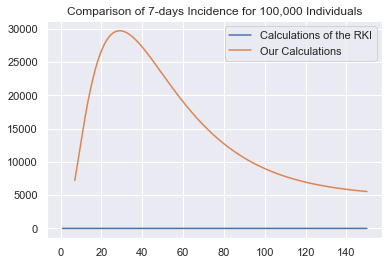

In [5]:

import pandas as pd
#Inzidenz = pd.read_excel(datapath, sheet_name='Gesamt', header=0)['Inzidenz'][549:732-7] # 7 Tage abziehen #Tom
#Inzidenz = pd.read_excel(str(datapath + "/Daten/RKI/Bundesländer/00 Bundeslaender Gesamt.xlsx"), sheet_name='Gesamt', header=0)['Inzidenz'][549:732-7] #Sabine
Inzidenz = pd.read_excel(str("C:/Users/sabin/OneDrive/Documents/Masterarbeit/Simulationen und Programmieren/TBE/Inzidenz_TBE_2019.xlsx"), sheet_name='Tabelle1', header=0)['Inzidenz'][153:303]
Q_C = (Ps0[:,6]/13.1e6) * 100000
Q_V = (Ps0[:,7]/13.1e6) * 100000
Model_inzidenz = Q_C[60:-10]-Q_V[10:-60]
print(Model_inzidenz)
ts2 = np.linspace(7,150, 1430)
ts3 = np.linspace(1,150, 150)
plt.plot(ts3,Inzidenz)
plt.plot(ts2, Model_inzidenz)
plt.title("Comparison of 7-days Incidence for 100,000 Individuals")
plt.legend(["Calculations of the RKI", "Our Calculations"])
plt.show()

<Figure size 2400x1600 with 0 Axes>

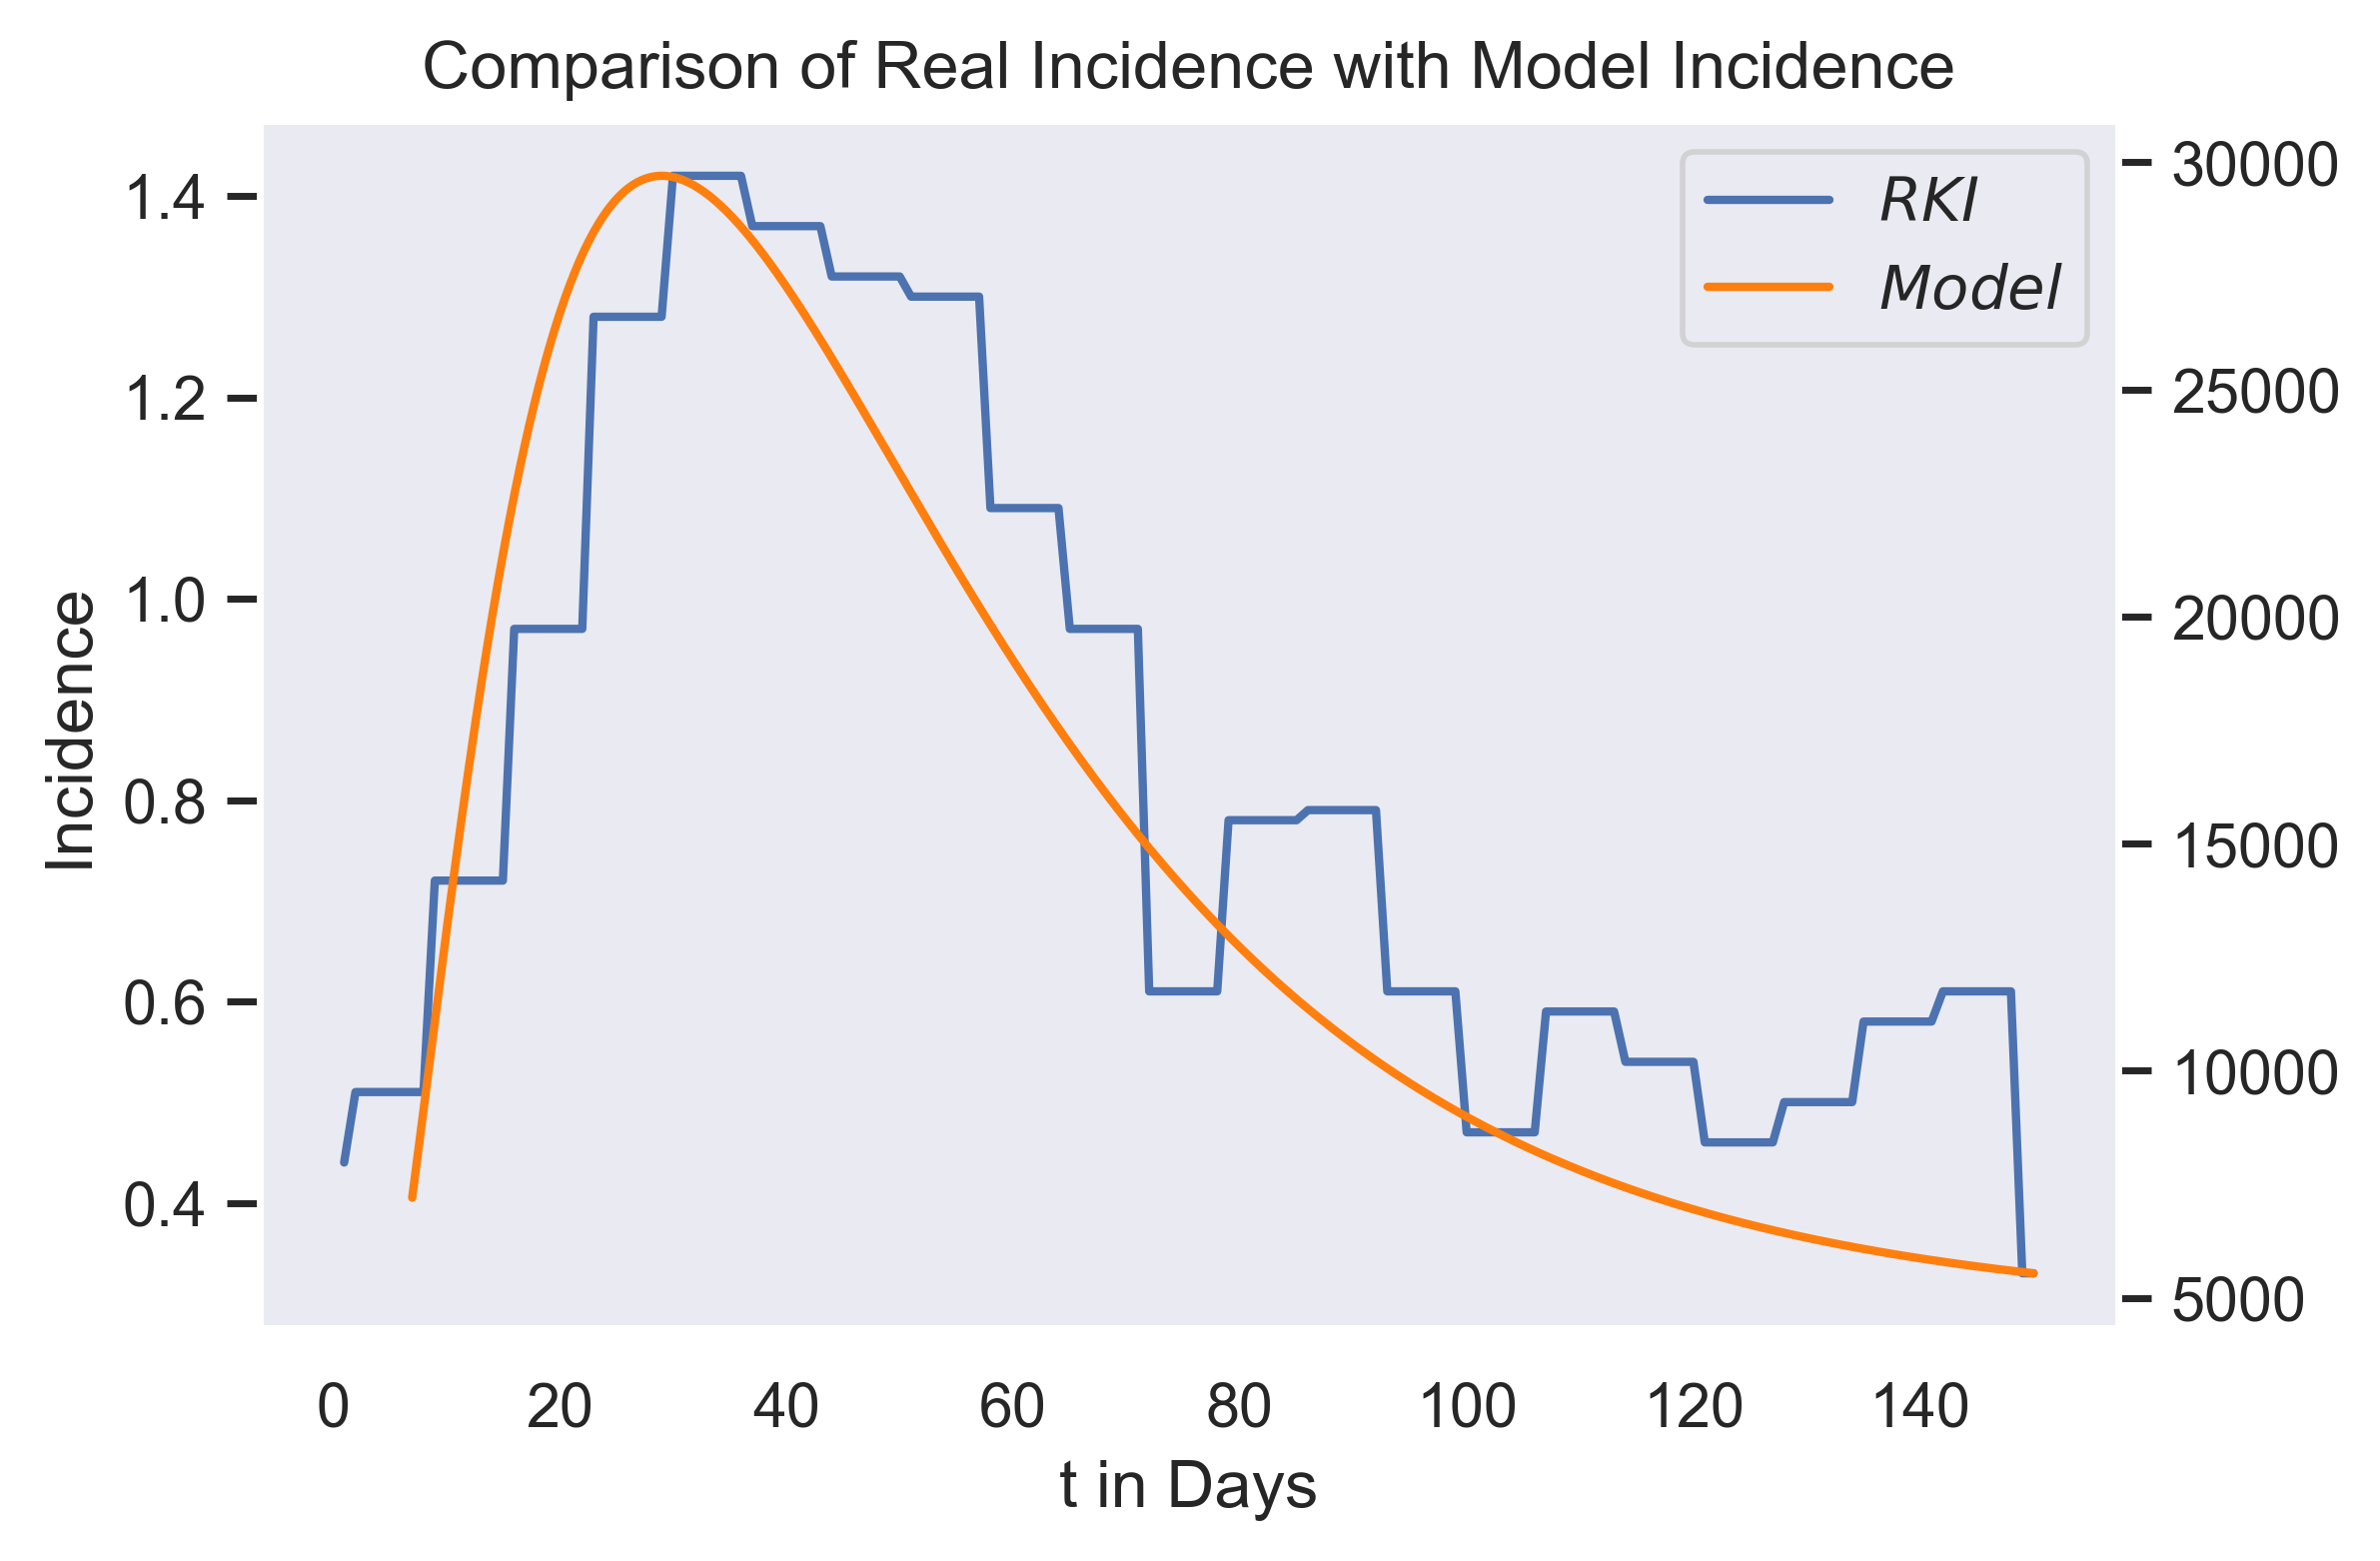

In [6]:
fig = plt.figure(dpi=400)
fig, ax1 = plt.subplots(dpi=400)
#fig.set_size_inches(8.46, 4.7)
ax1.set_title('Comparison of Real Incidence with Model Incidence')
ax1.set_xlabel('t in Days')
ax1.set_ylabel('Incidence')
#ax1.set_title('Dynamics of Epidemics')
#ax1.set_xlabel('t in days')
#ax1.set_ylabel('citizens in corresponding compartment') #,color = 'red'
plot_1 = ax1.plot(ts3,Inzidenz)
ax1.grid(False)

#ax1.legend(["$S$","$E$","$Q_1$","$Q_2$","$I$","$V$"])
ax1.tick_params(axis ='y')

# Adding Twin Axes
ax2 = ax1.twinx()
plot_0 = ax2.plot(ts2, Model_inzidenz, "tab:orange")
ax2.tick_params(axis ='y')
ax2.grid(False)

#Adding a legend for both plots:
all_plts = plot_1 + plot_0 
labels = ["$RKI$","$Model$"]
plt.legend(all_plts, labels, loc = 'upper right')


plt.show()

# Plot Condition 1

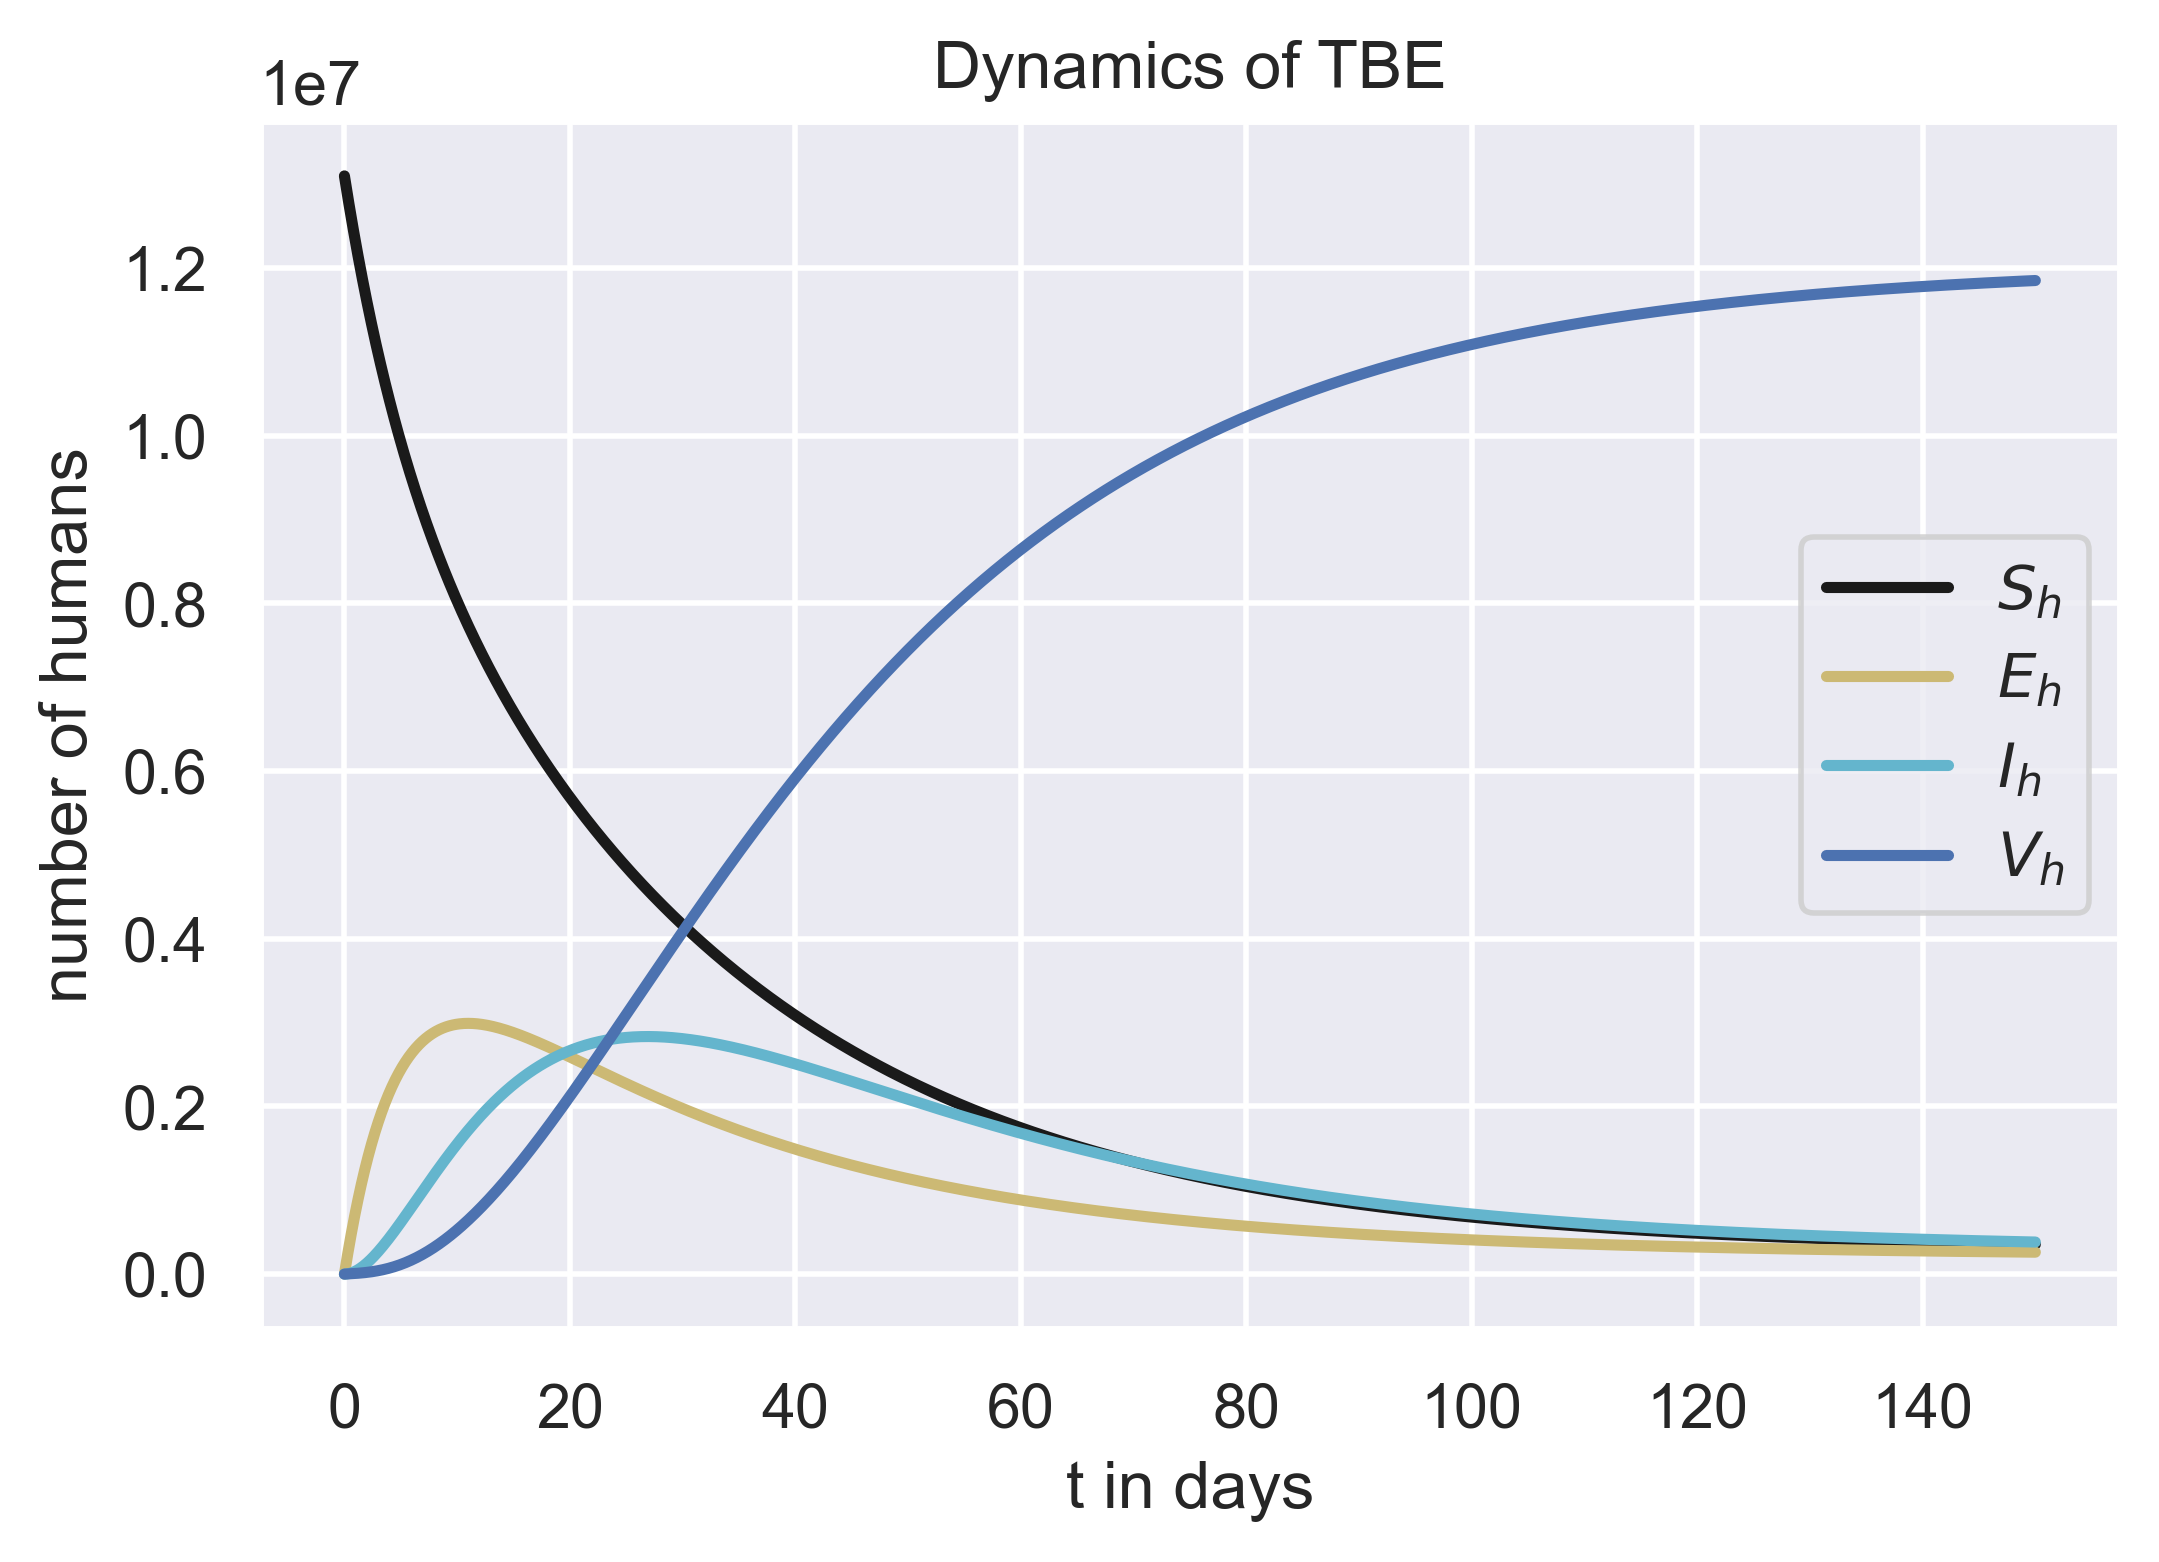

In [7]:
fig = plt.figure(dpi=400)

plt.plot(ts,Ps0[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Ps0[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Ps0[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Ps0[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

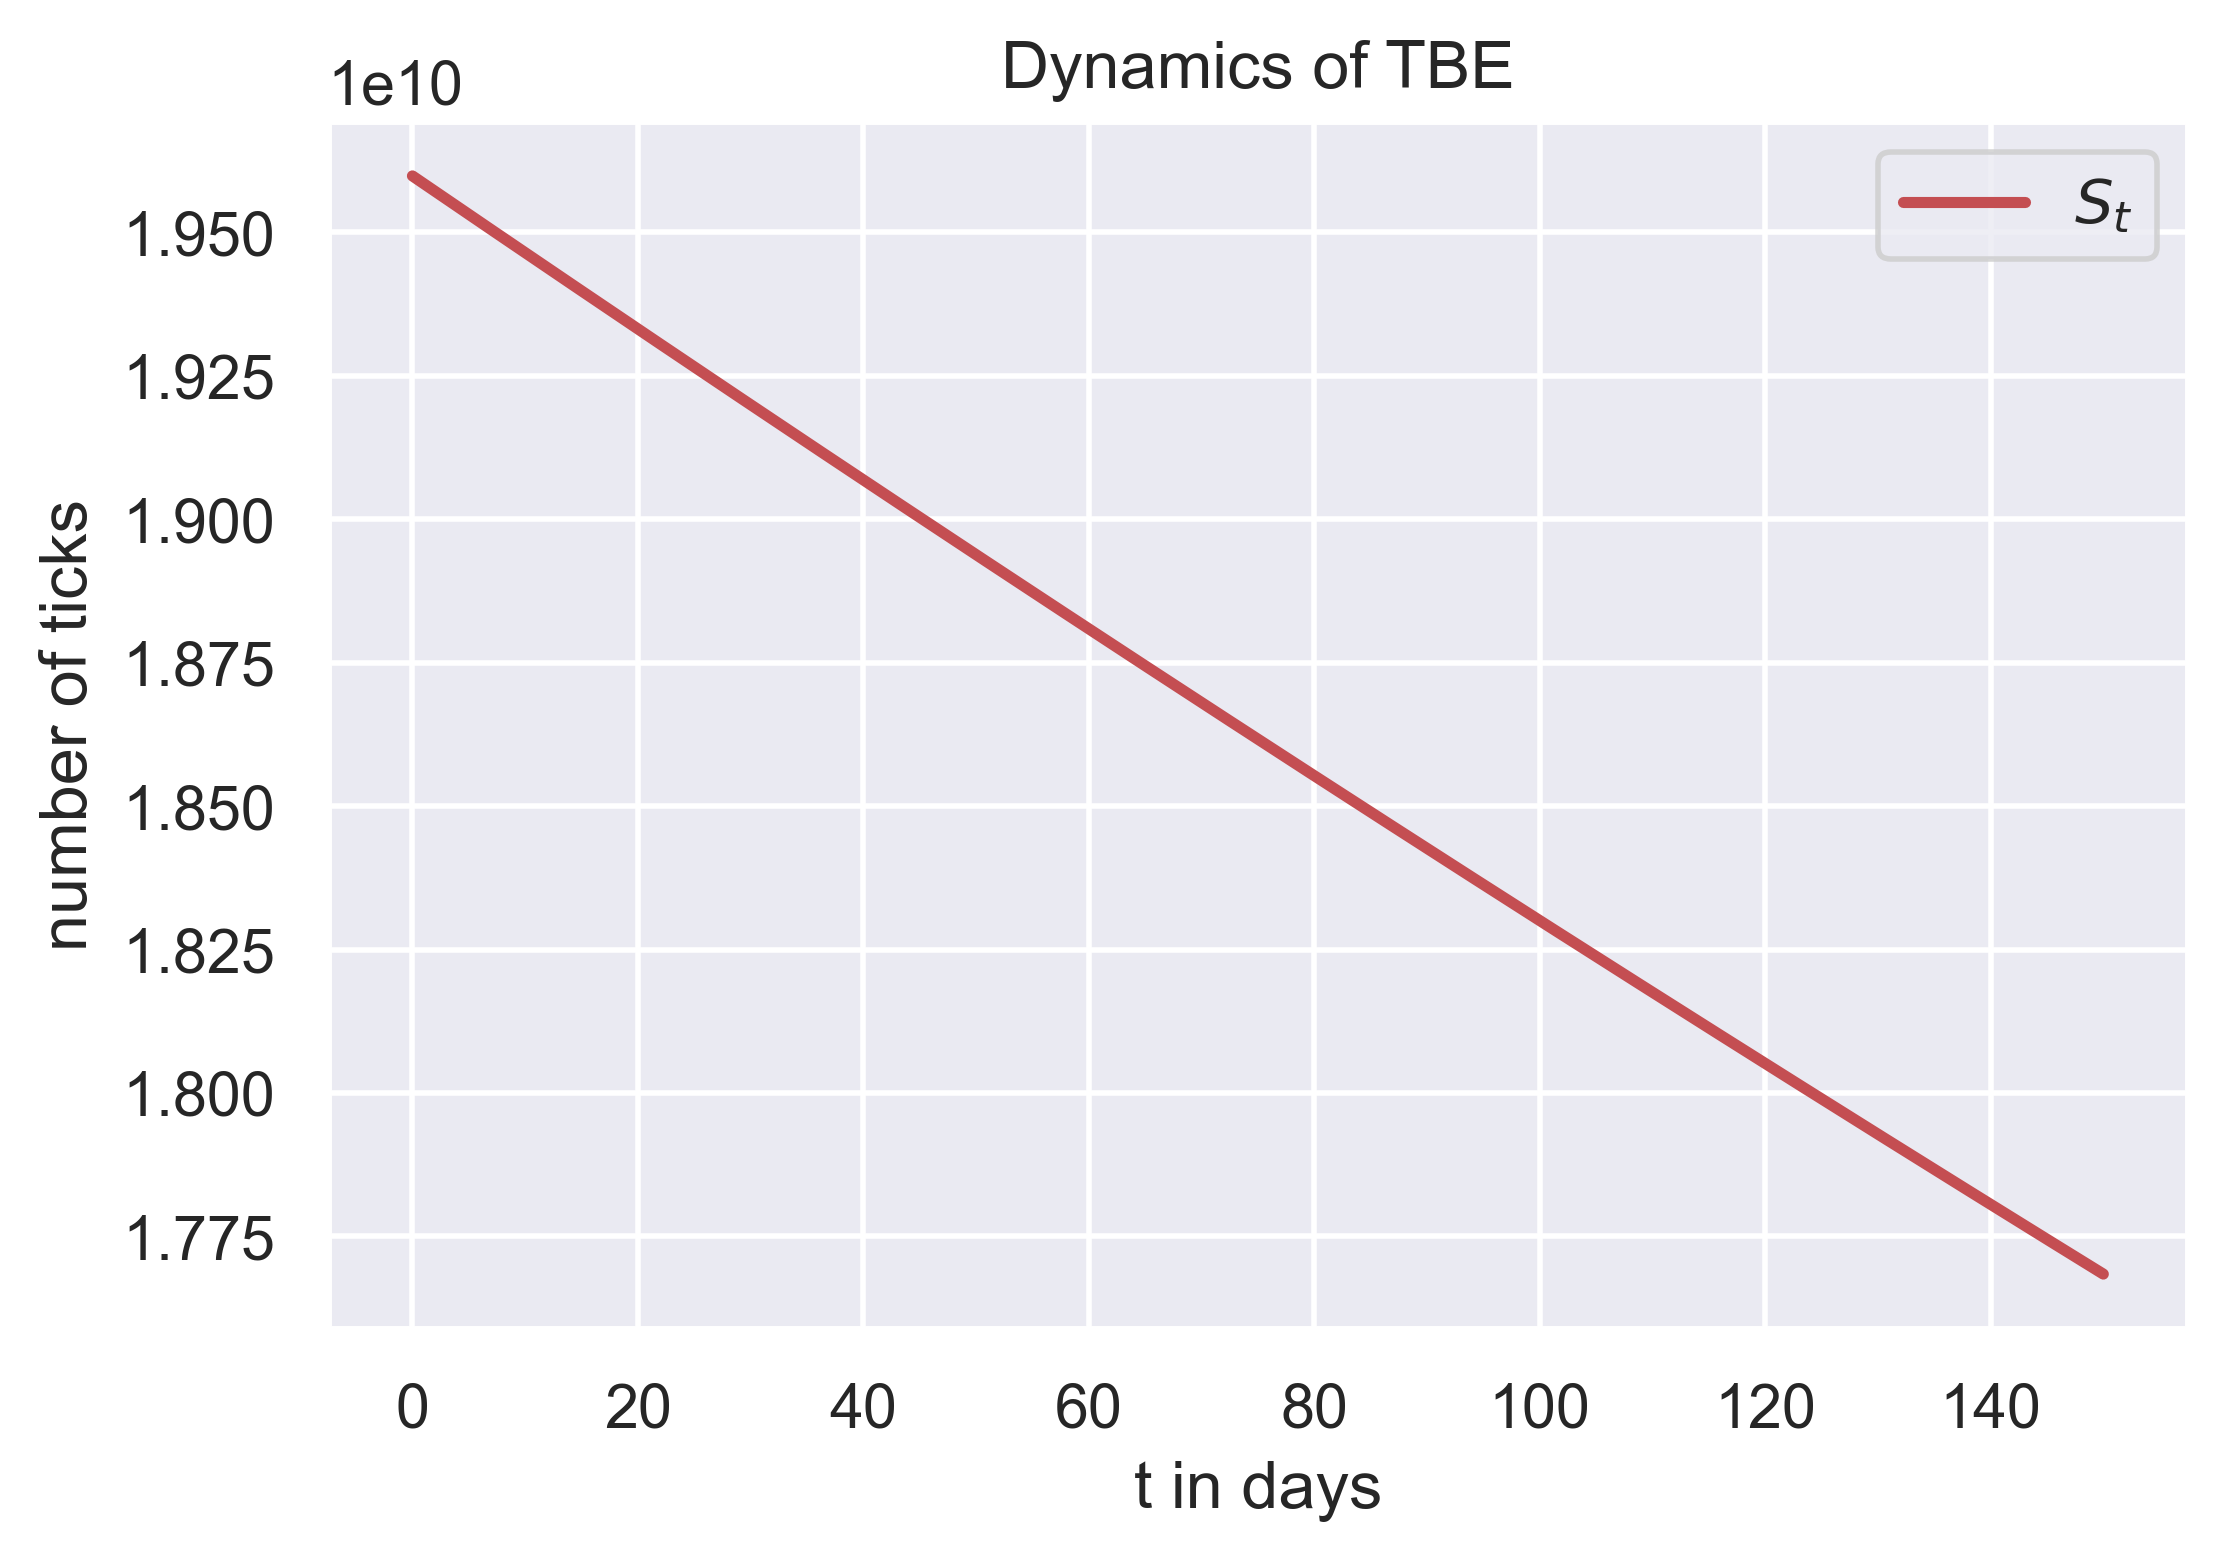

In [8]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps0[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()


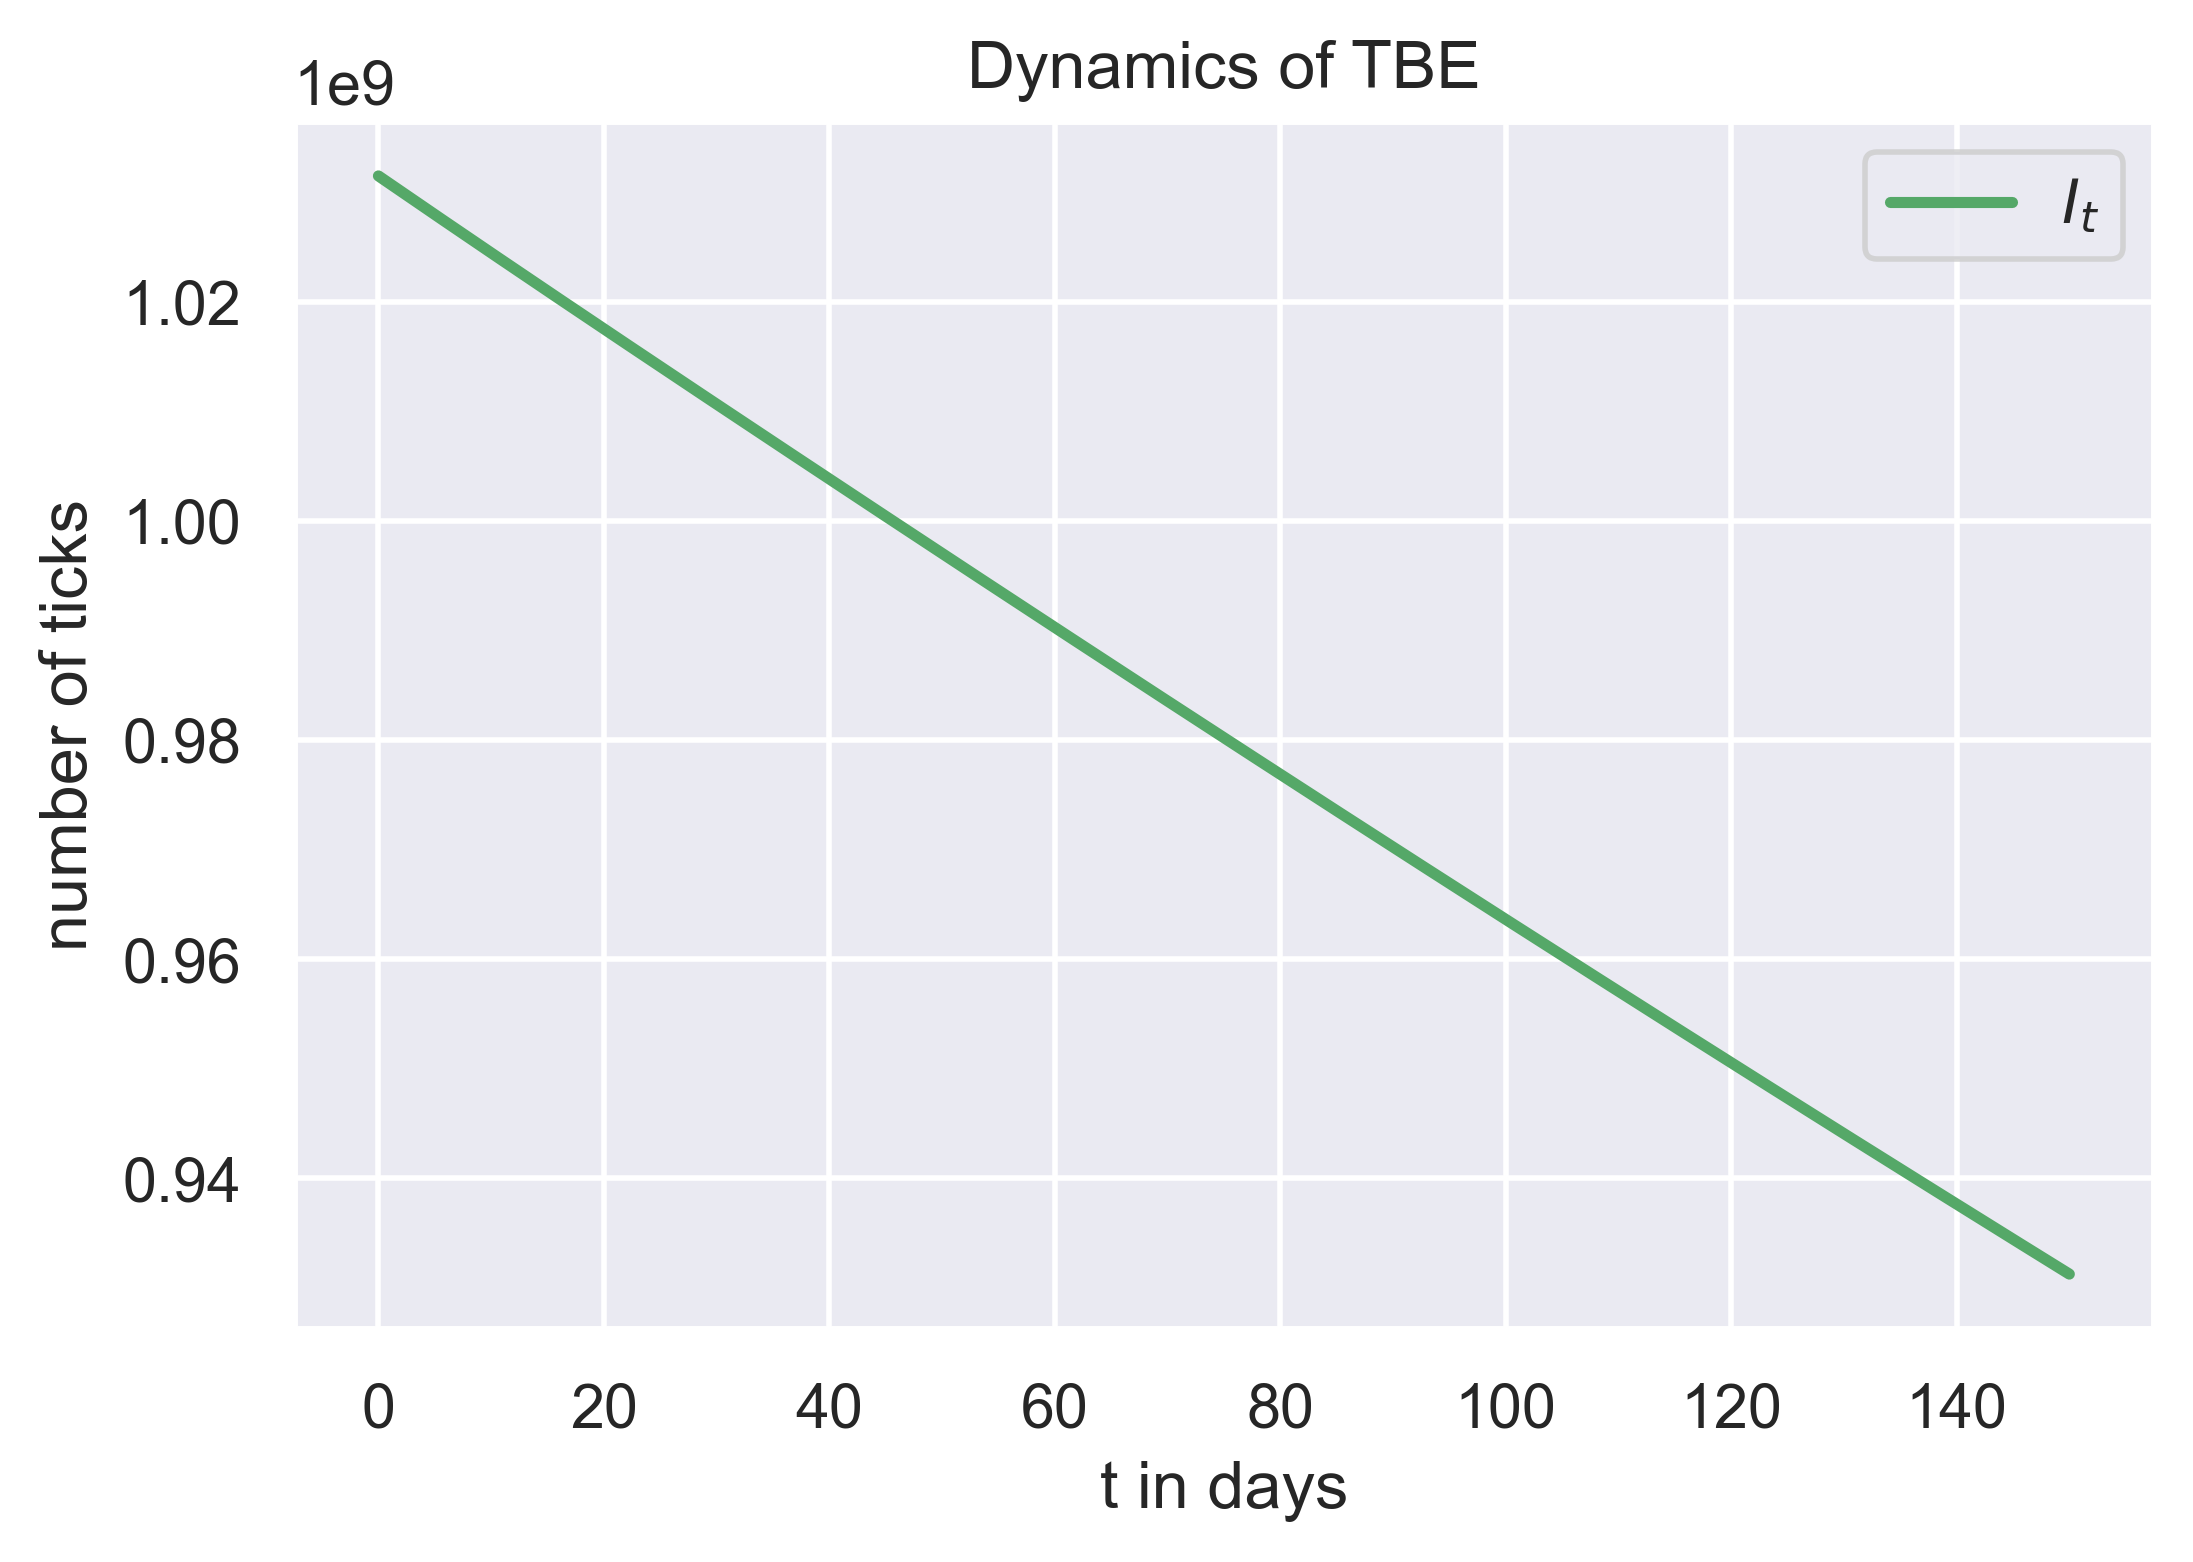

In [9]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps0[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# Plot Condition 2


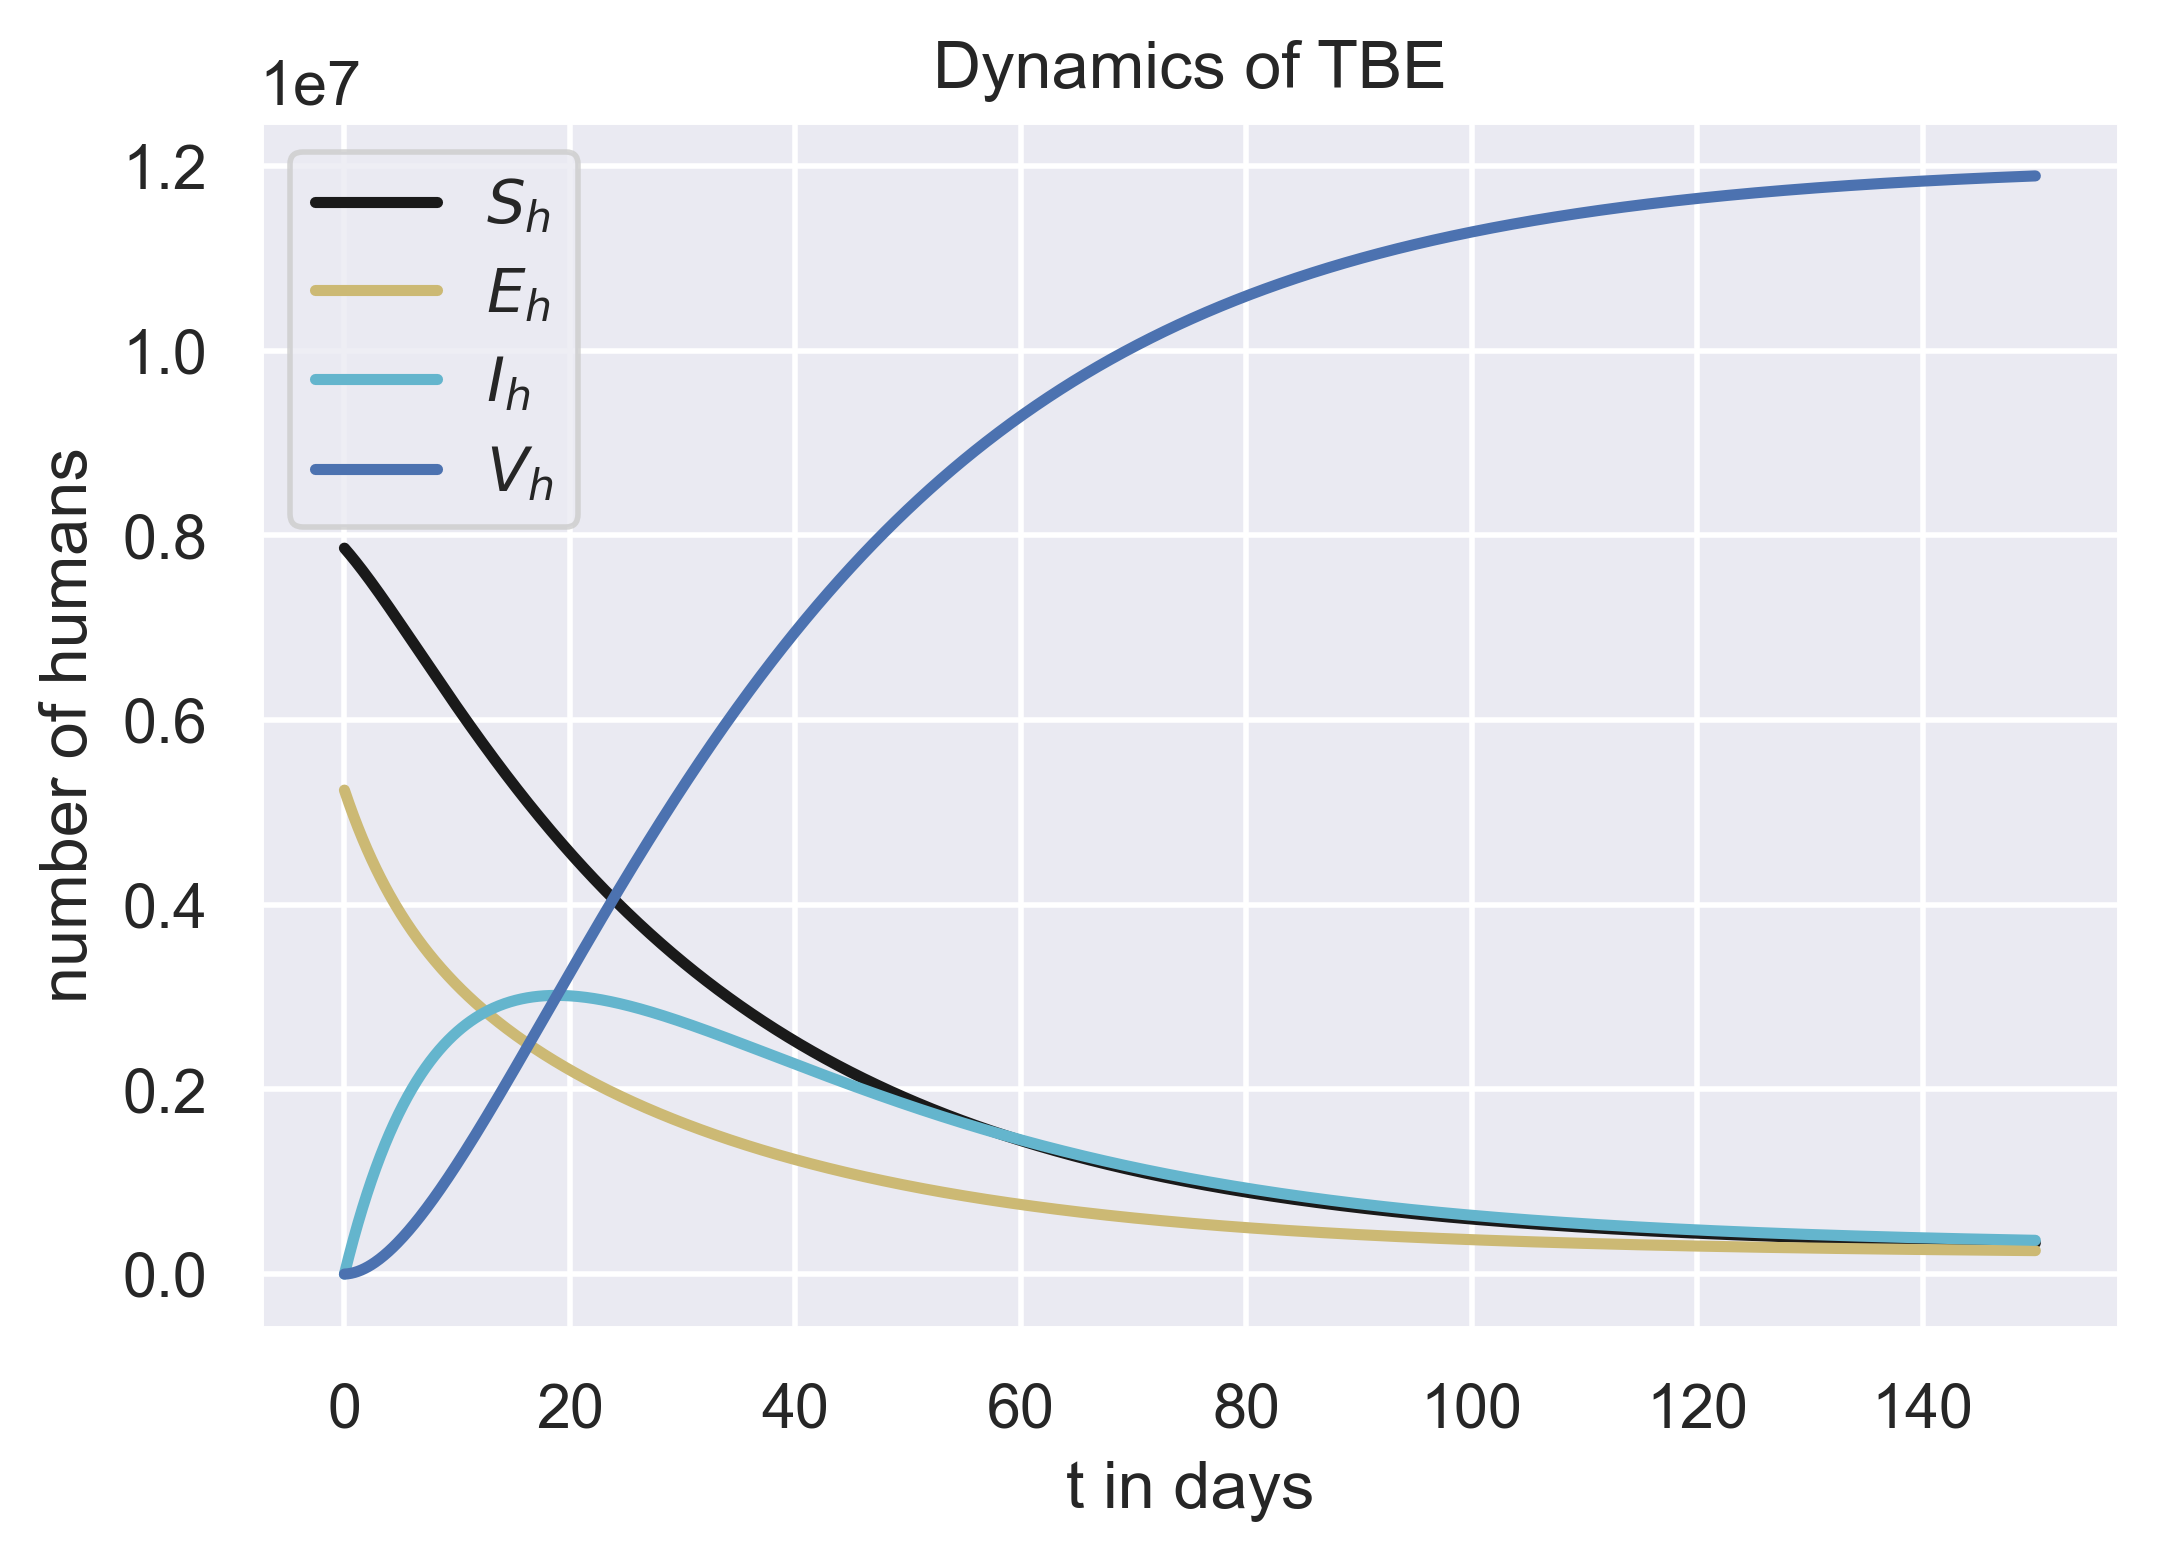

In [10]:
fig = plt.figure(dpi=400)

plt.plot(ts,Ps1[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Ps1[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Ps1[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Ps1[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

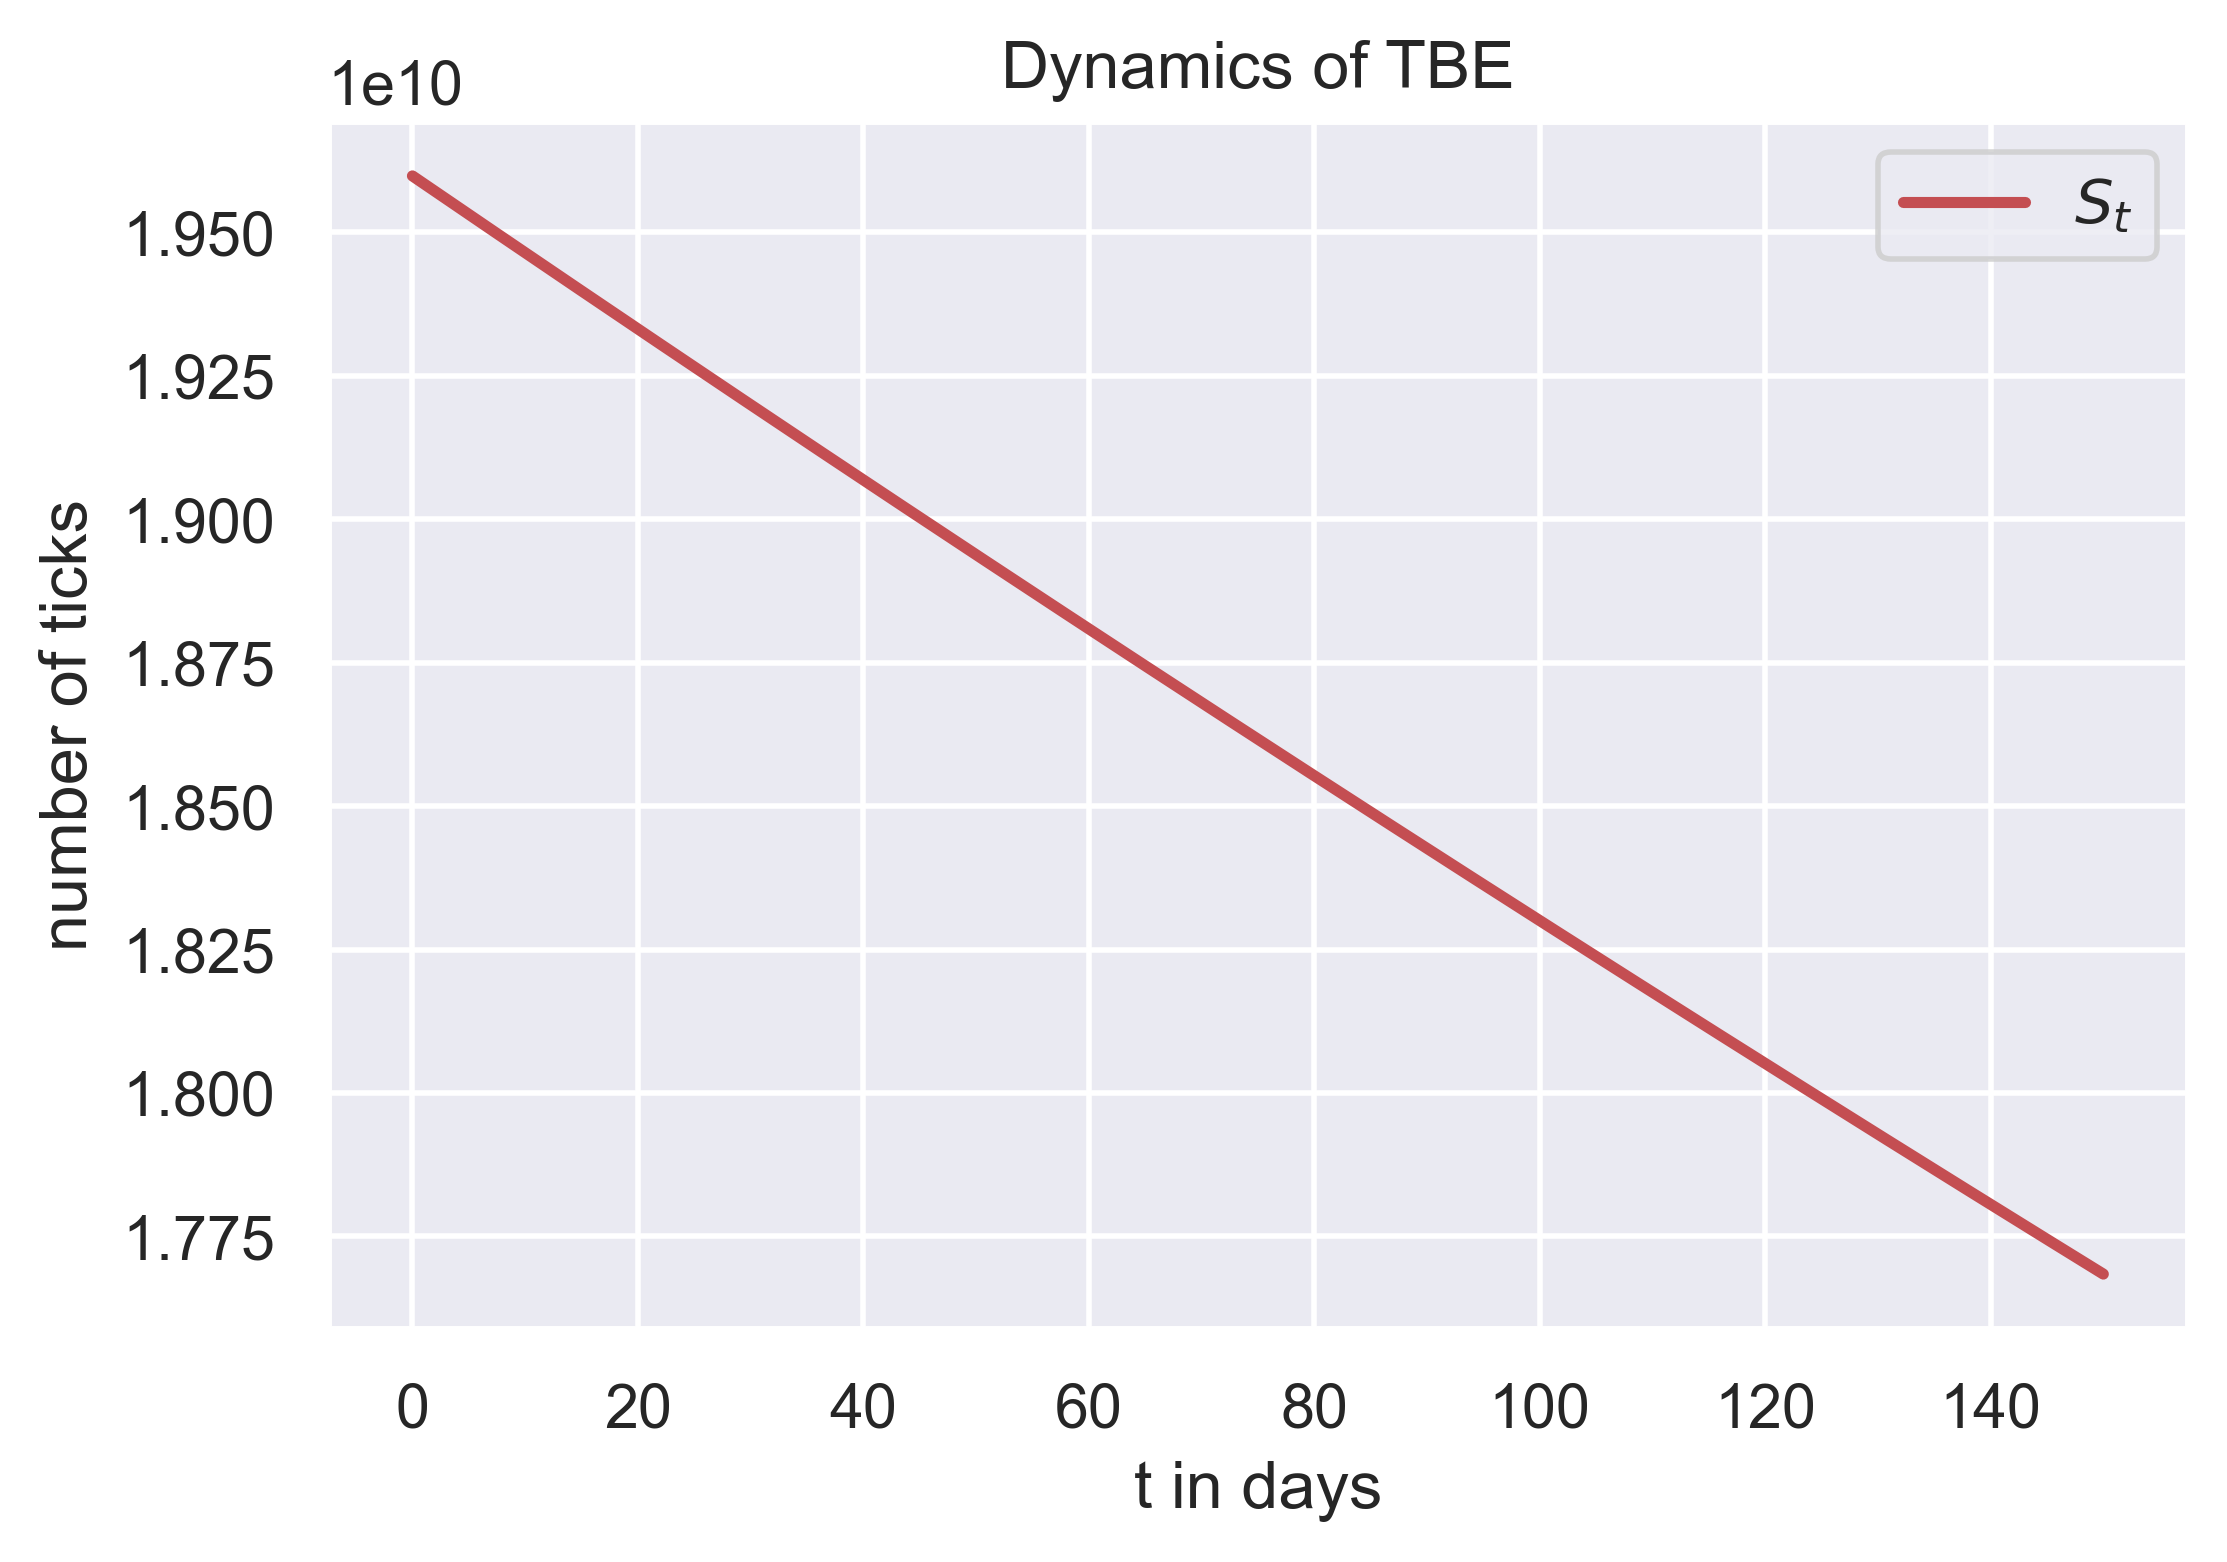

In [11]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps1[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()


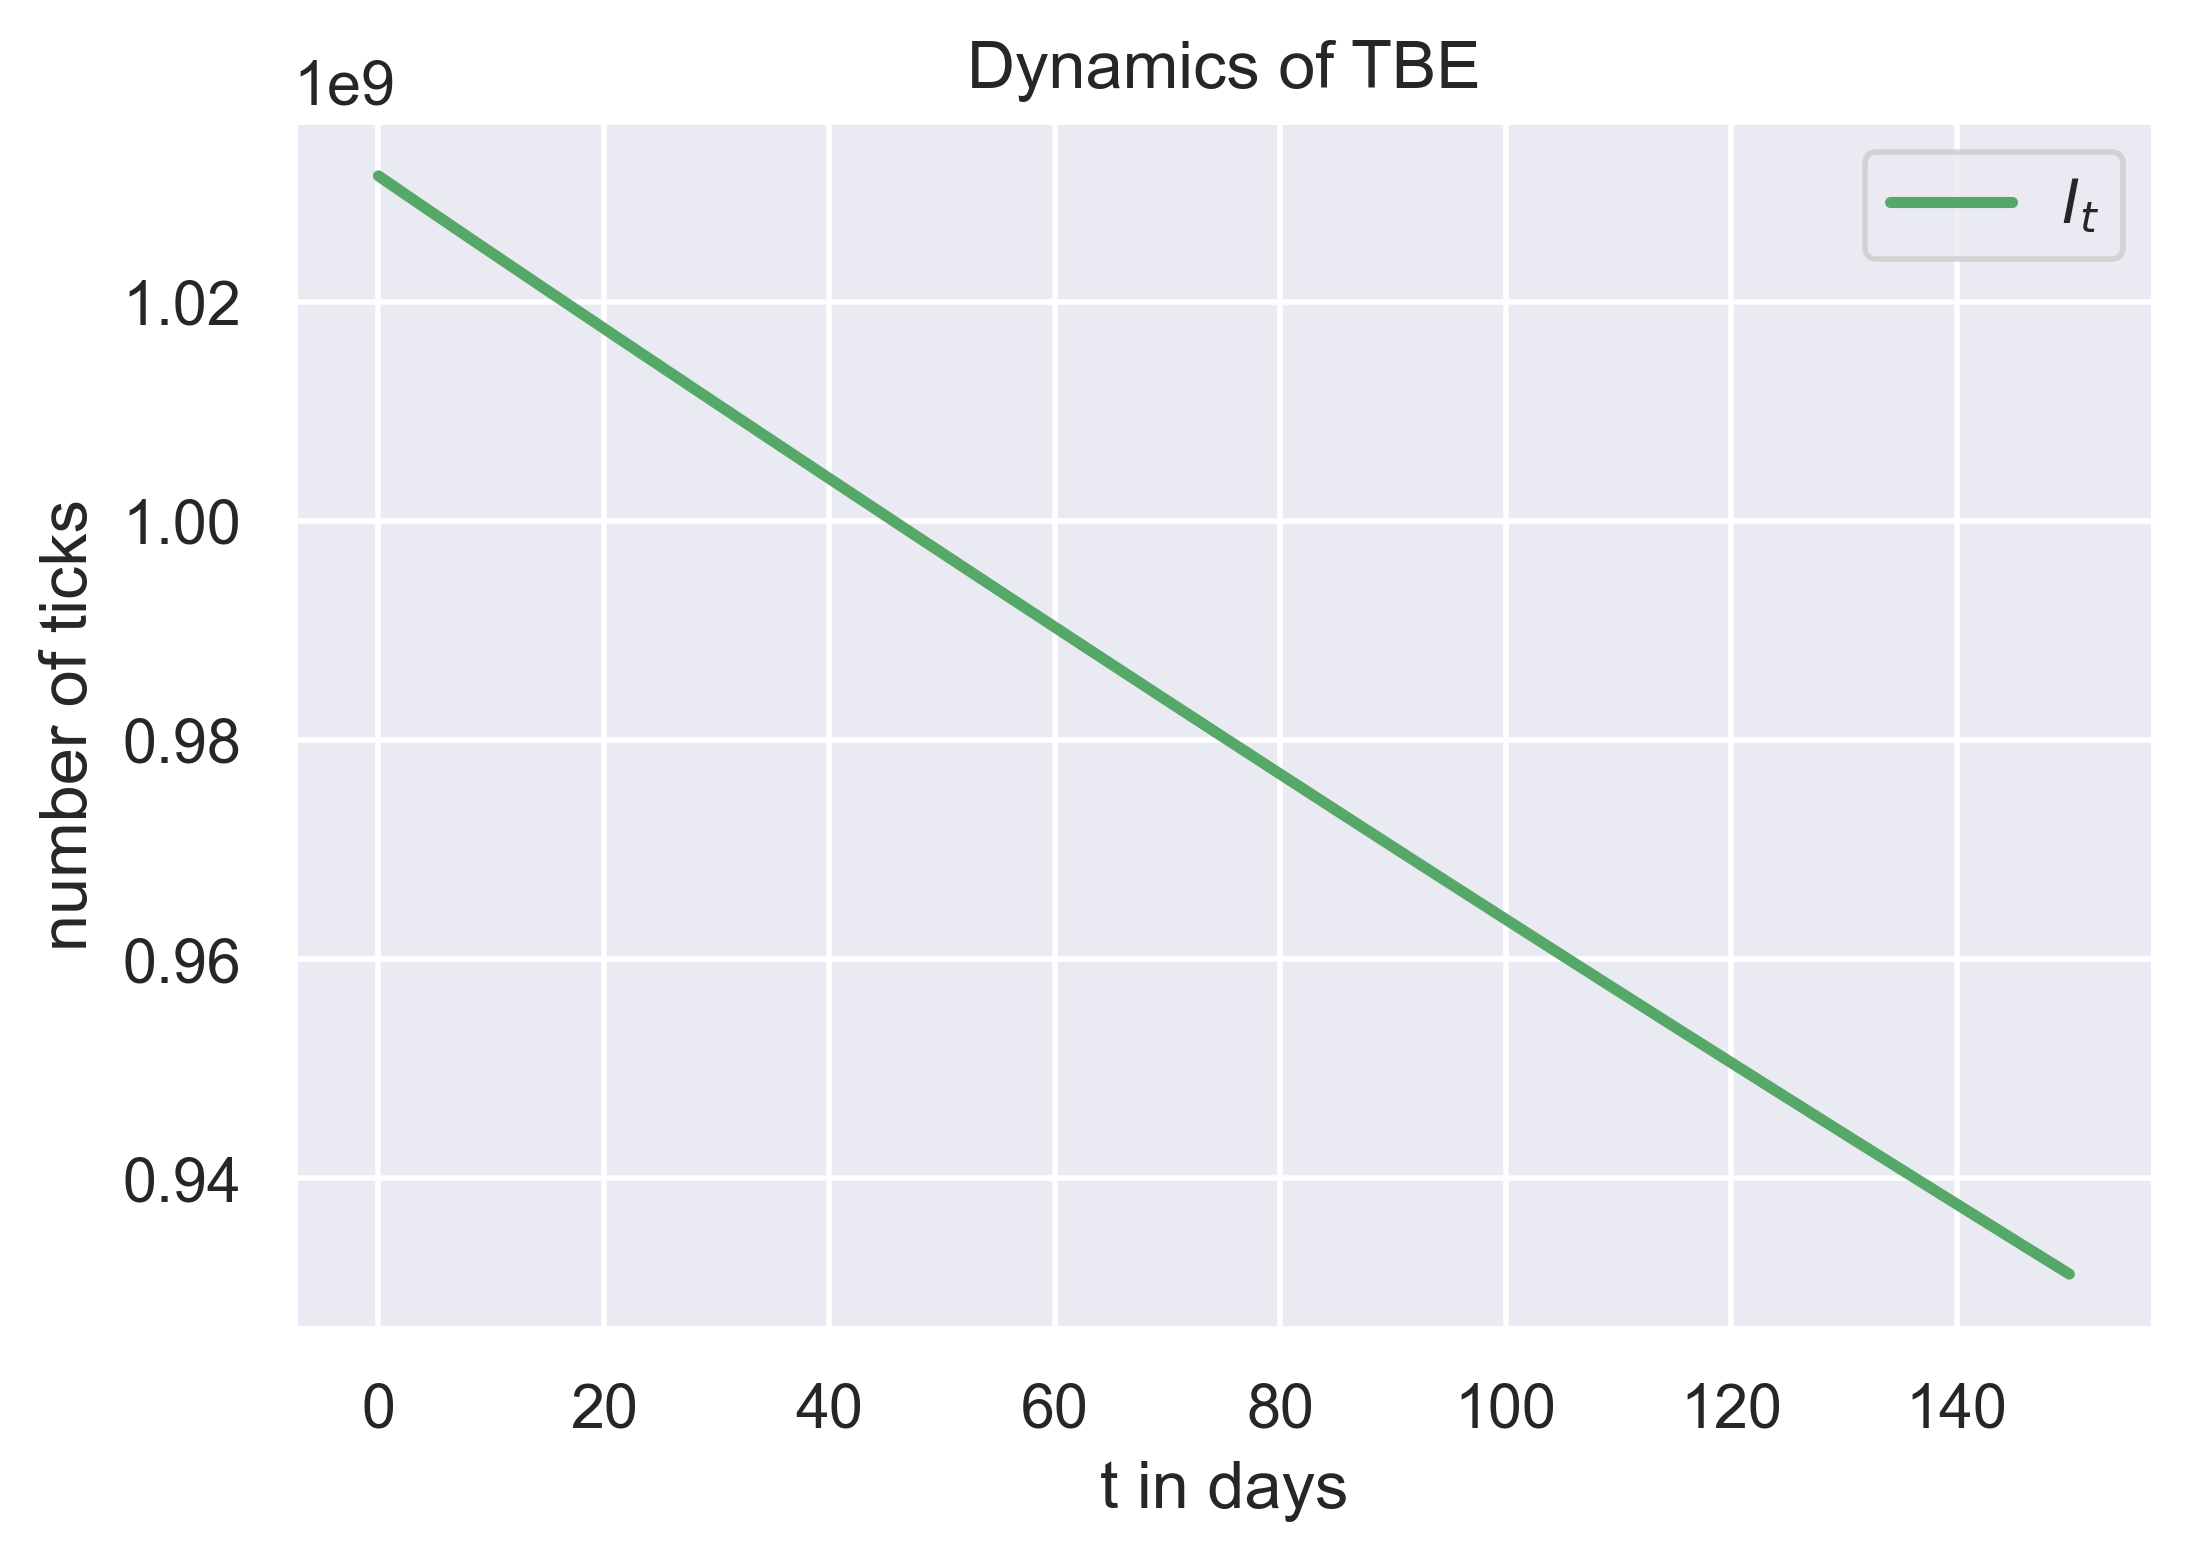

In [12]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps1[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# Plot Condition 3

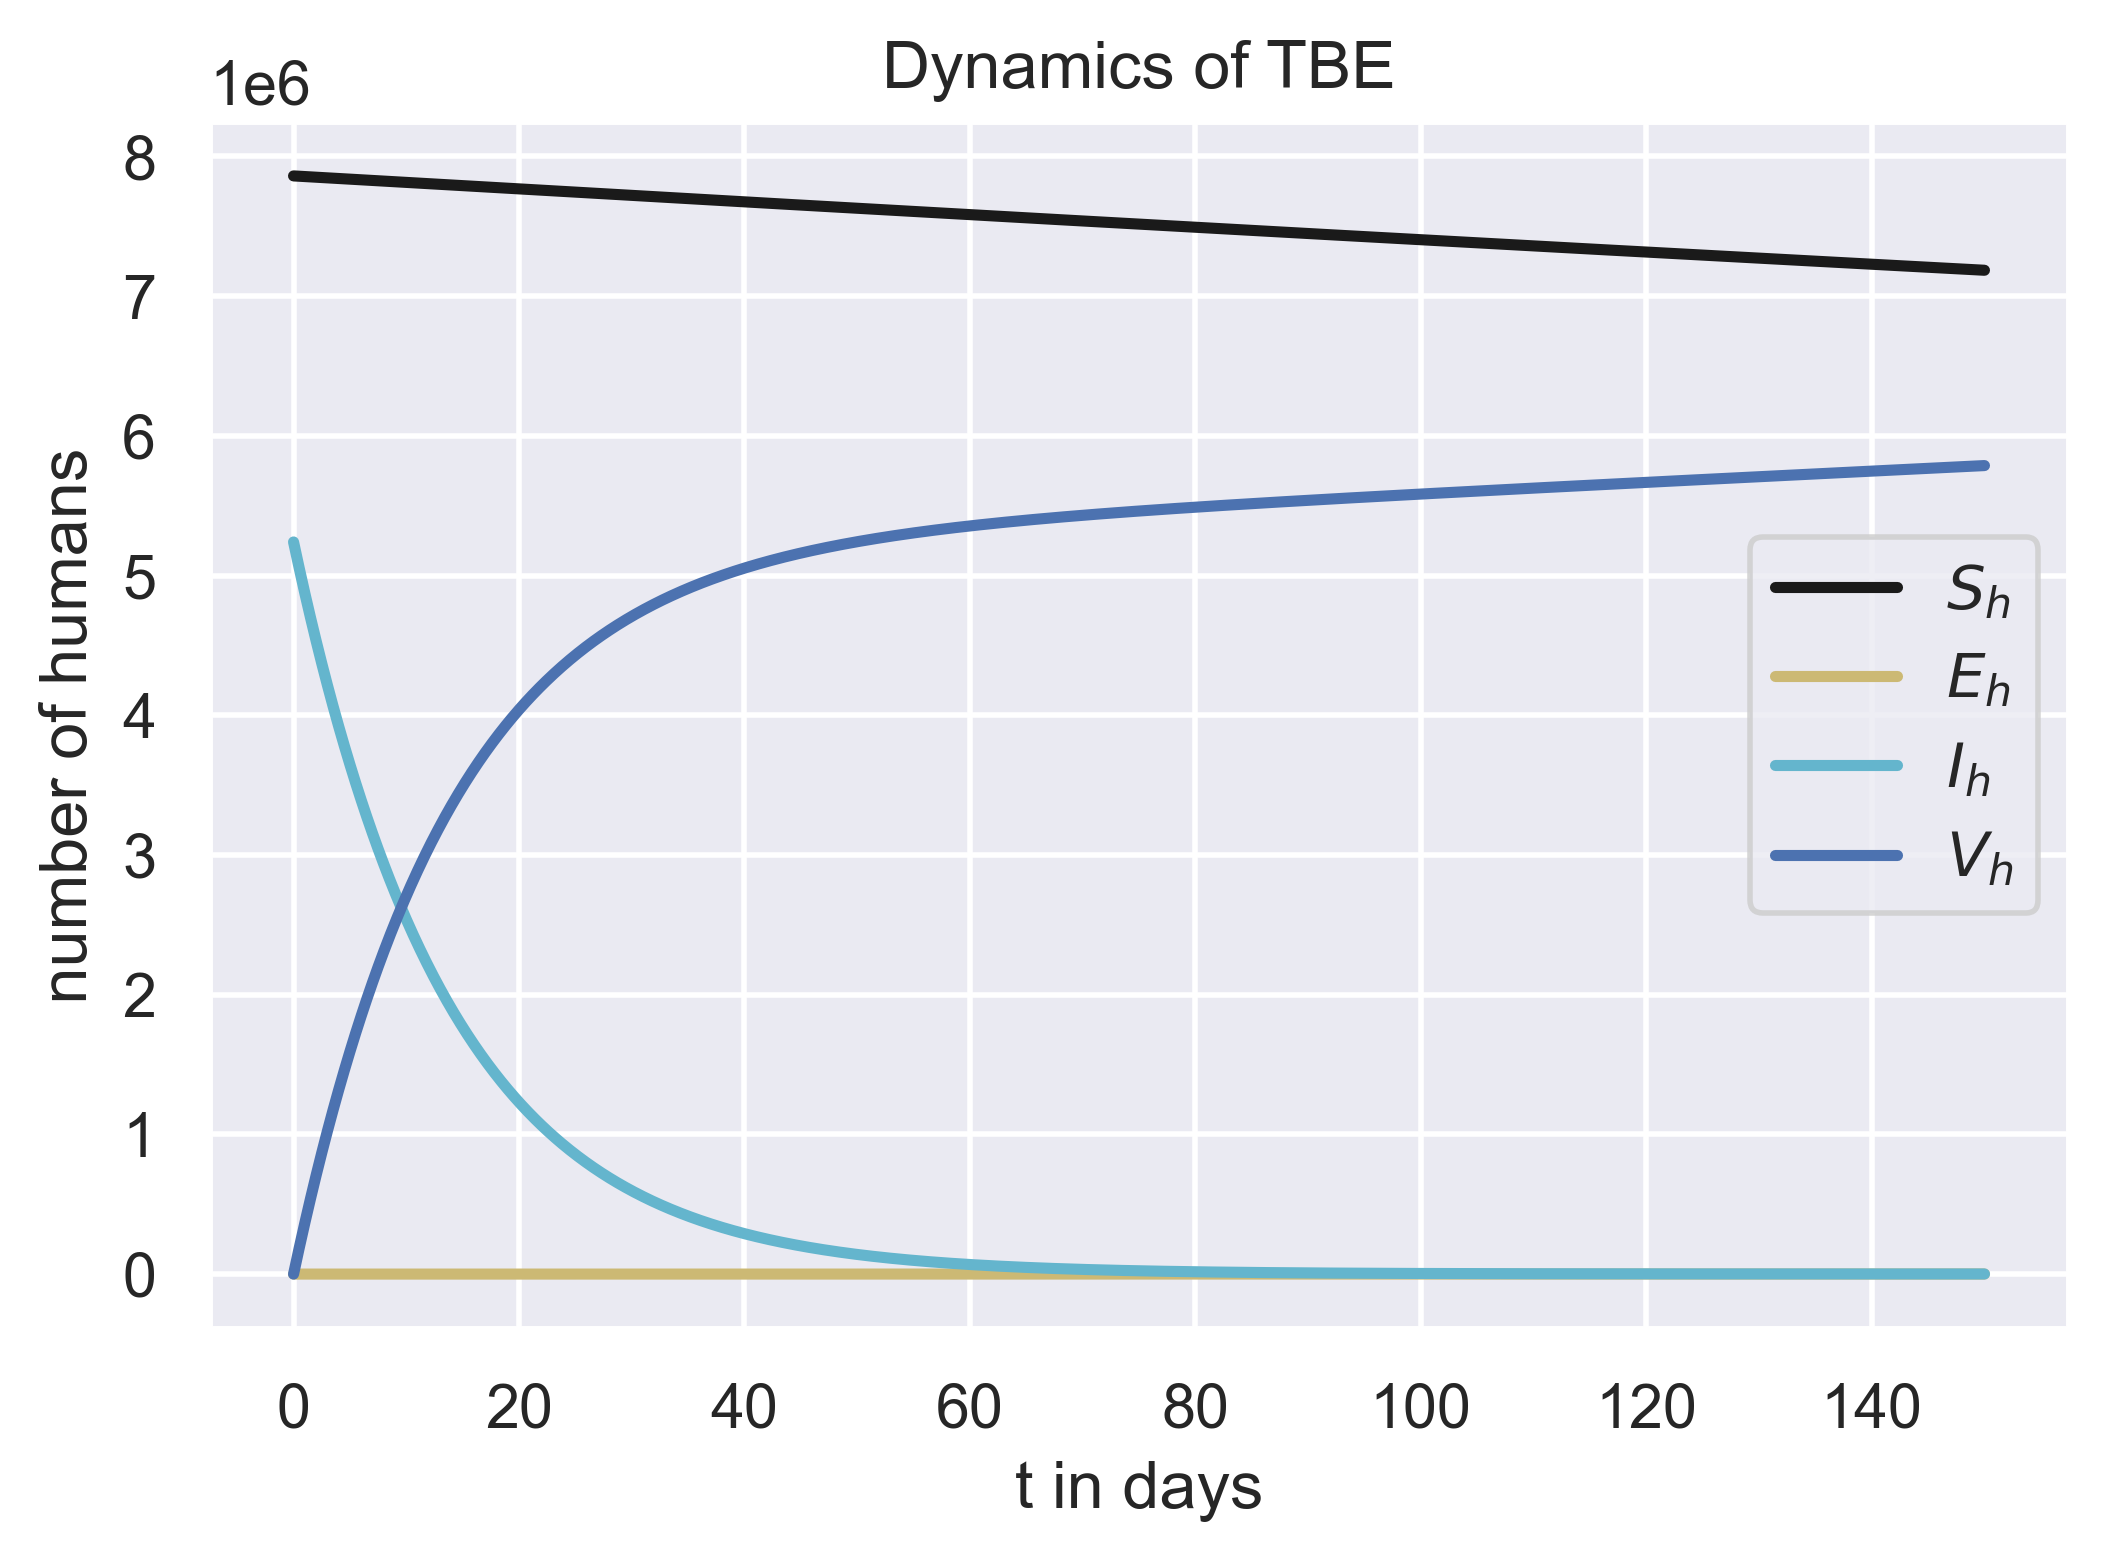

In [13]:
fig = plt.figure(dpi=400)

plt.plot(ts,Ps2[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Ps2[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Ps2[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Ps2[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel(" number of humans ")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

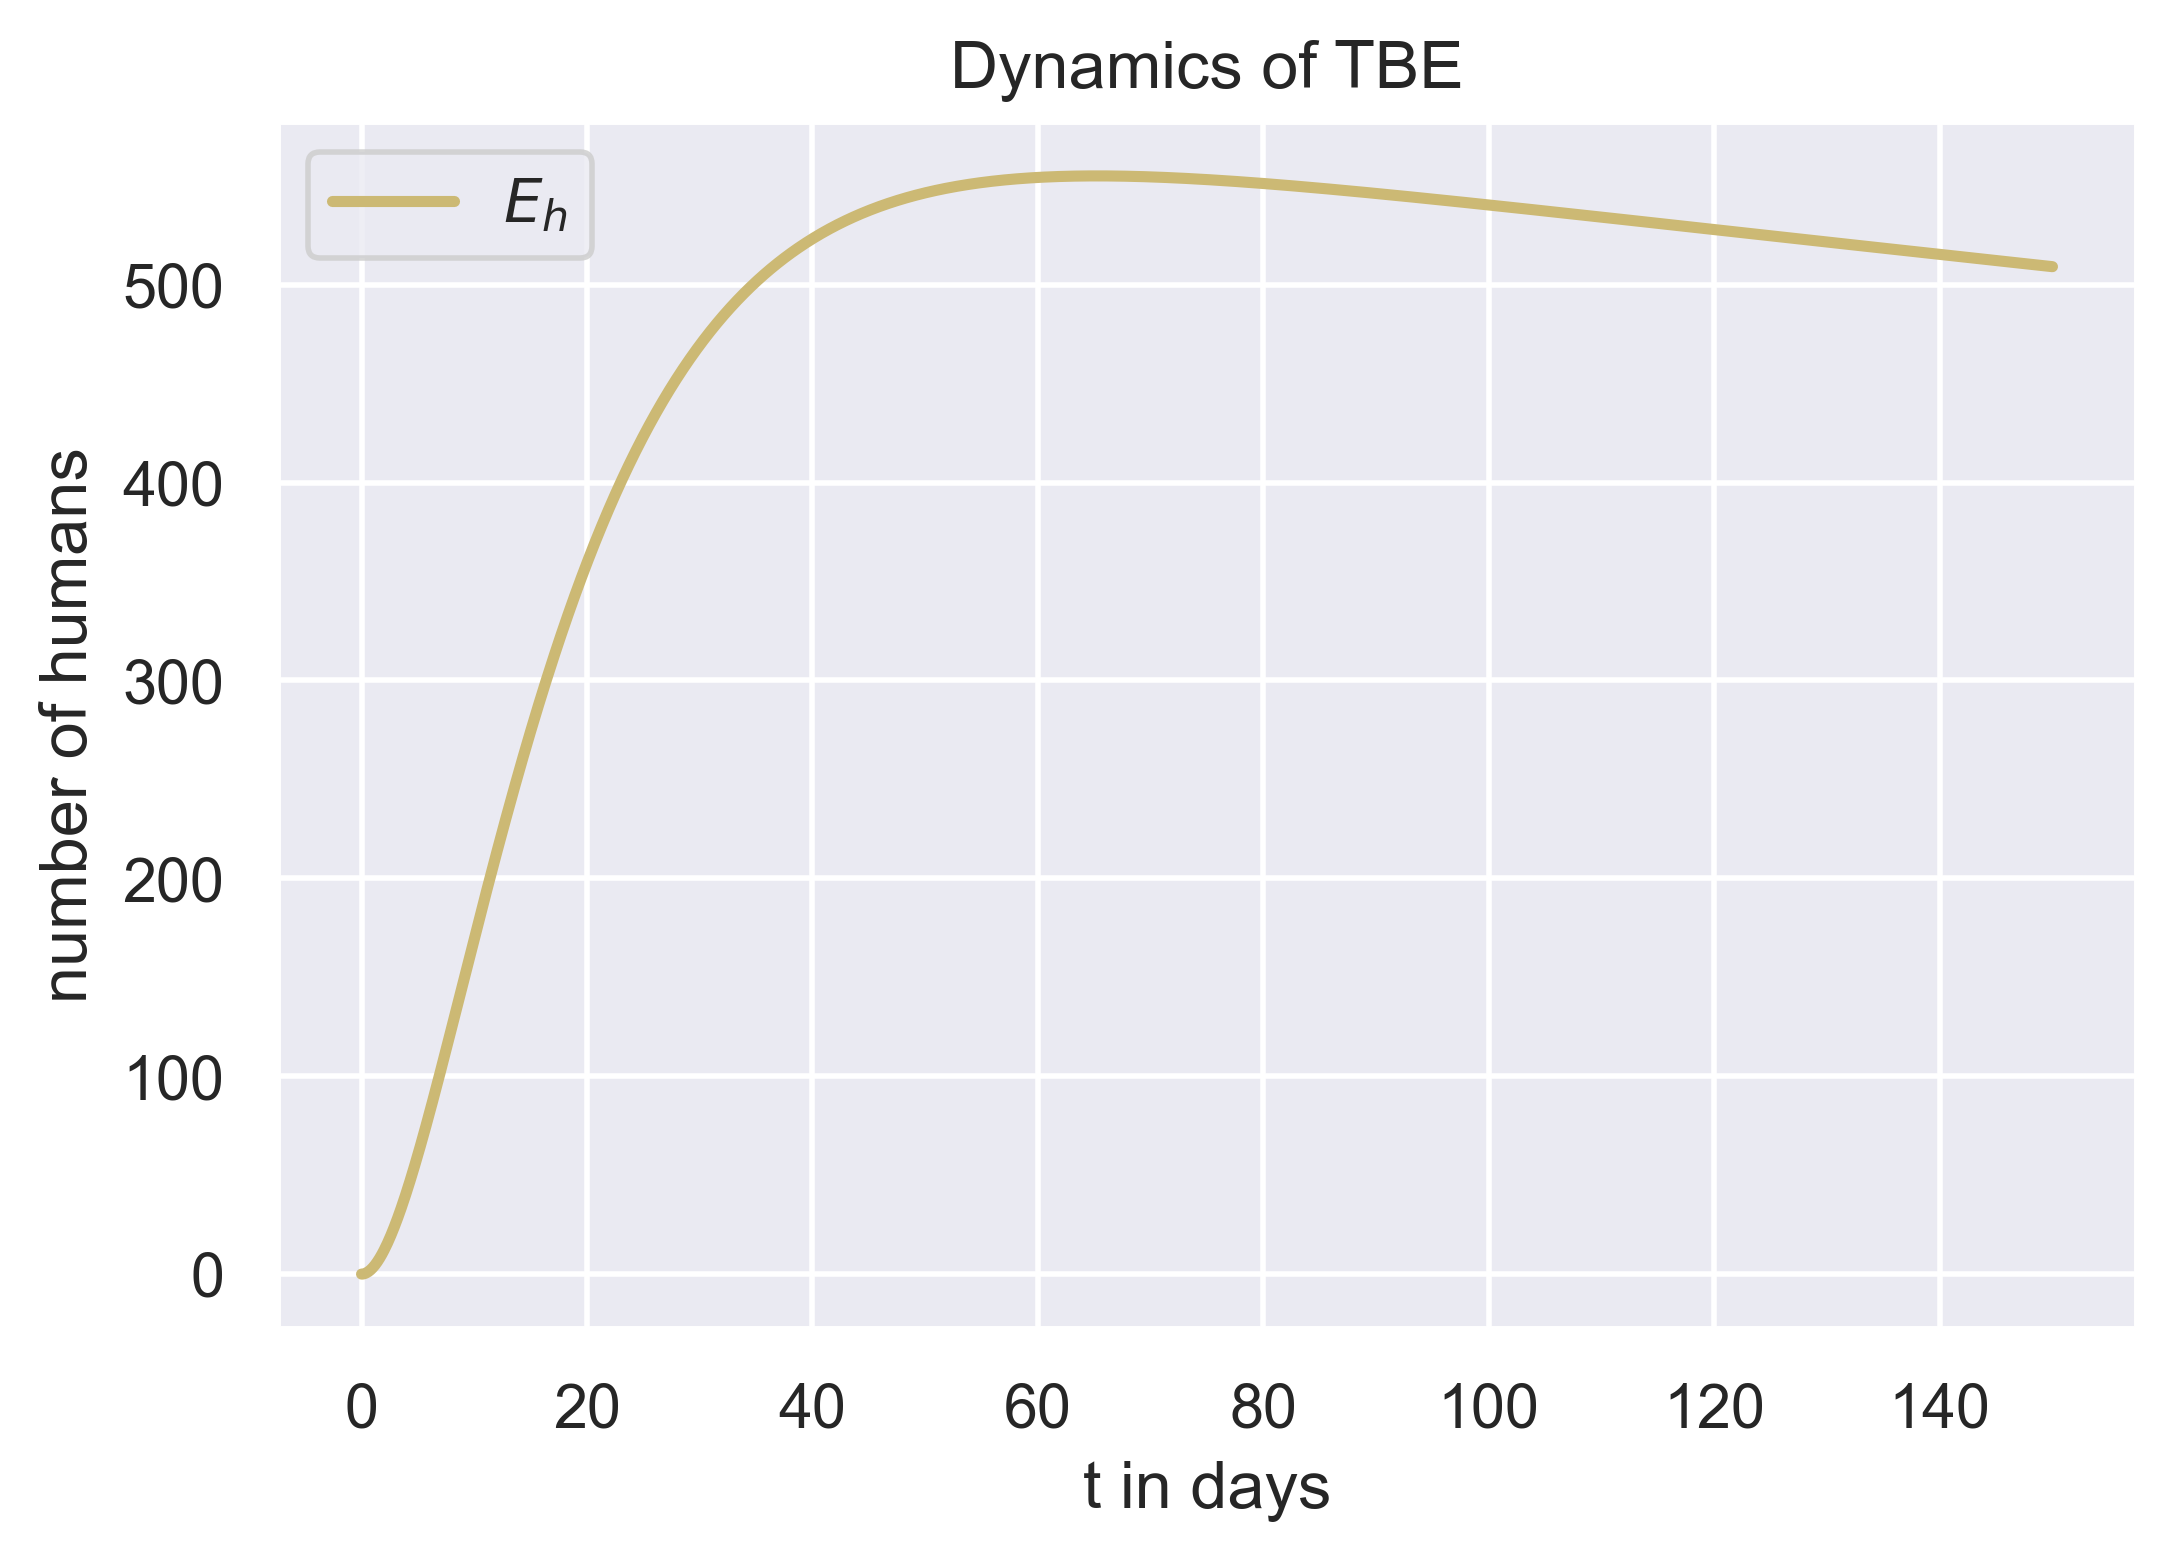

In [14]:
fig = plt.figure(dpi=400)

plt.plot(ts,Ps2[:,1],'y-', linewidth=2.0) #gelb

plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$E_h$"])
plt.show()

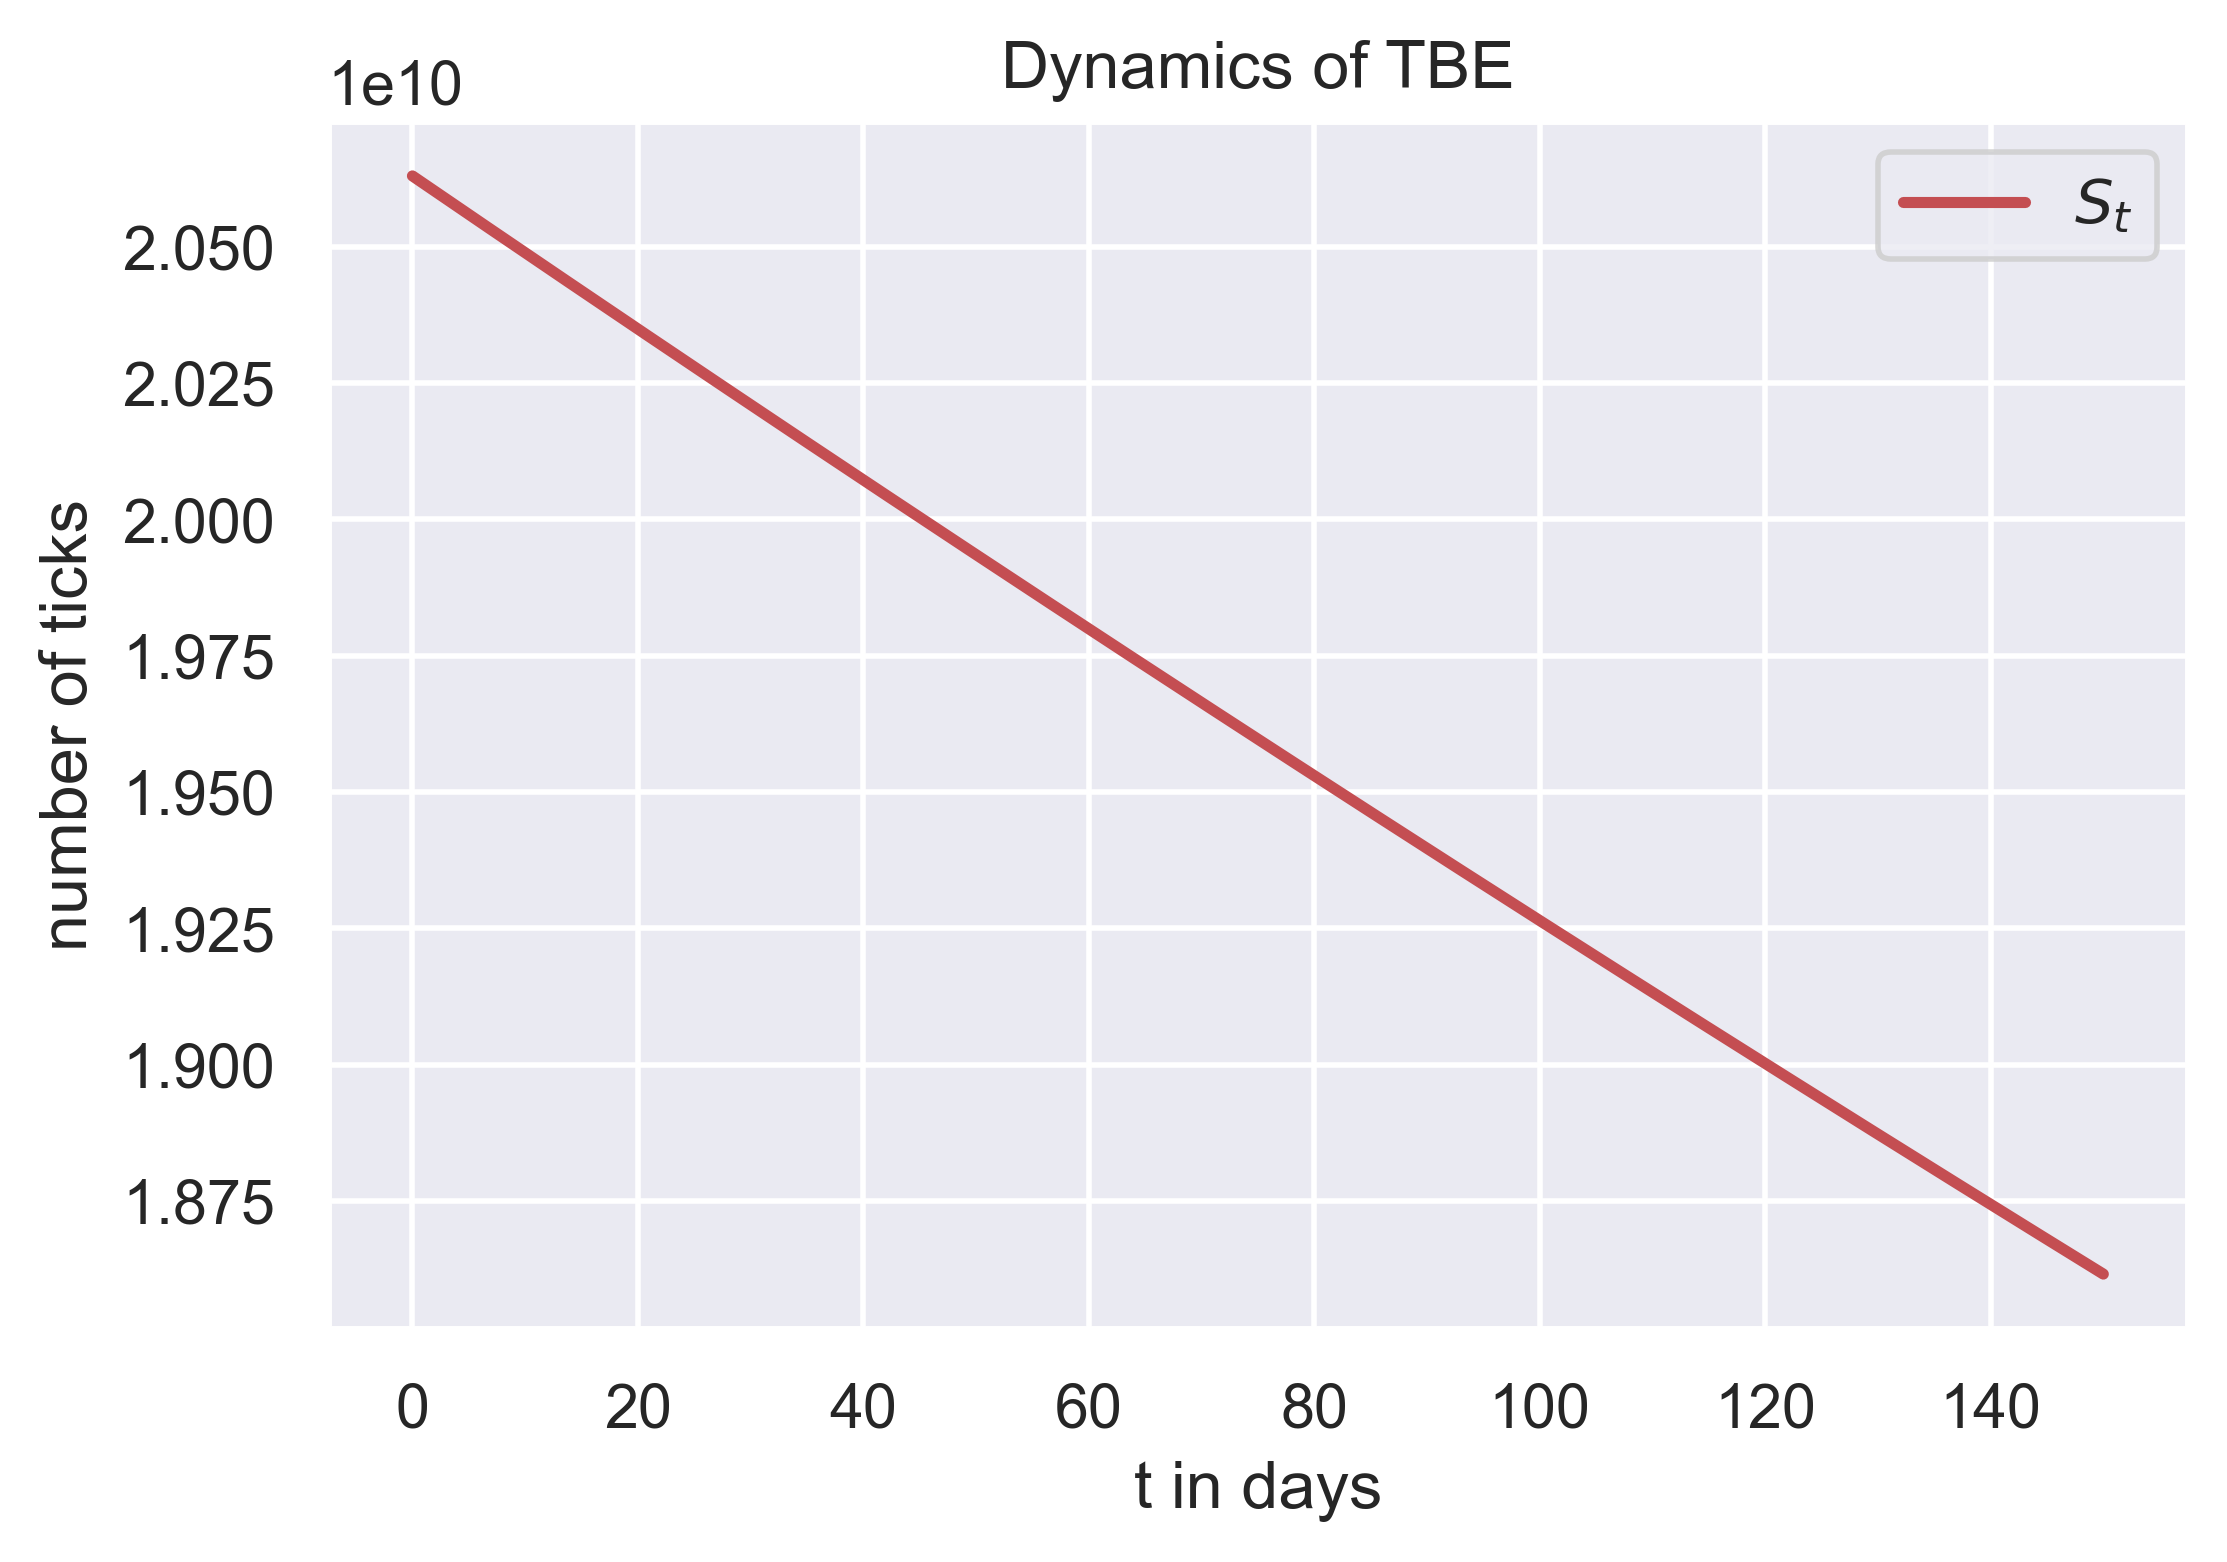

In [15]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps2[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()


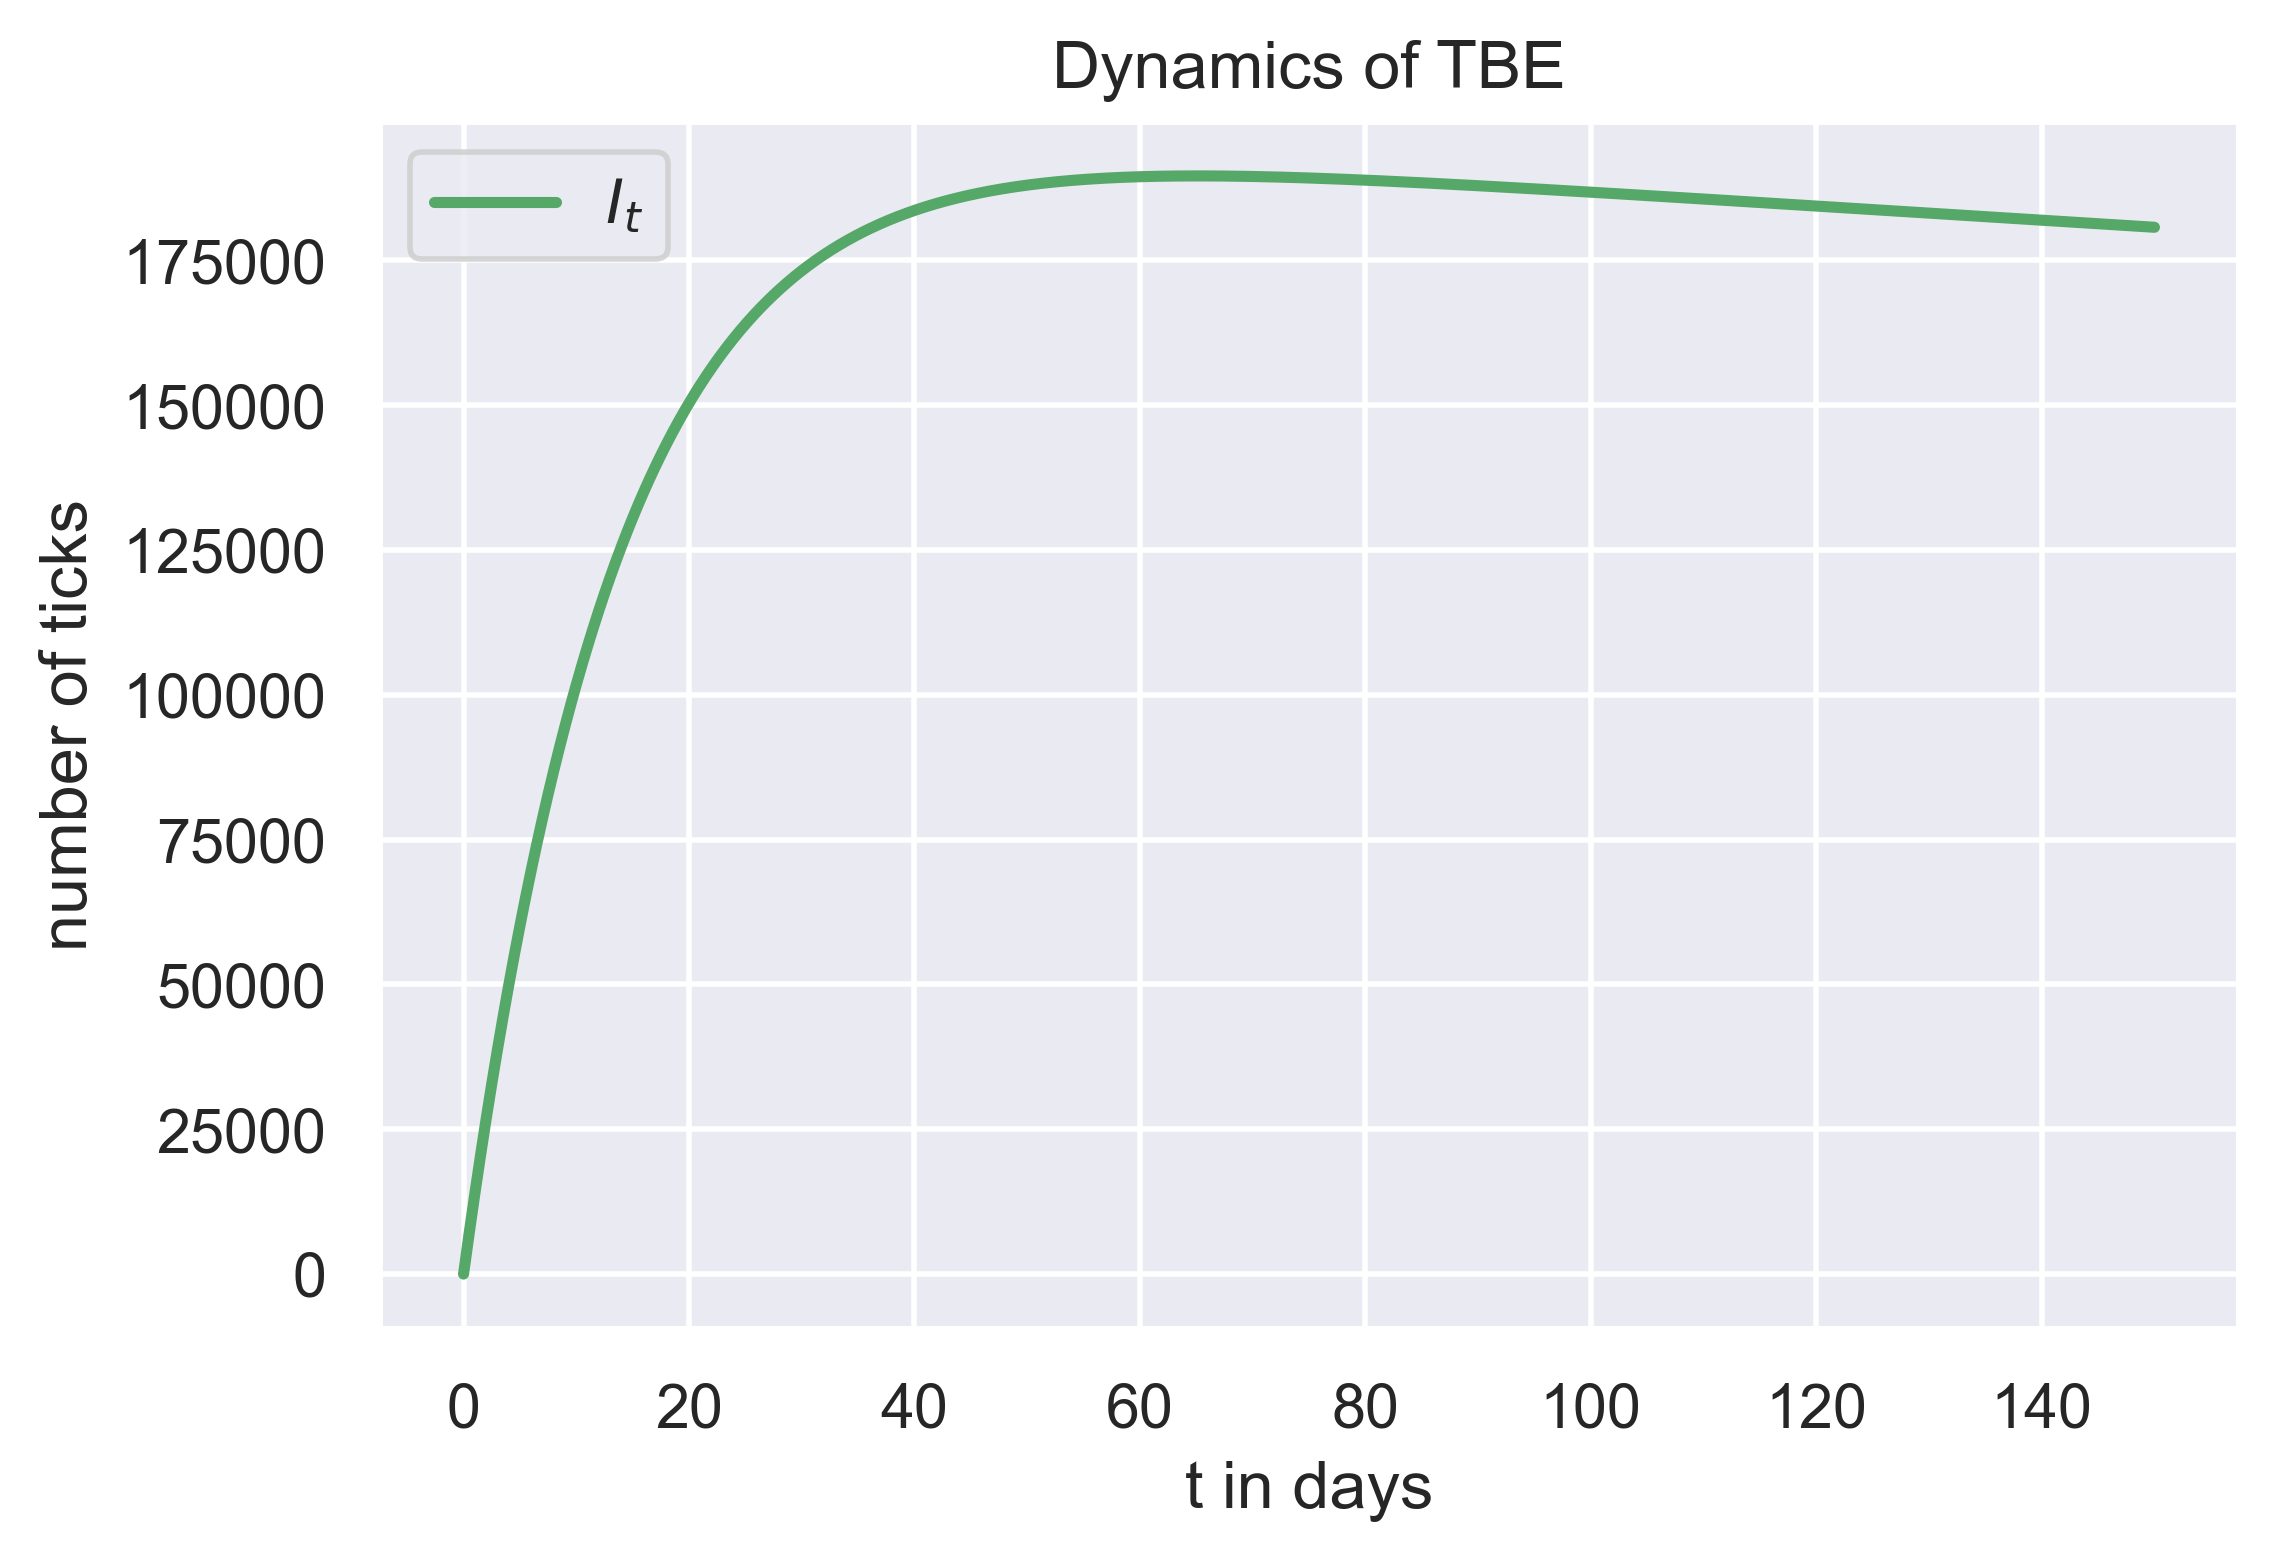

In [16]:
fig = plt.figure(dpi=400)
plt.plot(ts,Ps2[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# TBE with Dogs

In [17]:
from ast import Lambda
from audioop import mul
from random import betavariate
from types import LambdaType

from pyparsing import alphanums


def dPd_dt(Pd, t):
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    S_hd,E_hd,I_hd,V_hd,    S_td,I_td = Pd
    
    N_hd = S_hd + E_hd + I_hd + V_hd
    N_td = S_td + I_td
    

    dS_hd = λ_h -β_dog * I_td * S_hd/N_hd - ψ * S_hd - μ_h * S_hd + r_2 * E_hd
    dE_hd = β_dog * I_td * S_hd/N_hd -r_2 * E_hd -μ_h * E_hd + β_dog *I_td* δ * V_hd/N_hd - γ_h * E_hd
    dI_hd =  γ_h * E_hd -μ_h * I_hd - μ_e * I_hd -r_1 * I_hd
    dV_hd = r_1 * I_hd + ψ * S_hd -μ_h * V_hd -β_dog * δ * I_td * V_hd/N_hd
        
    dS_td = λ_t -μ_t * S_td -β_2*I_hd*S_td/N_td
    dI_td = β_2*I_hd*S_td/N_td -μ_t*I_td
    
    return [dS_hd,dE_hd,dI_hd,dV_hd,dS_td,dI_td]



## Initial Conditions

In [18]:
####################Condition1############################################
E_hd0 = 0
I_hd0 = 0
V_hd0 = 0
I_td0 = 0.05*2.063e10

S_td0 = 2.063e10 - I_td0
S_hd0 = 13.1e6  - E_hd0 - I_hd0 - V_hd0

Pd0 = [S_hd0, E_hd0, I_hd0, V_hd0,    #Humans
     S_td0, I_td0]    #Ticks
ts = np.linspace(0, 150, 1500)
Psd0 = odeint(dPd_dt, Pd0, ts)
Psd0
####################Condition2############################################
E_hd1 = 40*13.1e4
I_hd1 = 0
V_hd1 = 0
I_td1 = 0.05*2.063e10
S_td1 = 2.063e10 - I_td1
S_hd1 = 13.1e6  - E_hd1 - I_hd1 - V_hd1

Pd1 = [S_hd1, E_hd1, I_hd1, V_hd1,    #Humans
     S_t1, I_t1]    #Ticks
ts = np.linspace(0, 150, 1500)
Psd1 = odeint(dPd_dt, Pd1, ts)
Psd1
####################Condition3############################################

E_hd2 = 0
I_hd2 = 40*13.1e4
V_hd2 = 0
I_td2 = 0
S_td2 = 2.063e10 - I_td2
S_hd2 = 13.1e6  - E_hd2 - I_hd2 - V_hd2

Pd2 = [S_hd2, E_hd2, I_hd2, V_hd2,    #Humans
     S_t2, I_t2]    #Ticks
ts = np.linspace(0, 150, 1500)
Psd2 = odeint(dPd_dt, Pd2, ts)
Psd2

array([[7.86000000e+06, 0.00000000e+00, 5.24000000e+06, 0.00000000e+00,
        2.06300000e+10, 0.00000000e+00],
       [7.85953388e+06, 7.03335475e-02, 5.20214478e+06, 3.77619905e+04,
        2.06285847e+10, 1.43132962e+03],
       [7.85906765e+06, 2.79121013e-01, 5.16456304e+06, 7.52542526e+04,
        2.06271694e+10, 2.85222072e+03],
       ...,
       [7.17881928e+06, 1.01879156e+03, 1.46261160e+03, 5.79148055e+06,
        1.86180950e+10, 1.80960541e+05],
       [7.17838443e+06, 1.01866839e+03, 1.46171884e+03, 5.79187980e+06,
        1.86168190e+10, 1.80948539e+05],
       [7.17794961e+06, 1.01854524e+03, 1.46083136e+03, 5.79227902e+06,
        1.86155431e+10, 1.80936538e+05]])

# Condition 1

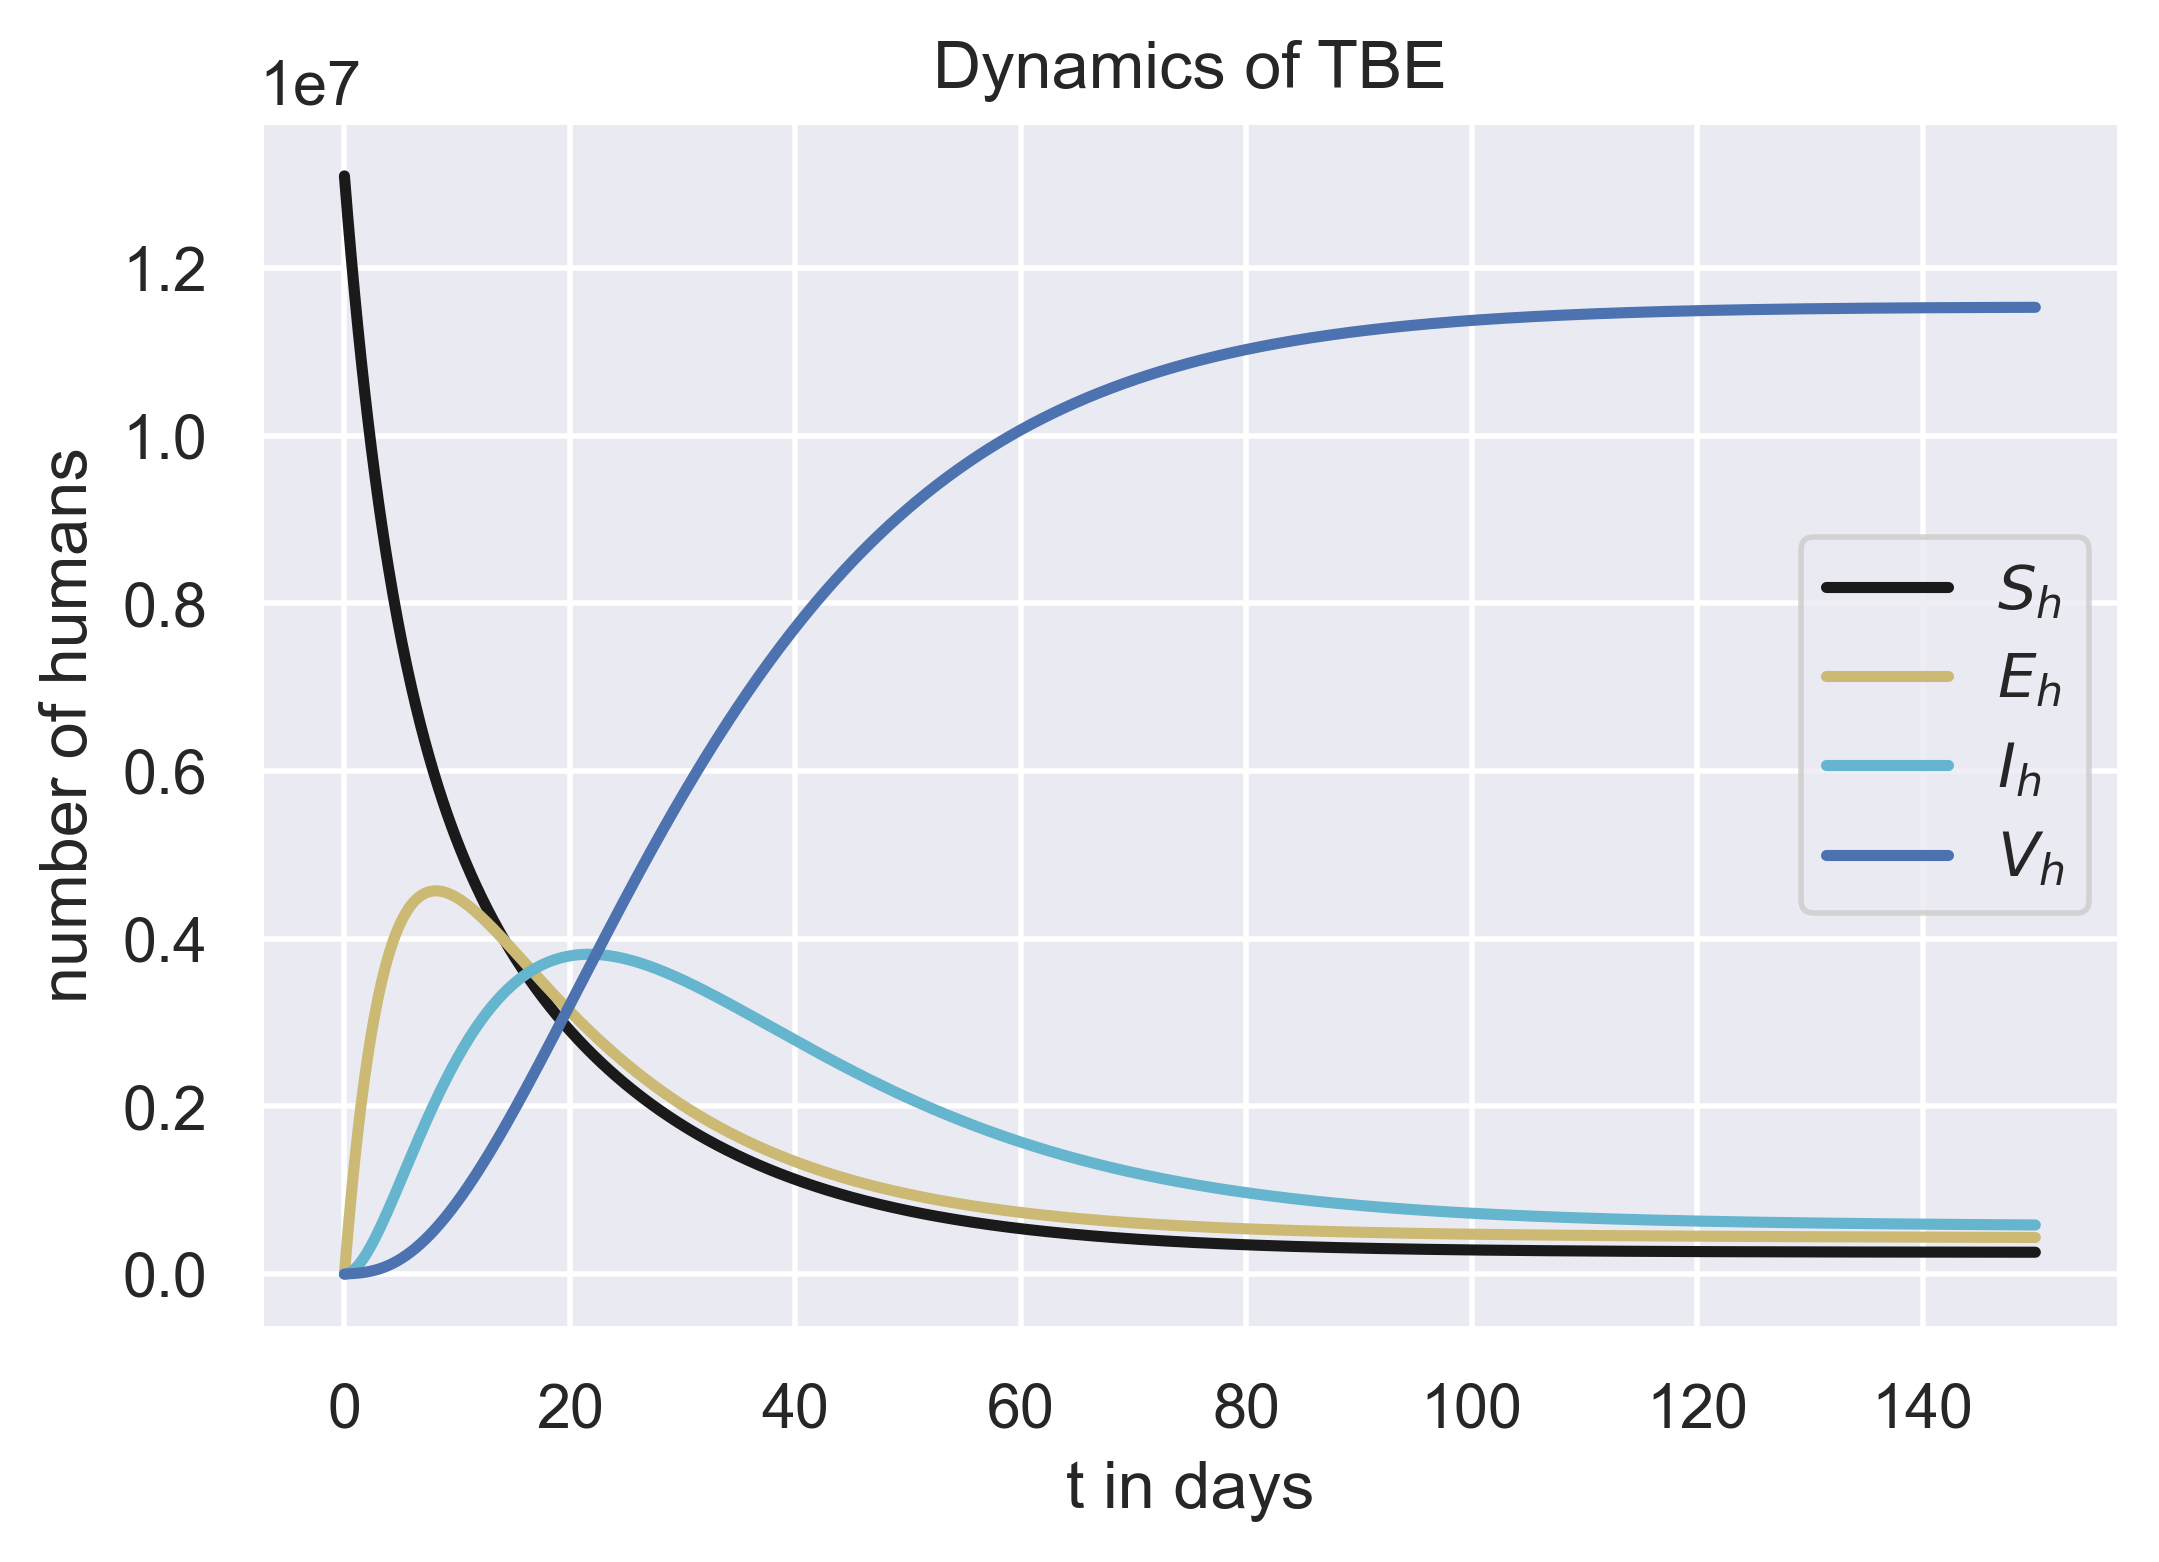

In [19]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd0[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Psd0[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Psd0[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Psd0[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

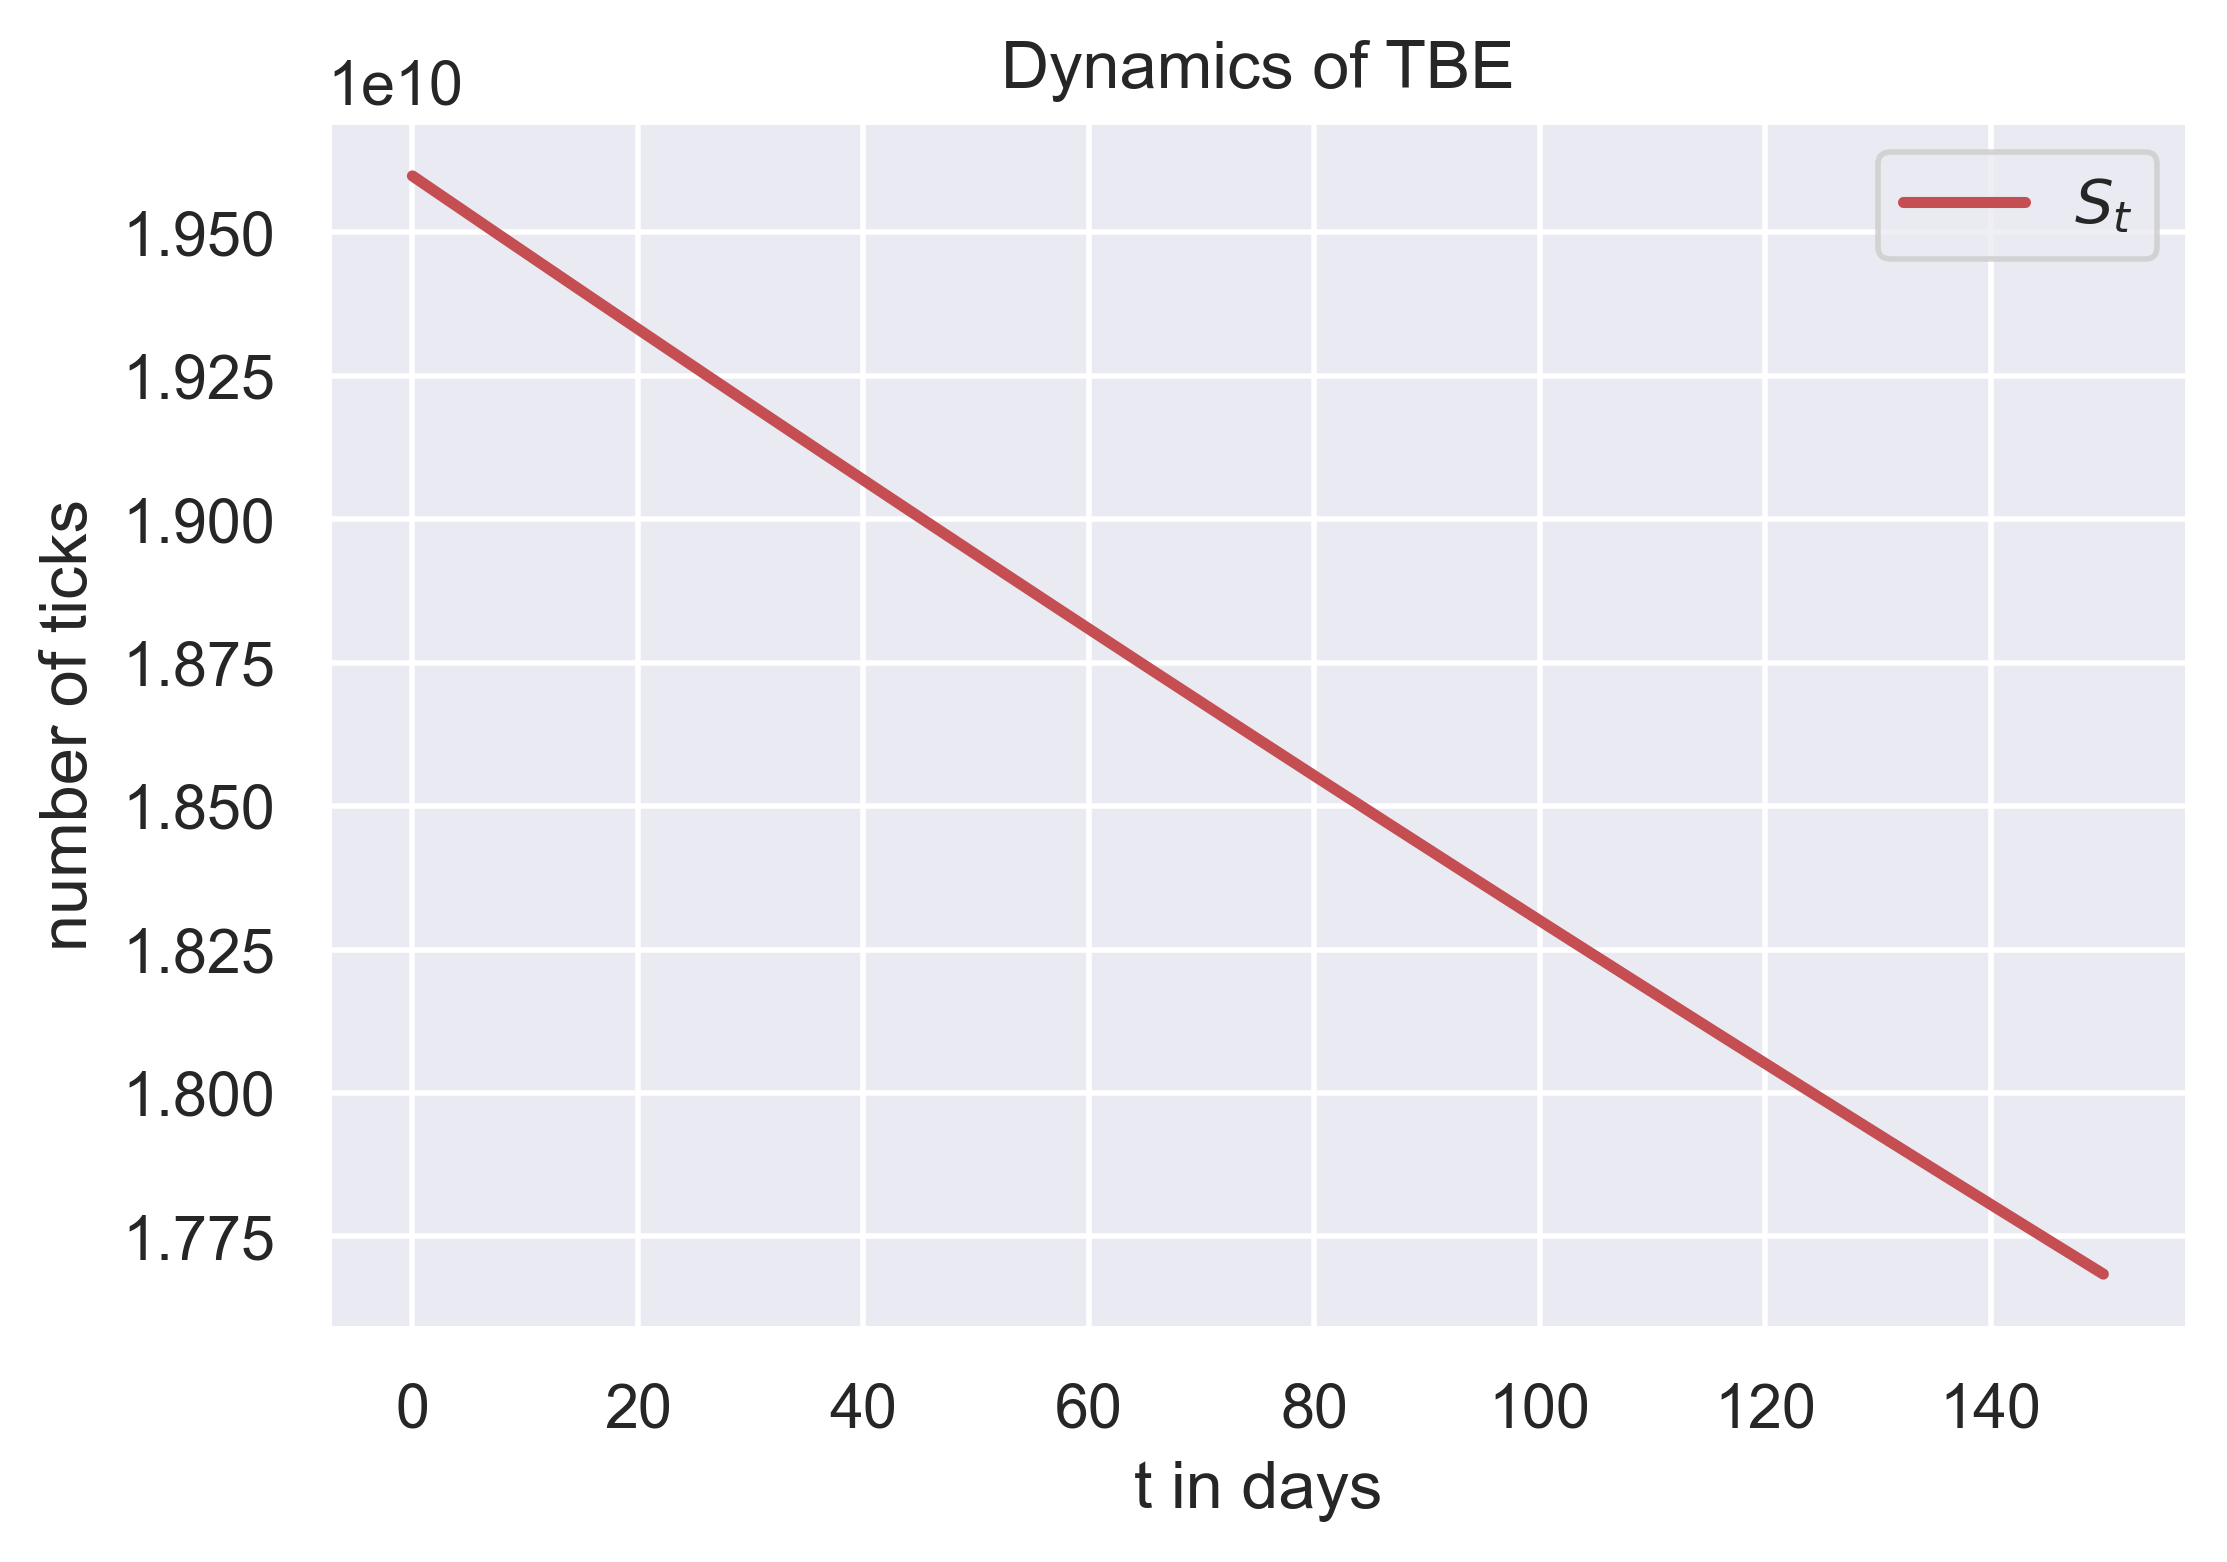

In [20]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd0[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()

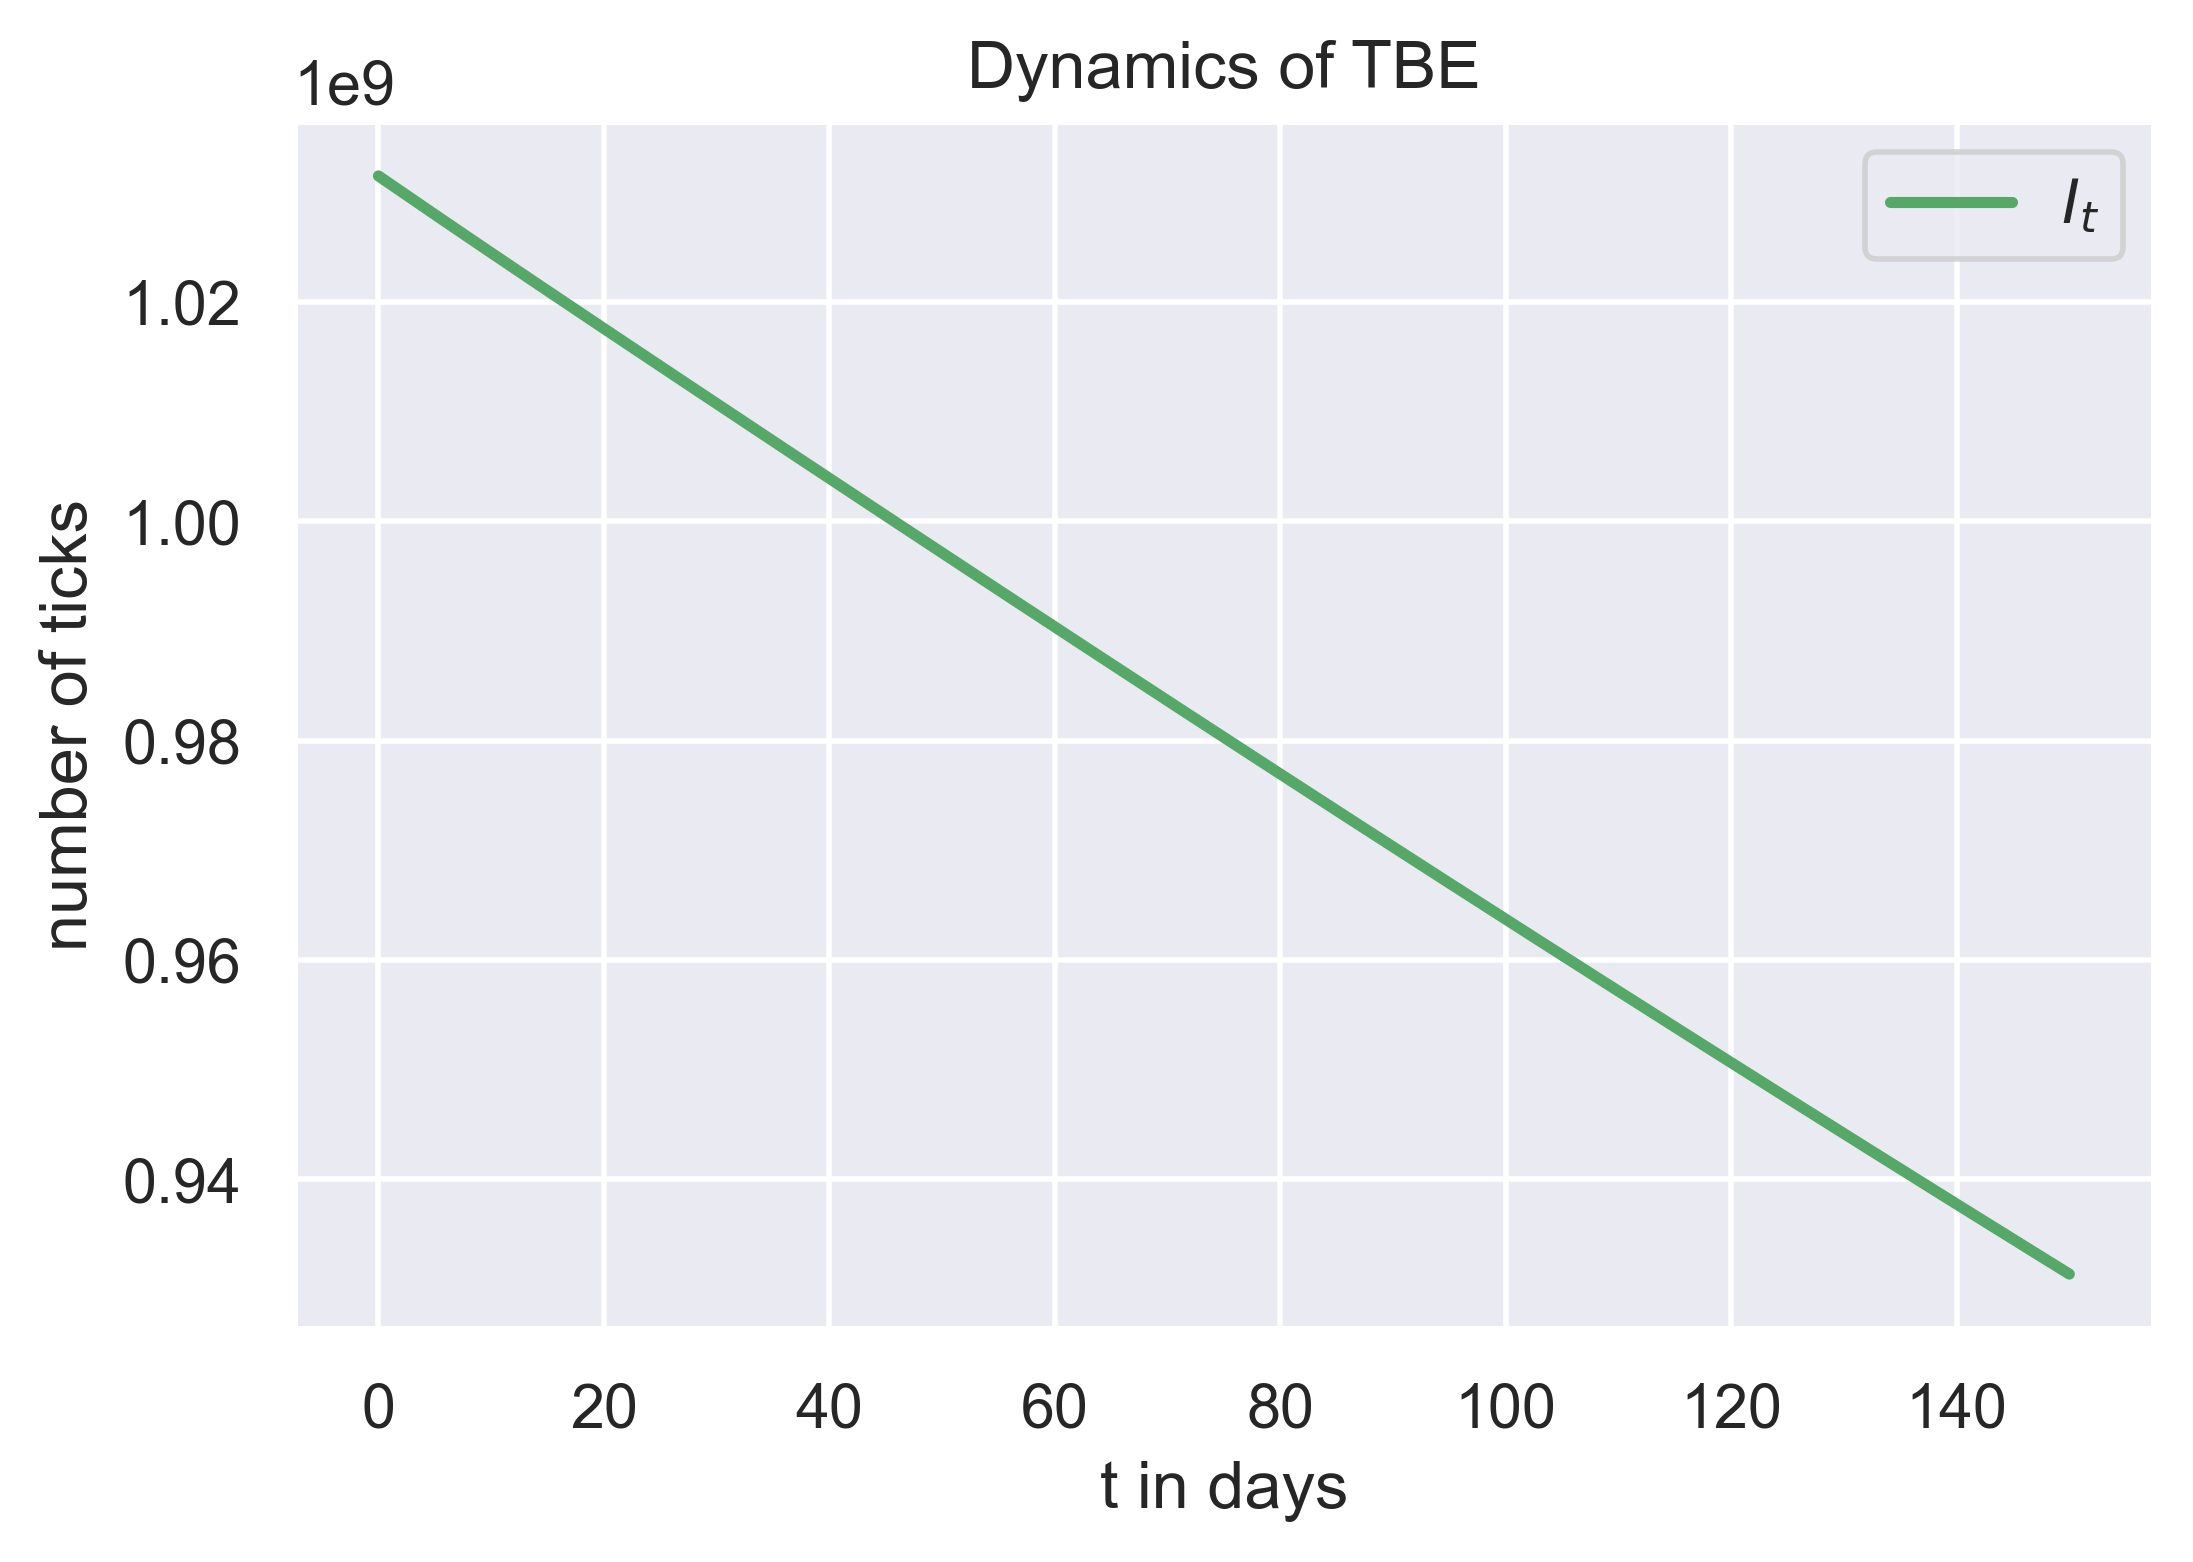

In [21]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd0[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# Condition 2

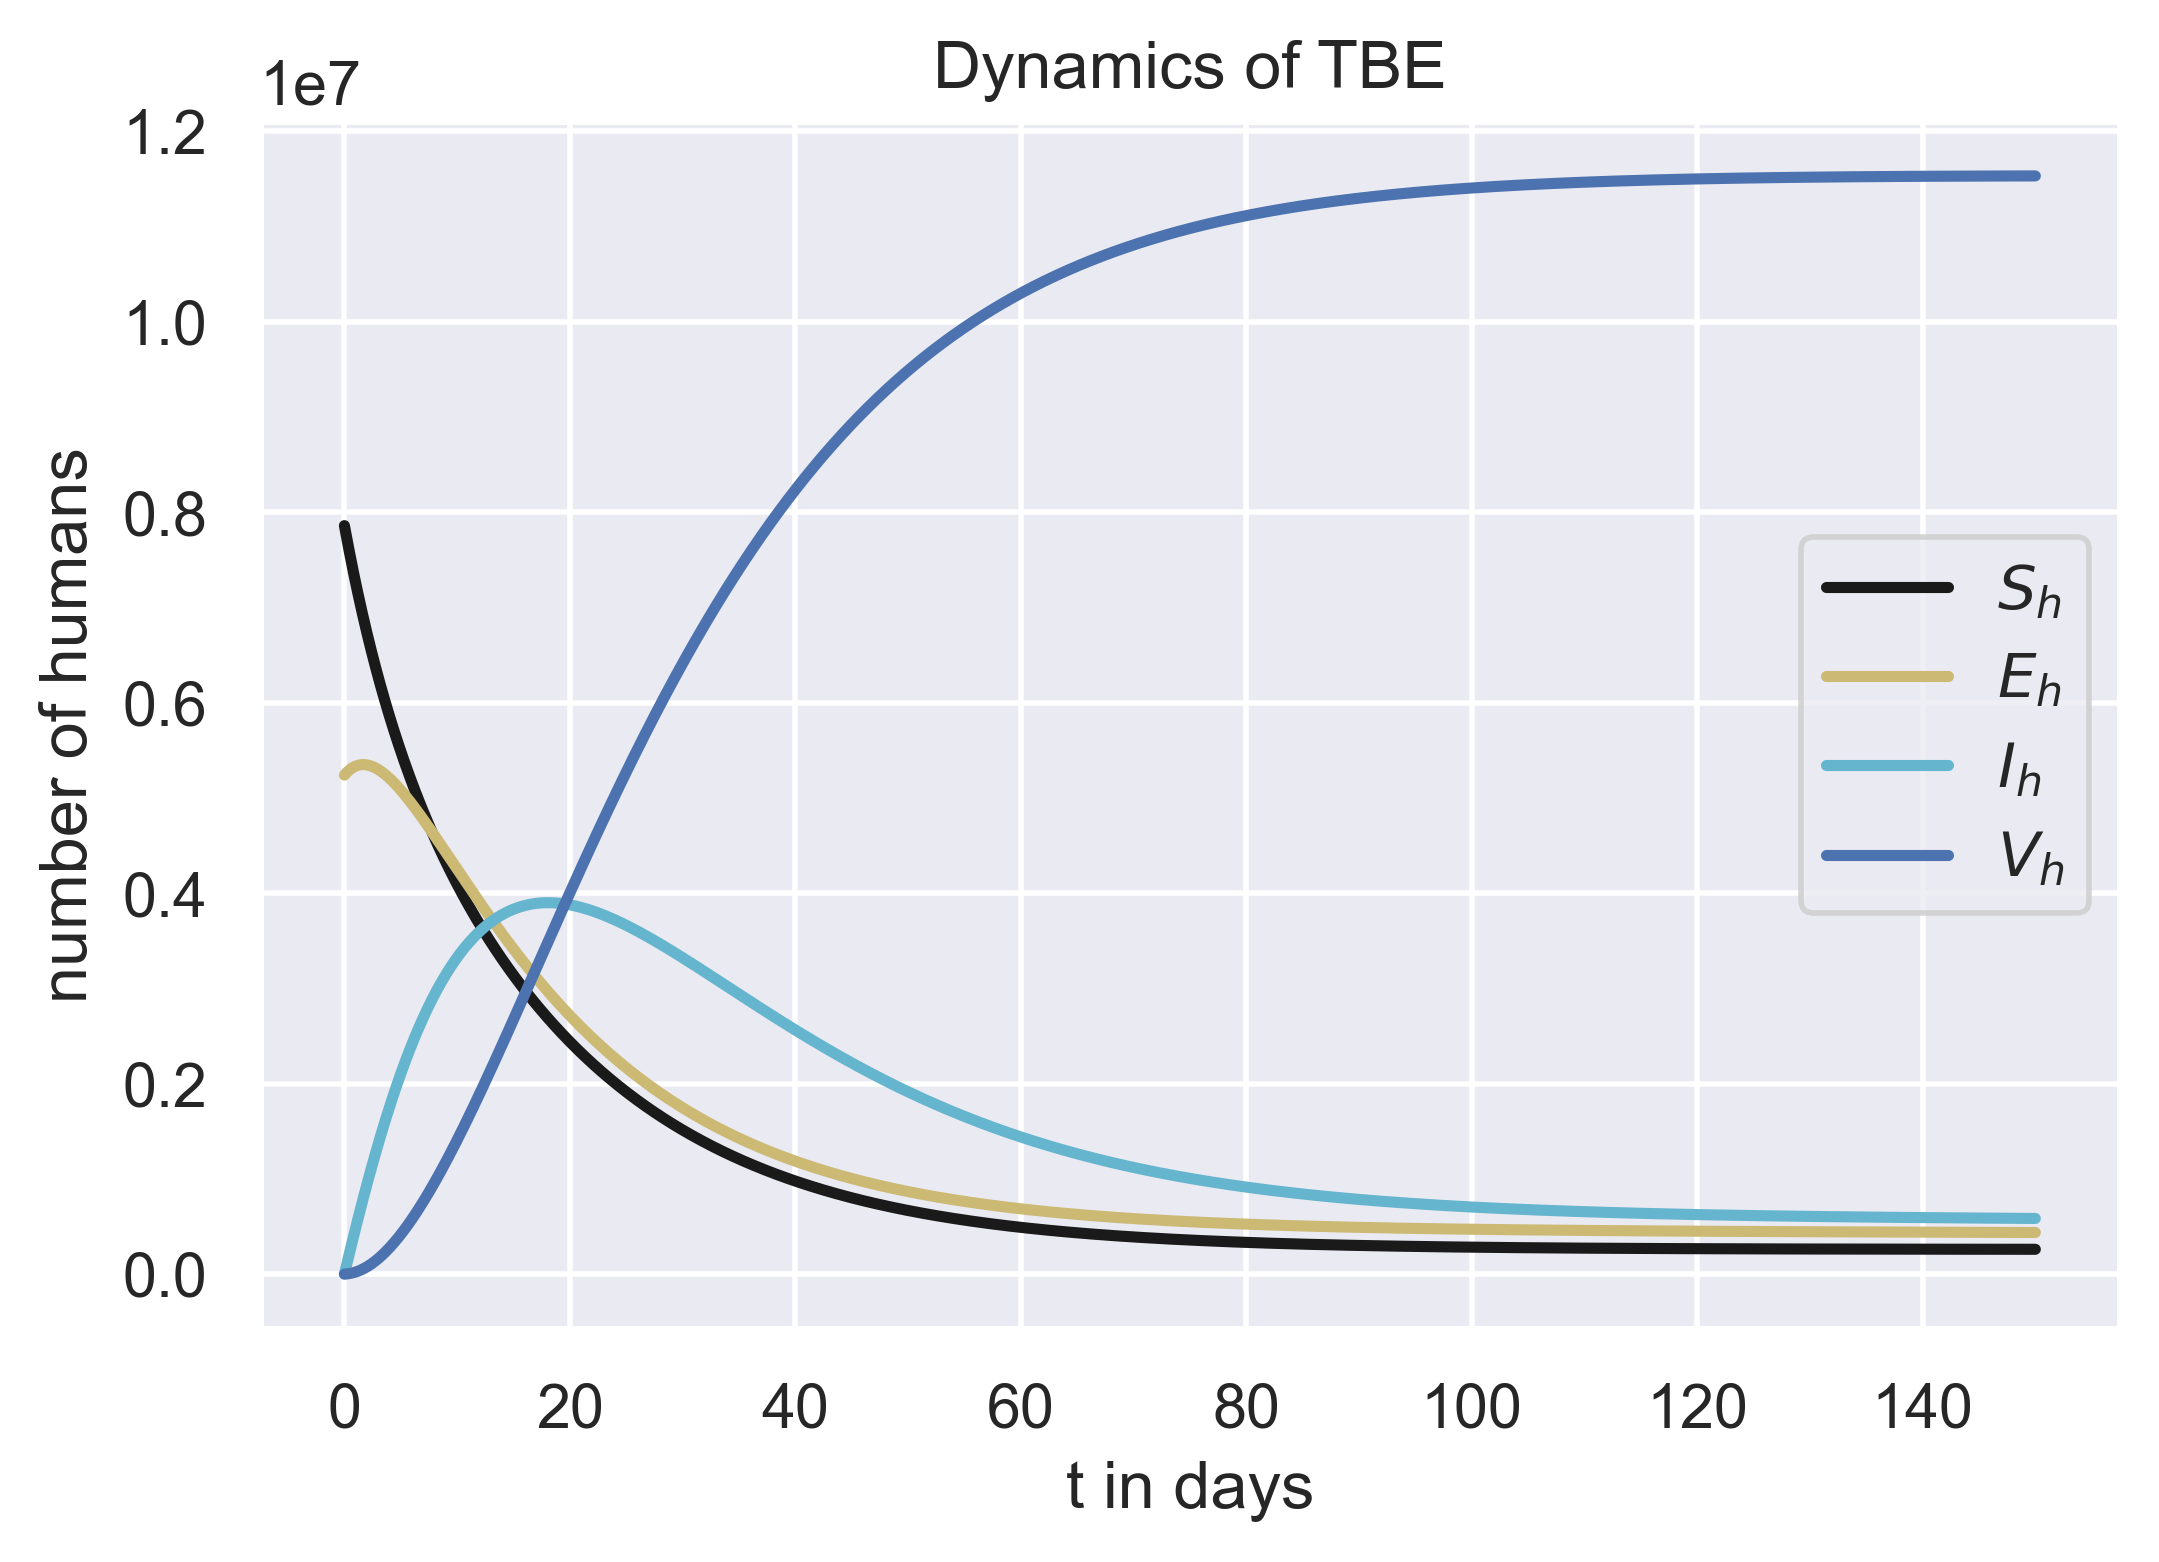

In [22]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd1[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Psd1[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Psd1[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Psd1[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

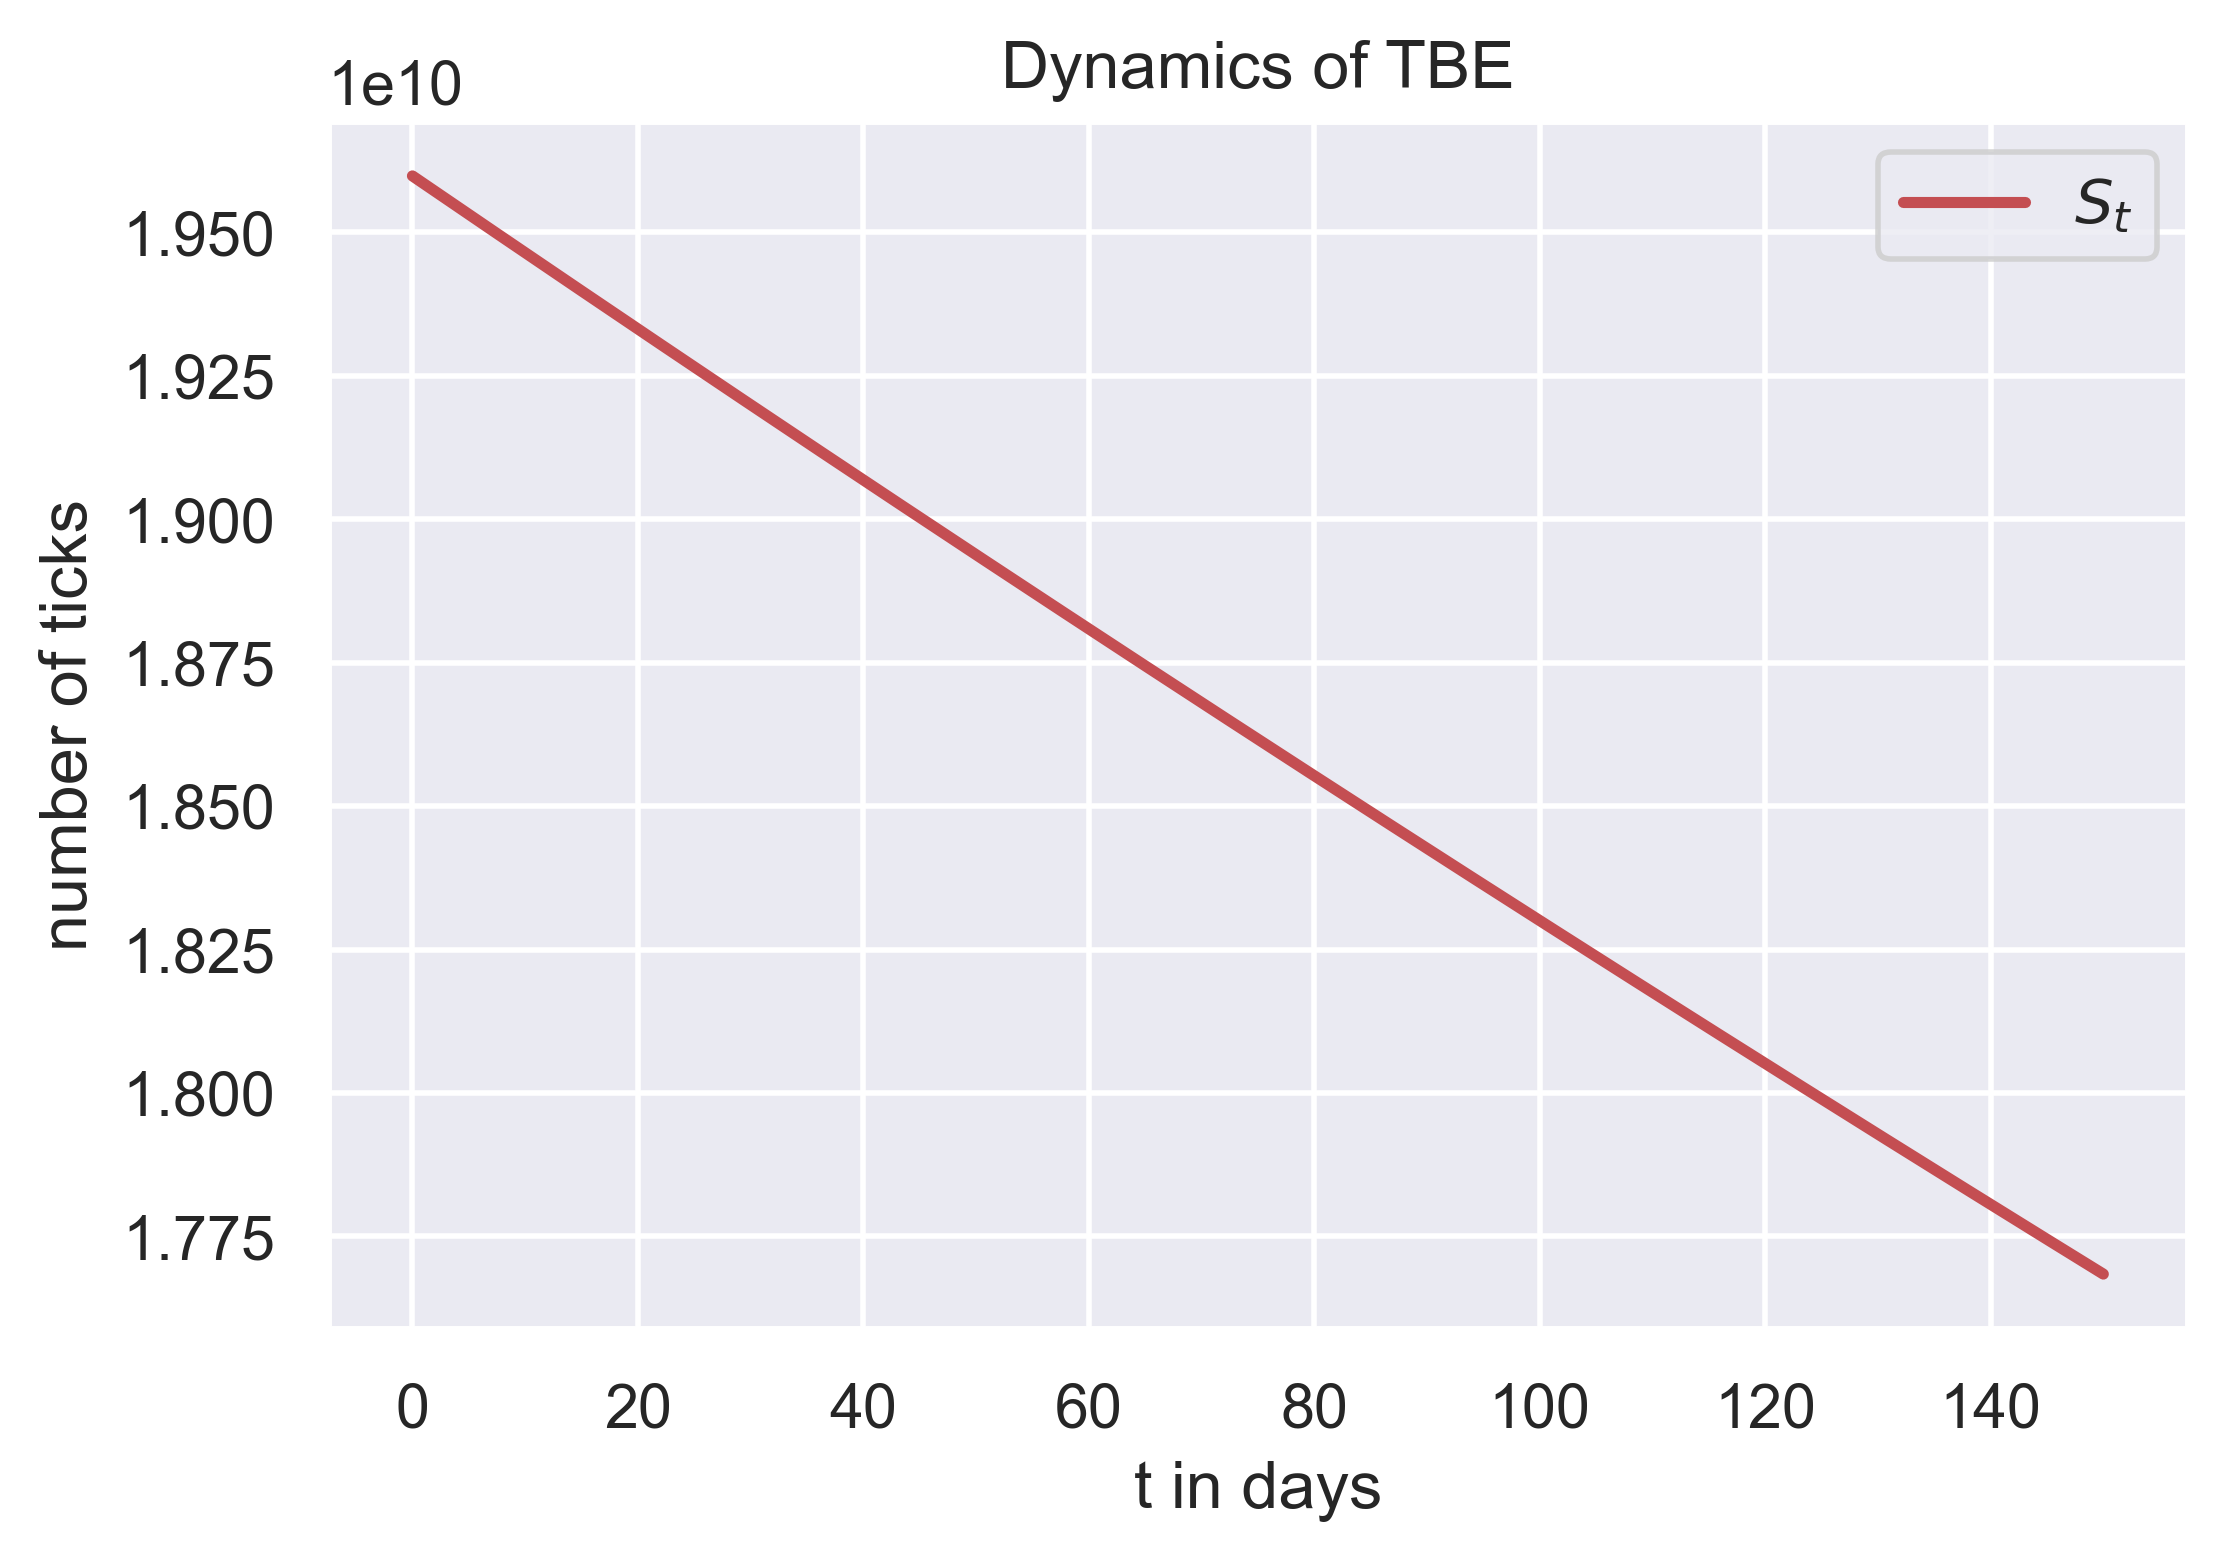

In [23]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd1[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()

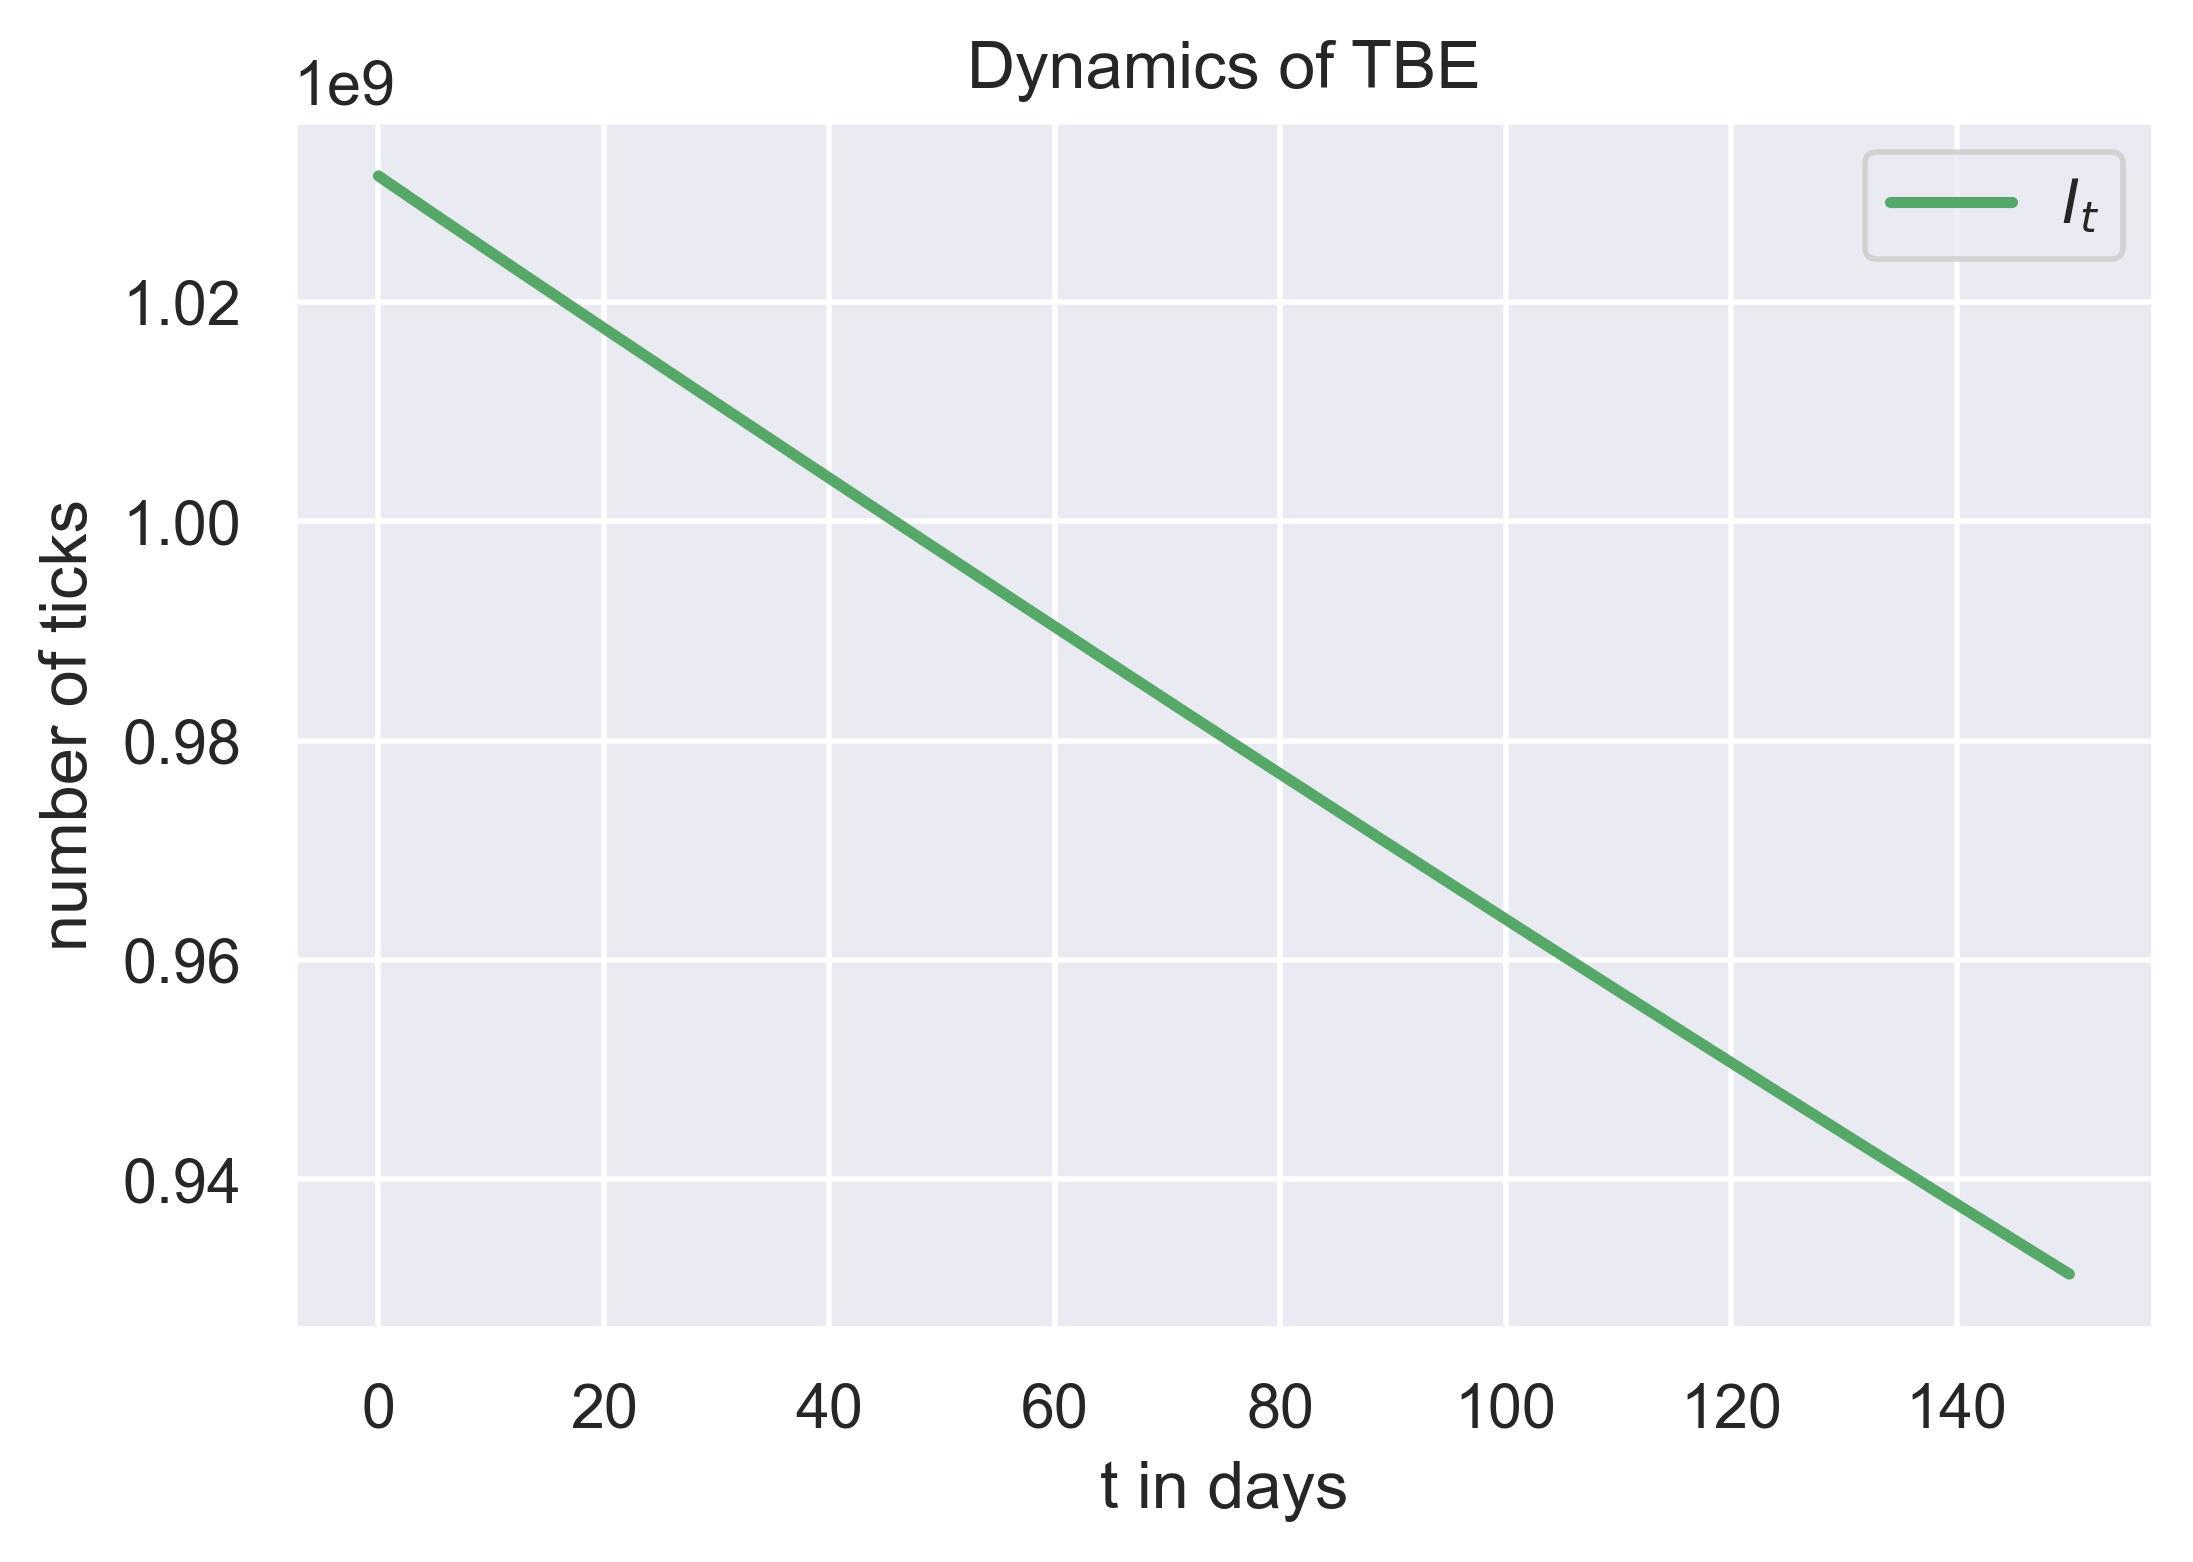

In [24]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd1[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# Condition 3

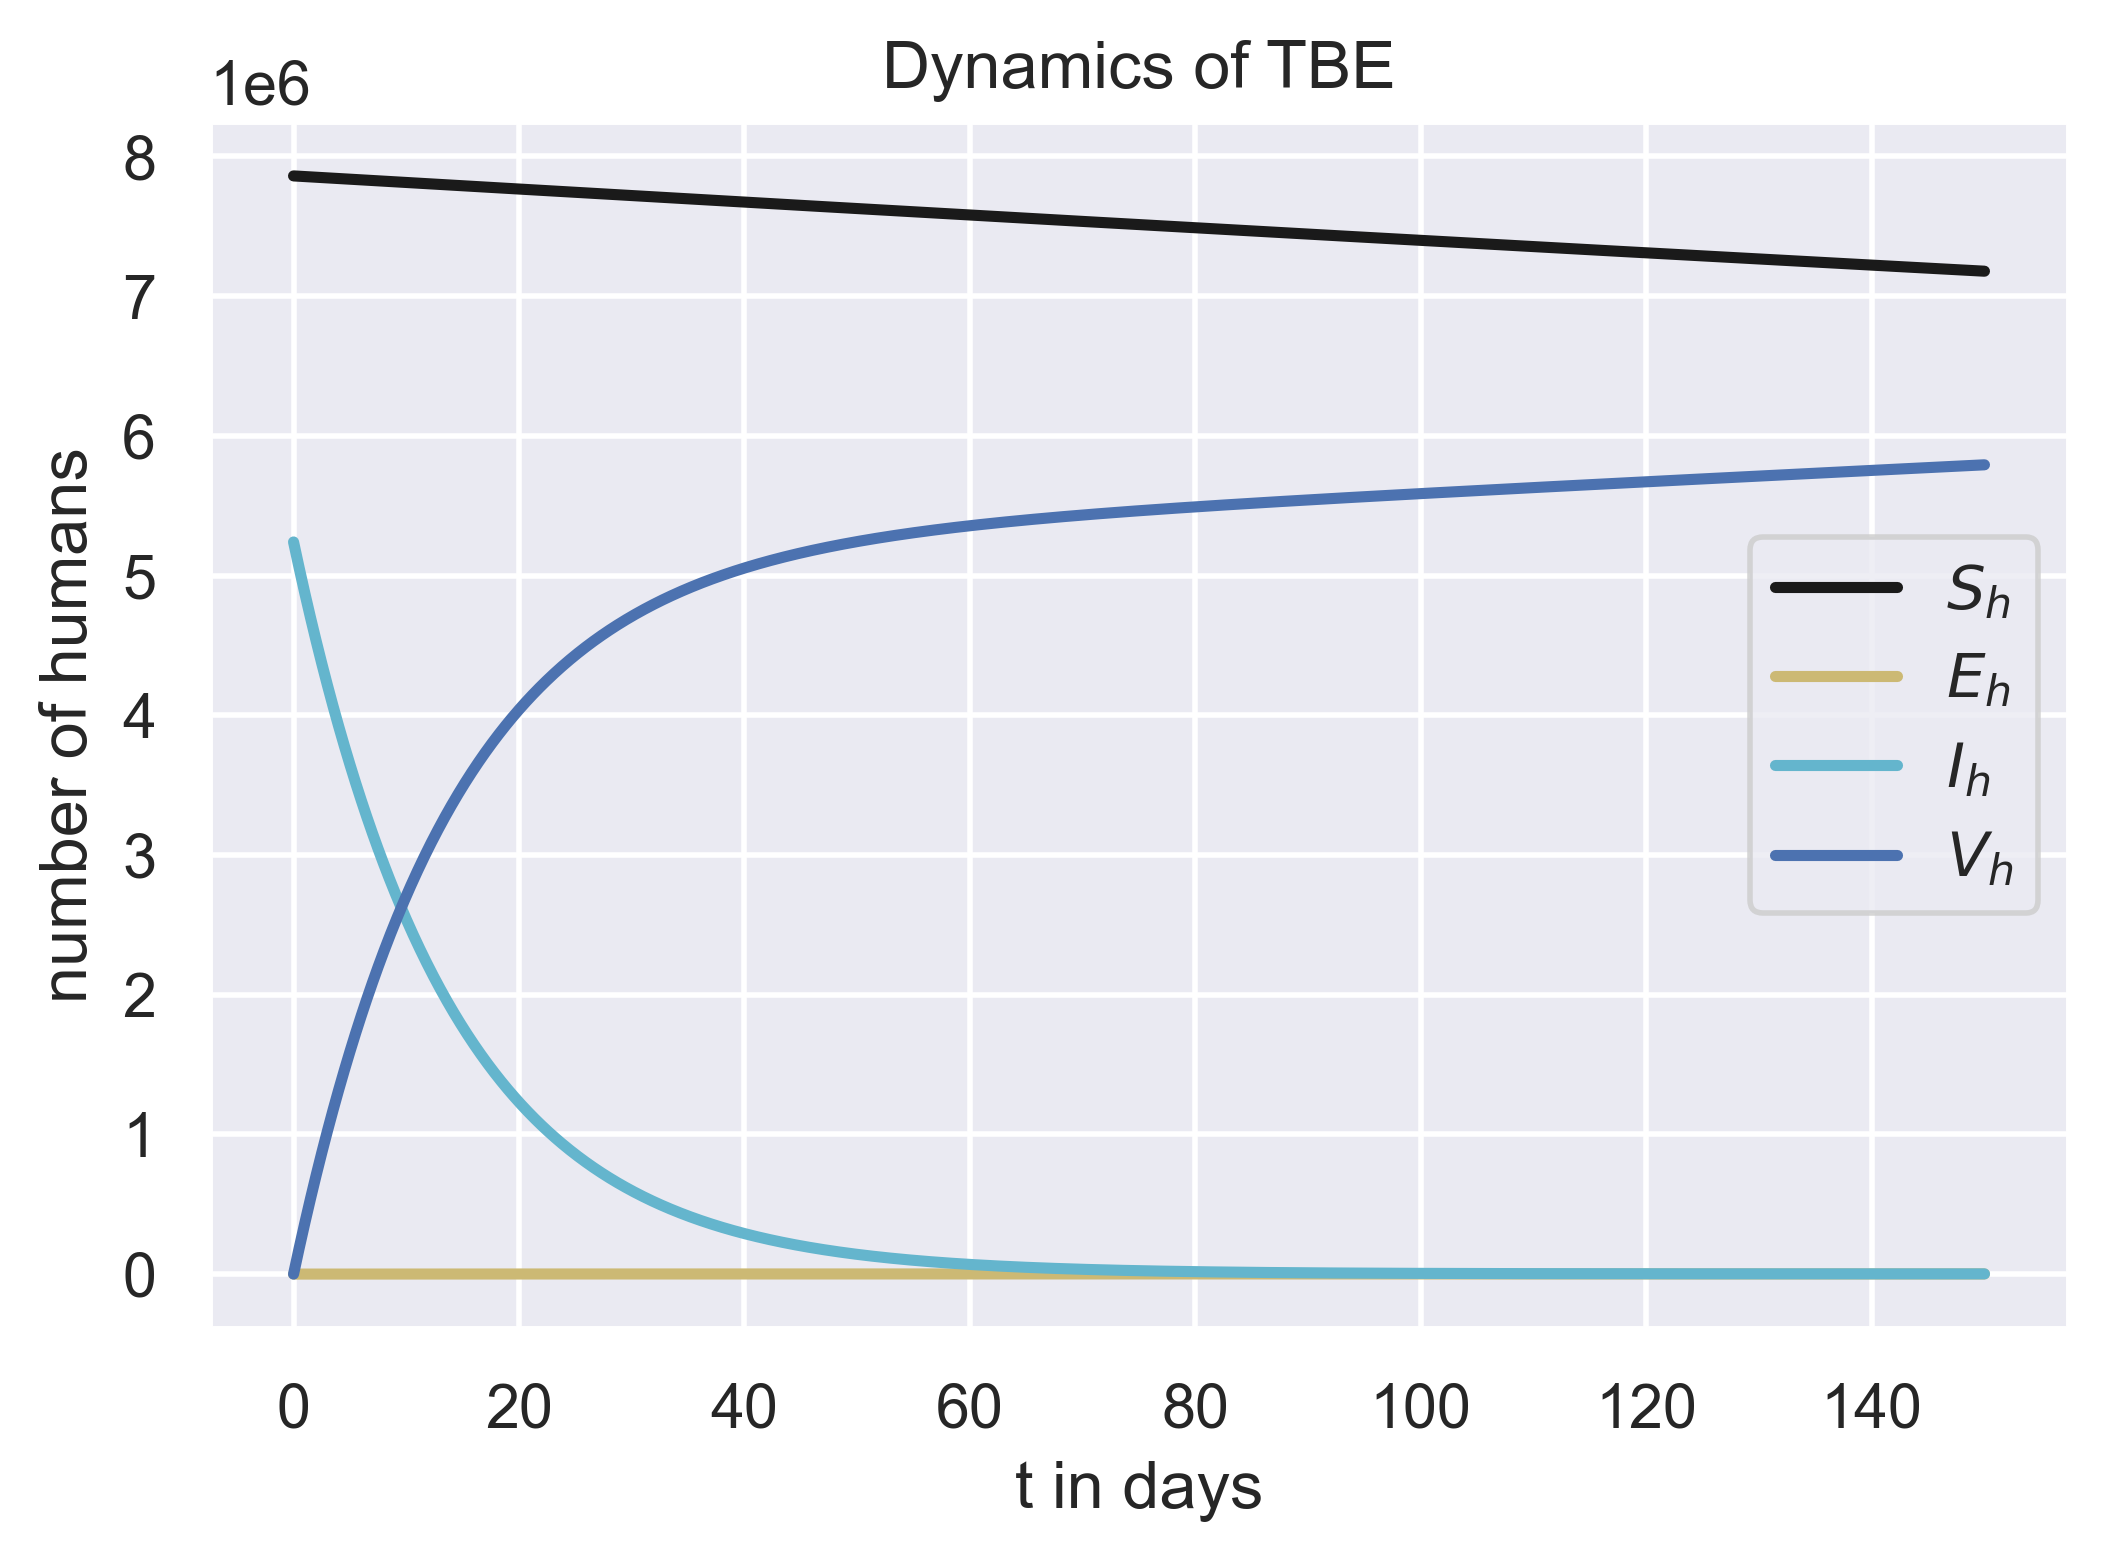

In [25]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd2[:,0],'k-', linewidth=2.0) #schwarz
plt.plot(ts,Psd2[:,1],'y-', linewidth=2.0) #gelb
plt.plot(ts,Psd2[:,2],'c-', linewidth=2.0) #cyan 
plt.plot(ts,Psd2[:,3],'b-', linewidth=2.0) #blau


plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$S_h$","$E_h$","$I_h$","$V_h$"])
plt.show()

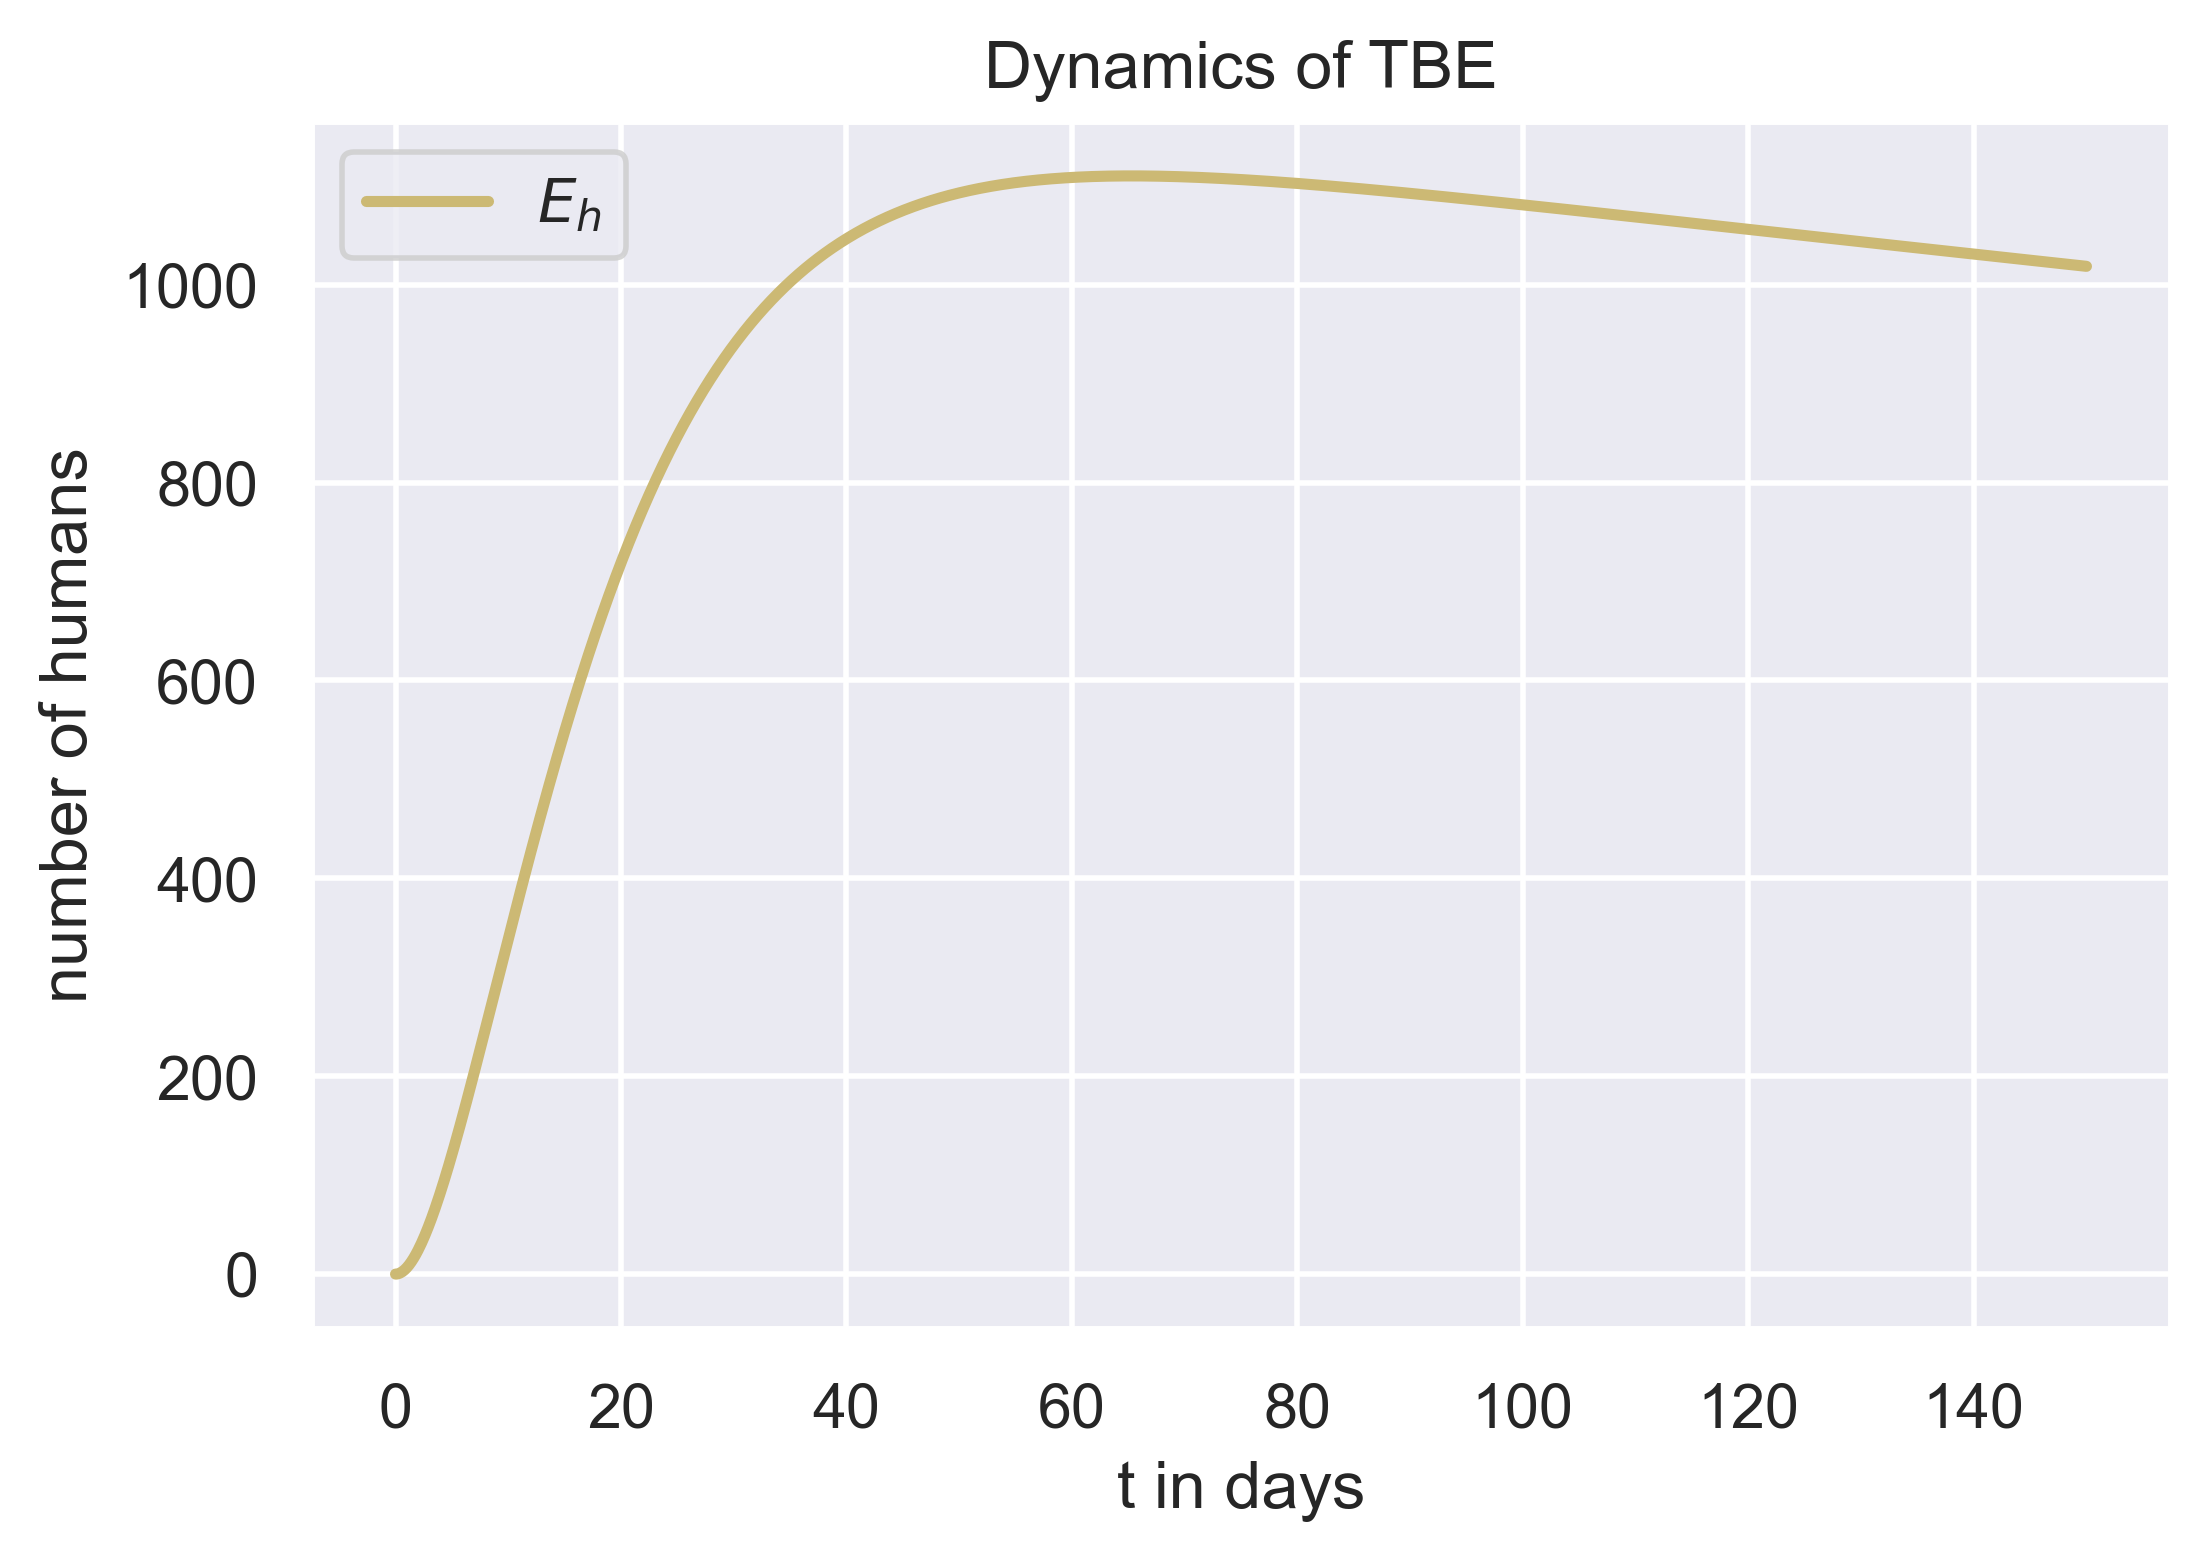

In [26]:
fig = plt.figure(dpi=400)

plt.plot(ts,Psd2[:,1],'y-', linewidth=2.0) #gelb

plt.xlabel("t in days")
plt.ylabel("number of humans")
plt.title("Dynamics of TBE")
plt.legend(["$E_h$"])
plt.show()

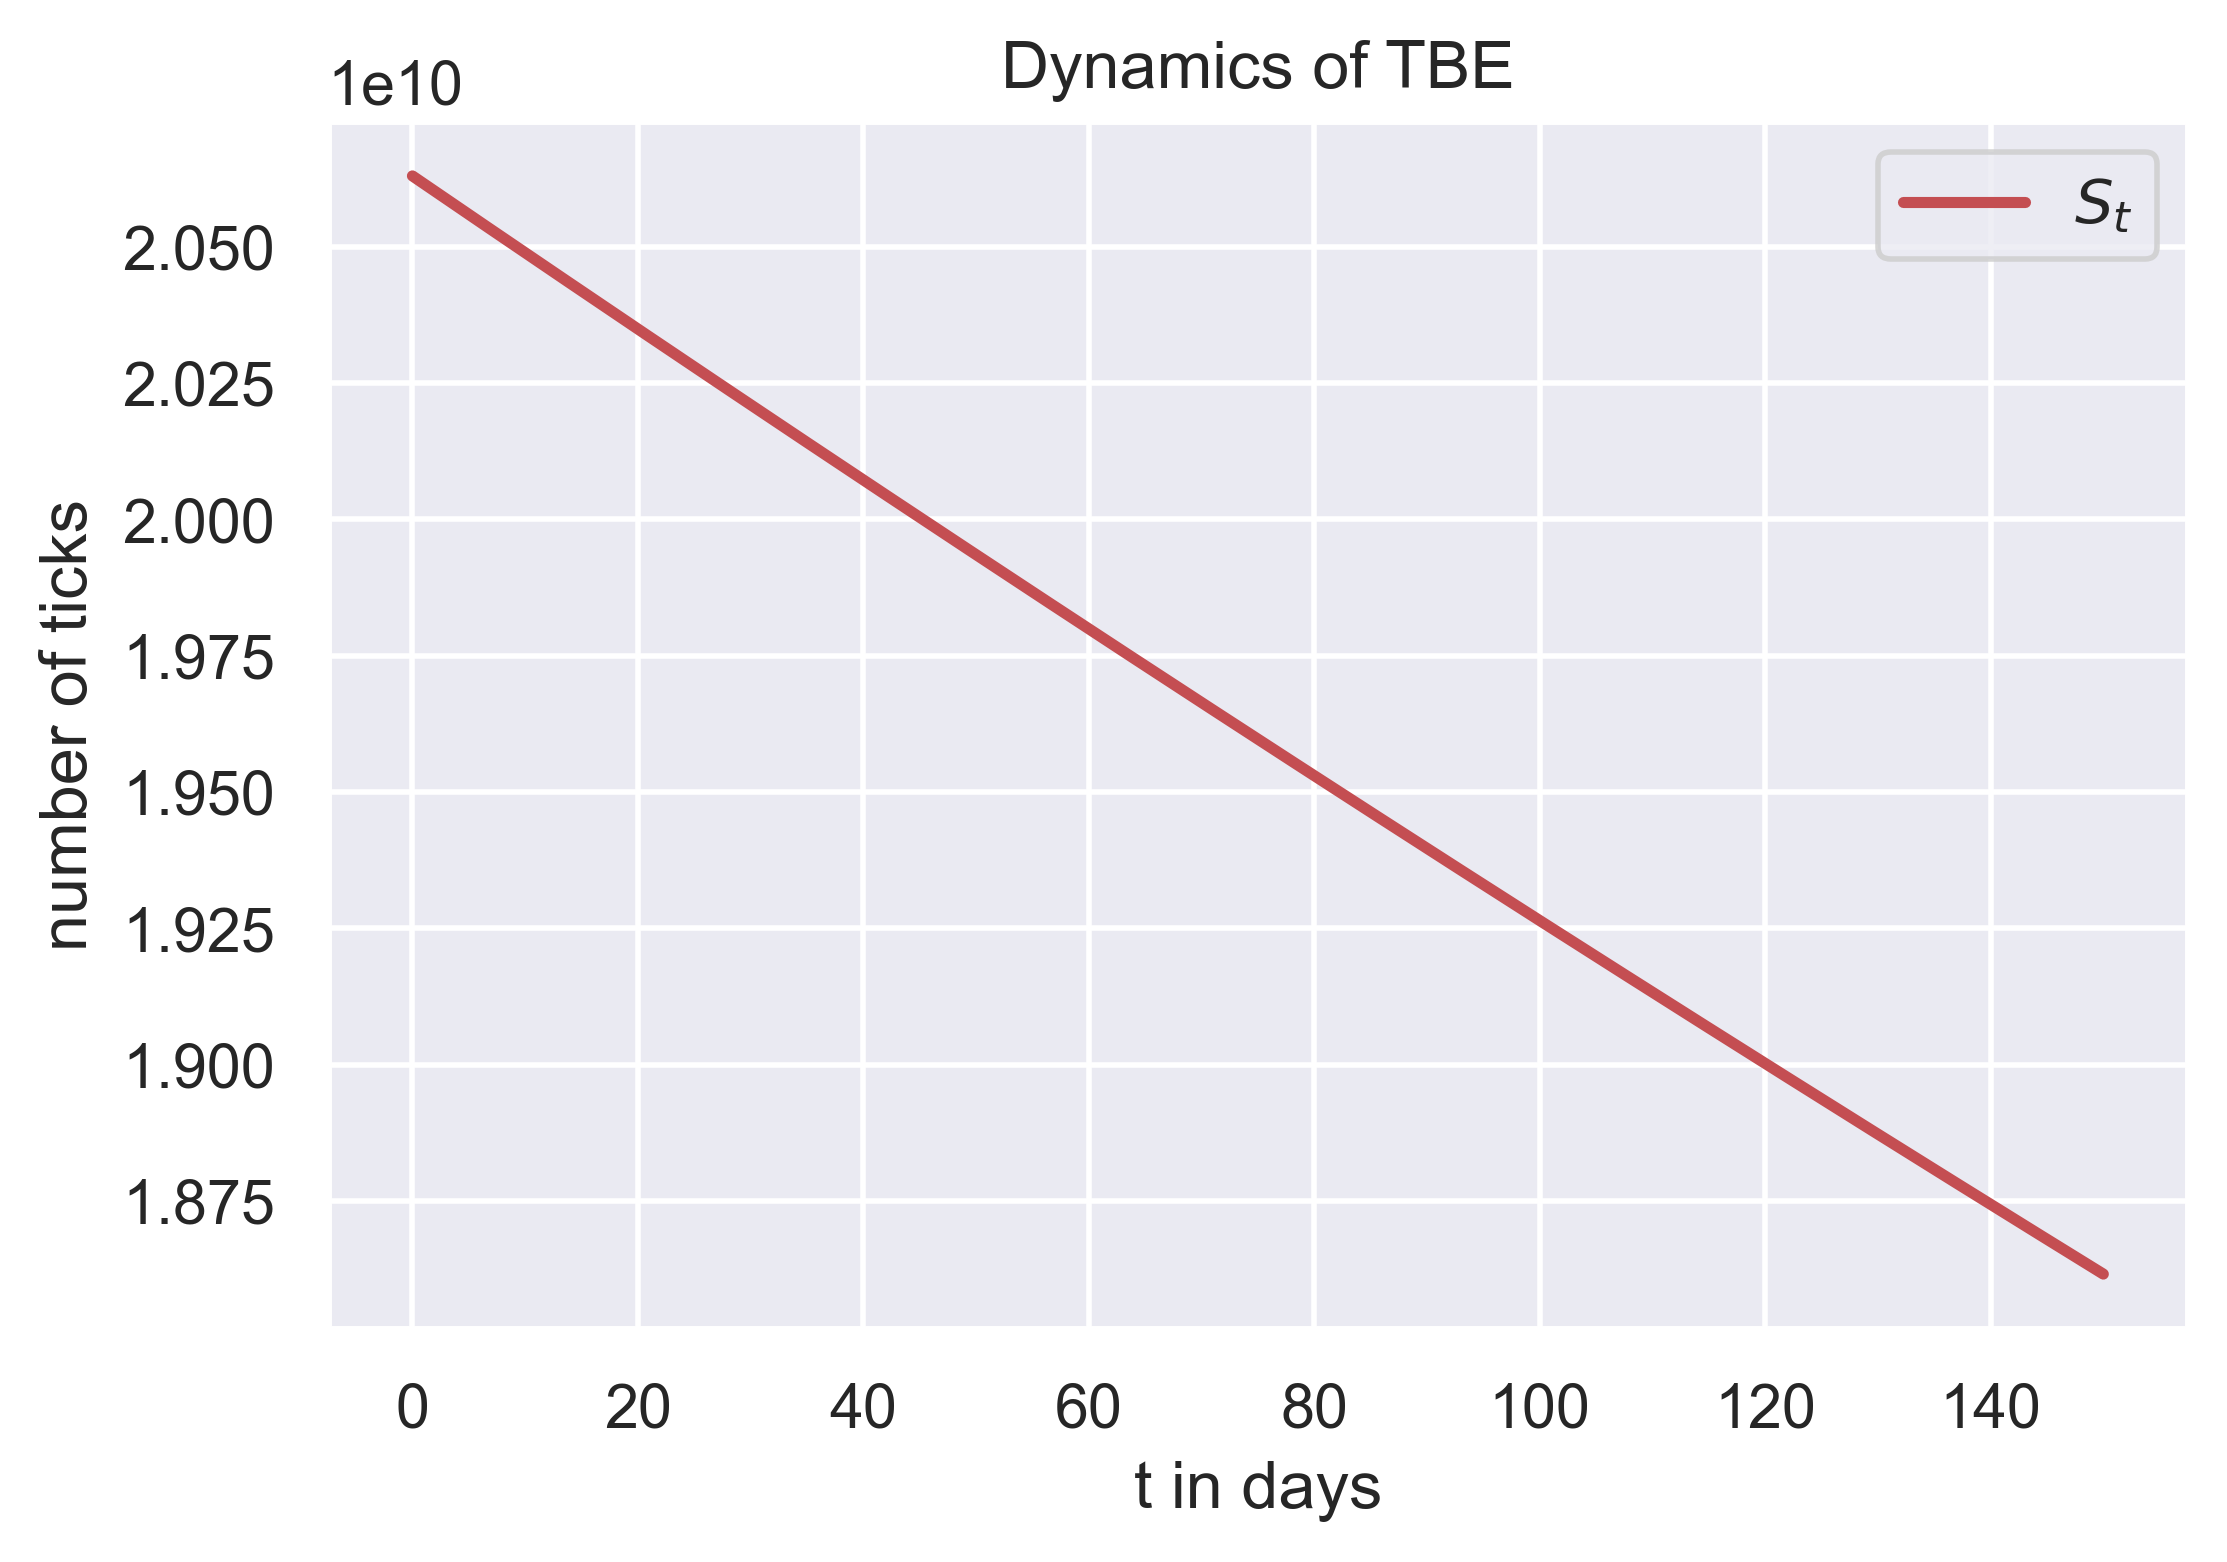

In [27]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd2[:,4],'r-', linewidth=2.0)


plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$S_t$"])
plt.show()

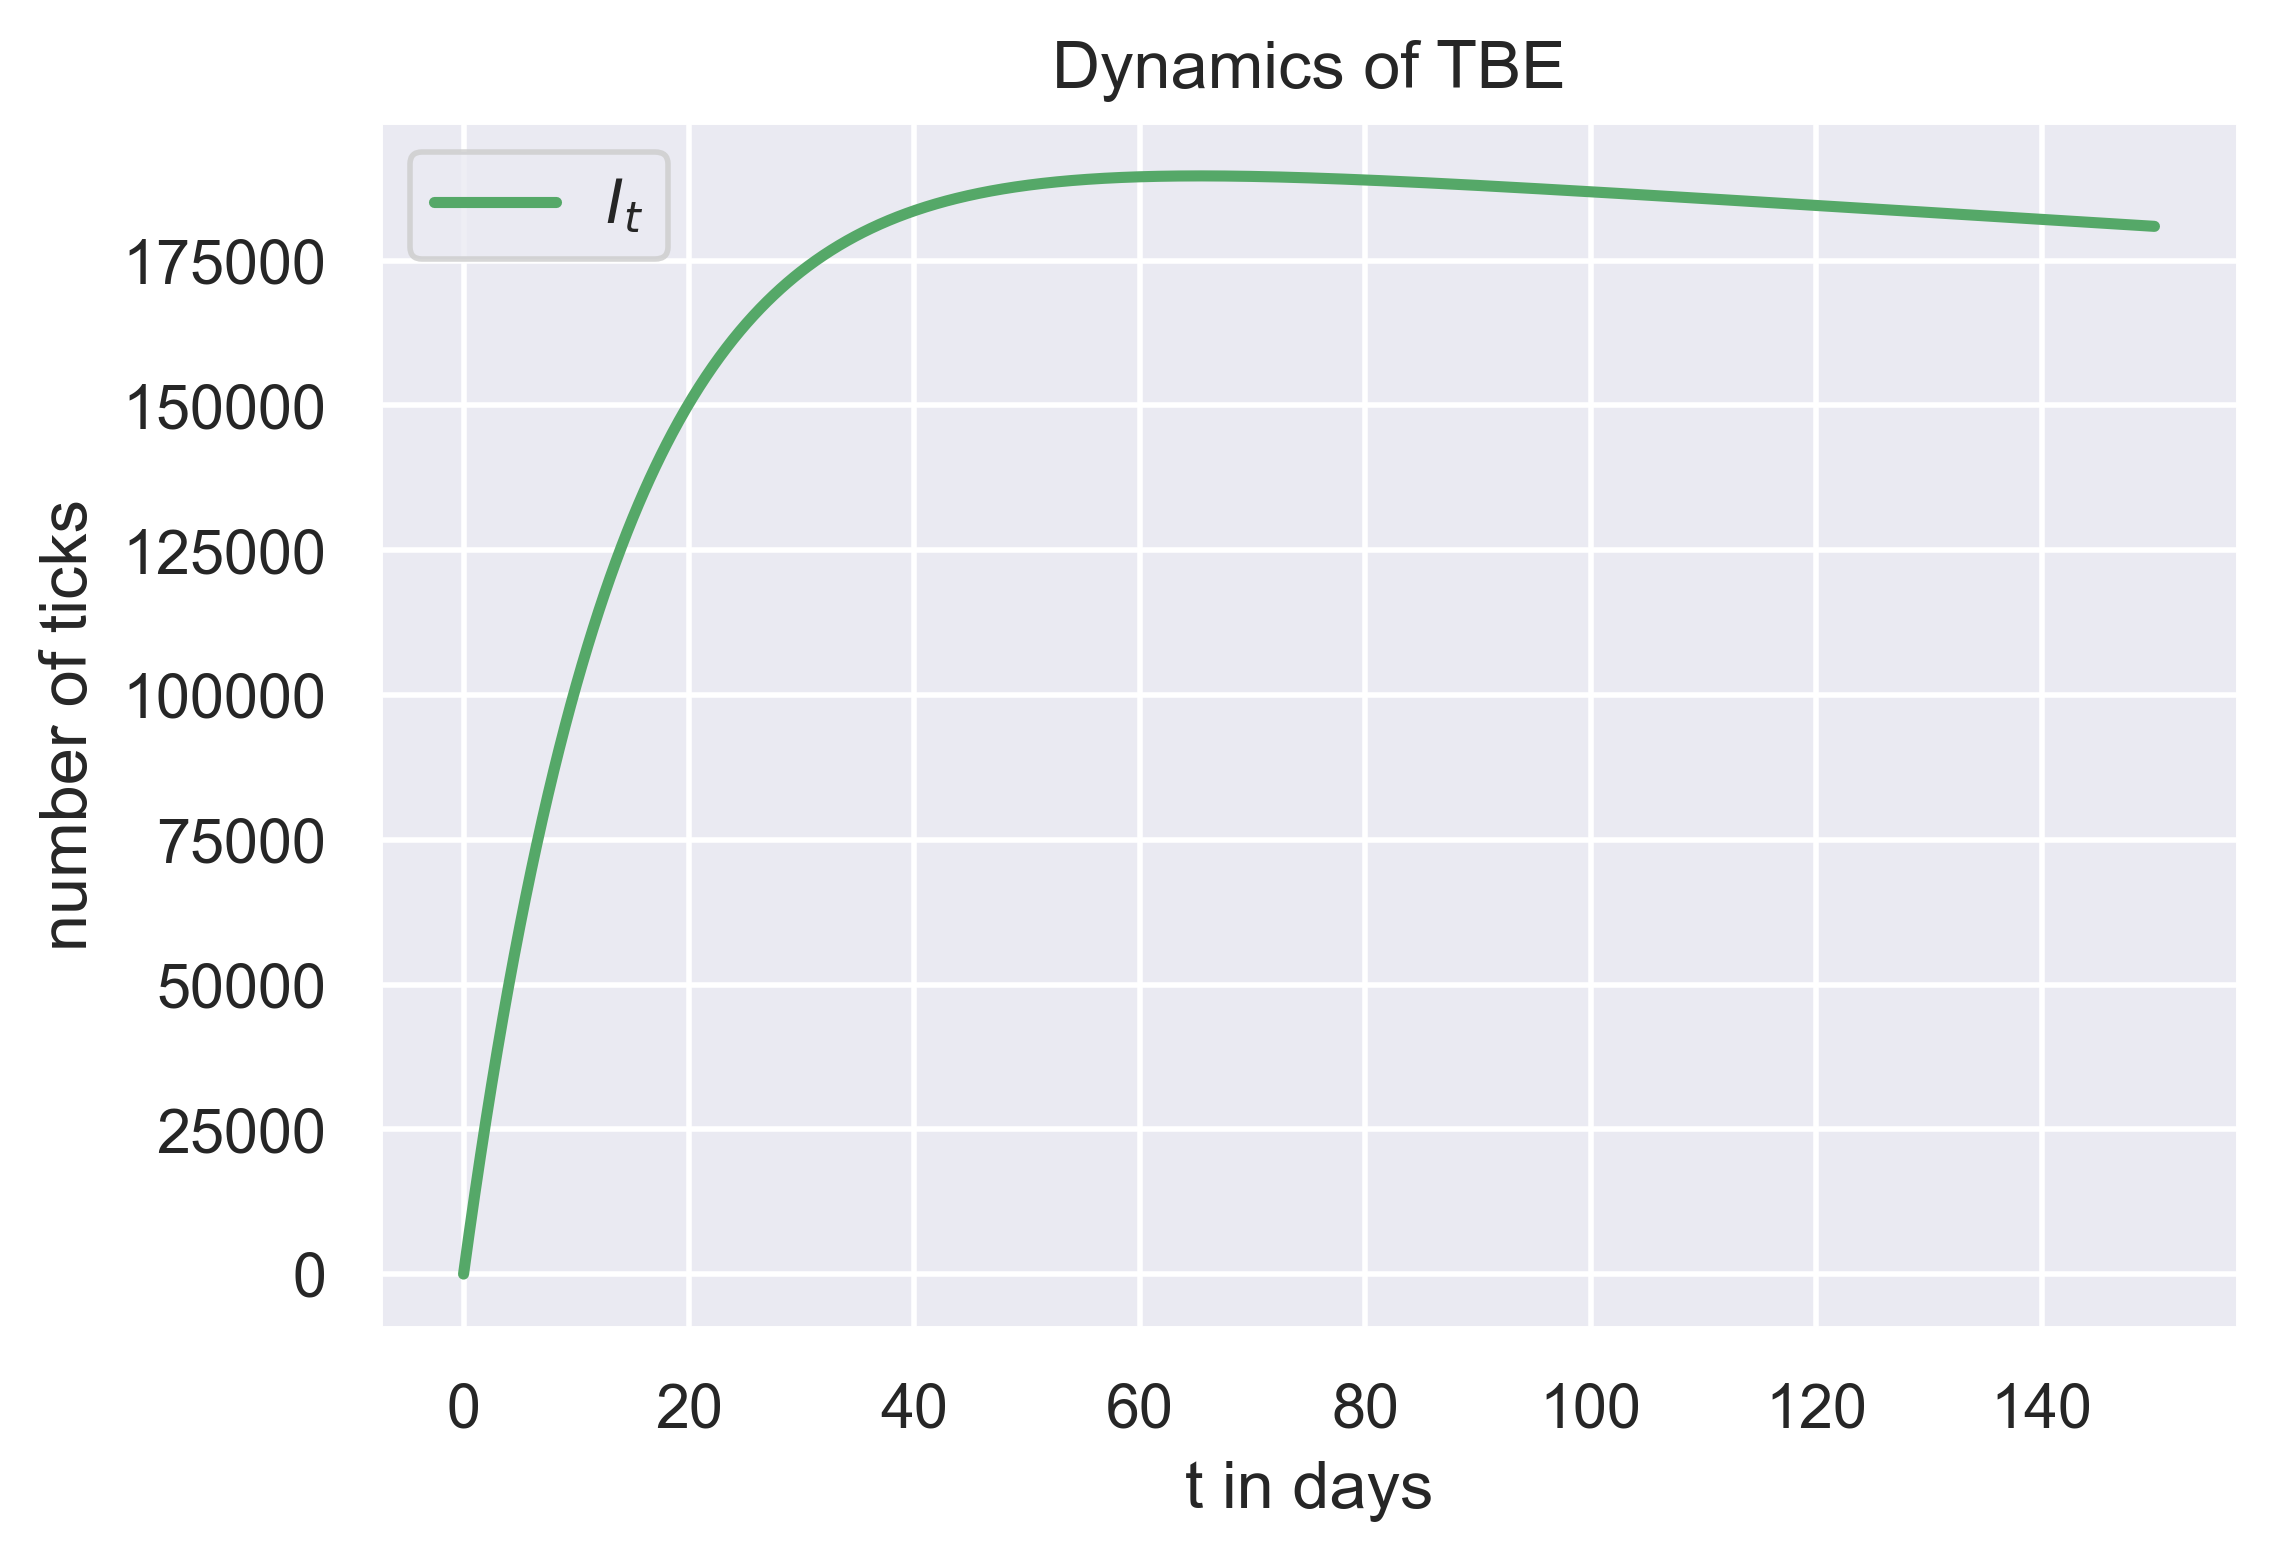

In [28]:
fig = plt.figure(dpi=400)
plt.plot(ts,Psd2[:,5],'g-', linewidth=2.0)

plt.xlabel("t in days")
plt.ylabel("number of ticks")
plt.title("Dynamics of TBE")
plt.legend(["$I_t$"])
plt.show()

# Reproduction Number and Equilibria and their Stability

In [29]:

N_h = 13.1e6
N_t= 2.063e10

R_0 = ((β_dog*β_2*γ_h*(δ*λ_h*ψ/μ_h +	λ_h))/(μ_h*N_h *(μ_e+ μ_h +r_1)*(γ_h+ μ_h + r_2)*(ψ	
			+μ_h)))**(1/3)
R_0

0.001912974278600127

In [30]:
from sympy.solvers import solve
from sympy import Symbol
from sympy import symbols, Eq


# Normed System

In [41]:
λ_1= λ_h/N_h
λ_2= β_1
λ_3= N_t/N_h
λ_4= ψ
λ_5= μ_h 
λ_6= r_2
λ_7= γ_h
λ_8= μ_e
λ_9= r_1
λ_10= β_2
λ_11= μ_t


In [42]:
def dXsolve_dt(X):
    # Here P is a vector such that S=P[0], E=P[1], ... . This function returns [S', E', ...]
    x_1,x_2,x_3,x_4,x_5, = X 
   
    dx_1 = λ_1 -(λ_2 * λ_3 * x_5 + λ_4 + λ_5)*x_1 + λ_6*x_2
    dx_2 = λ_2 * λ_3 * x_5*(x_1 + δ*x_4)-(λ_6+λ_5+λ_7)*x_2
    dx_3 = λ_7*x_2 -(λ_8 + λ_5+λ_9)*x_3 
    dx_4 = λ_9*x_3 + λ_4*x_1 -(λ_5+λ_2*λ_3*δ*x_5)*x_4 
        
    dx_5 = λ_10*x_3*(1-x_5)/λ_3 - λ_11*x_5
    
    return [dx_1,dx_2,dx_3,dx_4,dx_5]



In [43]:
 x_1,x_2,x_3,x_4,x_5 = symbols("x_1 x_2 x_3 x_4 x_5")

dx_1 = λ_1 -(λ_2 * λ_3 * x_5 + λ_4 + λ_5)*x_1 + λ_6*x_2
dx_2 = λ_2 * λ_3 * x_5*(x_1 + δ*x_4)-(λ_6+λ_5+λ_7)*x_2
dx_3 = λ_7*x_2 -(λ_8 + λ_5+λ_9)*x_3 
dx_4 = λ_9*x_3 + λ_4*x_1 -(λ_5+λ_2*λ_3*δ*x_5)*x_4 
        
dx_5 = λ_10*x_3*(1-x_5)/λ_3 - λ_11*x_5


e1= Eq(dx_1,0)
e2= Eq(dx_2,0)
e3= Eq(dx_3,0)
e4= Eq(dx_4,0)
e5= Eq(dx_5,0)

Equilibria = solve((e1,e2,e3,e4,e5), (x_1, x_2, x_3, x_4, x_5), dict=True)
Equilibria

[{x_1: 3.45472618474805e-9,
  x_2: 0.0,
  x_3: 0.0,
  x_4: 6.94222150695388e-8,
  x_5: 0.0},
 {x_1: 15.8739882915328,
  x_2: -14.4674231552986,
  x_3: -19.0161925005021,
  x_4: 694.580020780606,
  x_5: -0.0507523300798568},
 {x_1: 39.3778416984199,
  x_2: -0.235999403069459,
  x_3: -0.310201065566316,
  x_4: -27.7885820710052,
  x_5: -0.000788528987317345}]

In [44]:
for sN in range(0, 3):
    print("Solution: ", sN, ':')
    print(dx_1.evalf(20, subs={x_5:Equilibria[sN][x_5], x_2:Equilibria[sN][x_2], x_1:Equilibria[sN][x_1]}))
    print(dx_2.evalf(20, subs={x_5:Equilibria[sN][x_5], x_2:Equilibria[sN][x_2], x_1:Equilibria[sN][x_1], x_4:Equilibria[sN][x_4]}))
    print(dx_3.evalf(20, subs={x_3:Equilibria[sN][x_3], x_2:Equilibria[sN][x_2]}))
    print(dx_4.evalf(20, subs={x_3:Equilibria[sN][x_3], x_4:Equilibria[sN][x_4], x_1:Equilibria[sN][x_1], x_5:Equilibria[sN][x_5]}))
    print(dx_5.evalf(20, subs={x_3:Equilibria[sN][x_3], x_5:Equilibria[sN][x_5]}))
    print('\n')

Solution:  0 :
-3.6284583312163841370e-27
0
0
2.5407651526077342706e-27
0


Solution:  1 :
1.7189478543596446868e-15
1.5315182467033505811e-15
3.7425592524112552716e-16
-1.3613070464334073644e-15
5.8645480191562963550e-20


Solution:  2 :
7.7846091443349913814e-17
2.1598279990135786691e-17
4.1641168694889962414e-18
2.0039391466247937783e-17
9.6295004895147802661e-22


